In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [98]:
df=pd.read_csv("customer_booking.csv", encoding = "ISO-8859-1")

pd.set_option('display.max_columns', None)
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [100]:
df.duplicated().sum()

719

In [101]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [102]:
#check for missing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [103]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [104]:
df['flight_hour'].unique()

array([ 7,  3, 17,  4, 15, 20,  6, 14, 12,  2, 19, 10,  8, 23,  9, 13, 11,
        0,  1,  5, 16, 18, 22, 21], dtype=int64)

<Figure size 500x500 with 0 Axes>

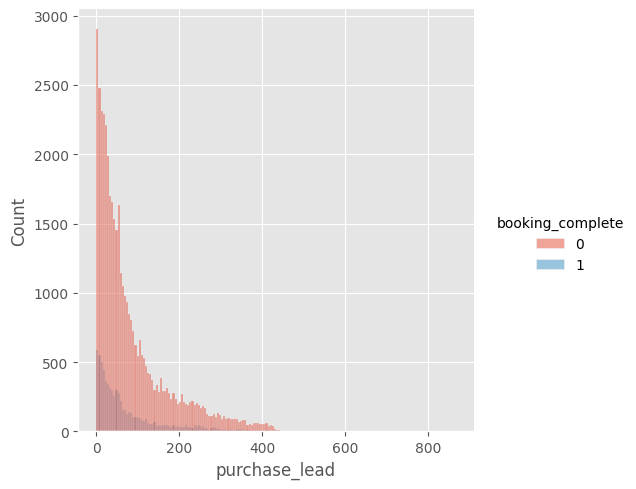

<Figure size 500x500 with 0 Axes>

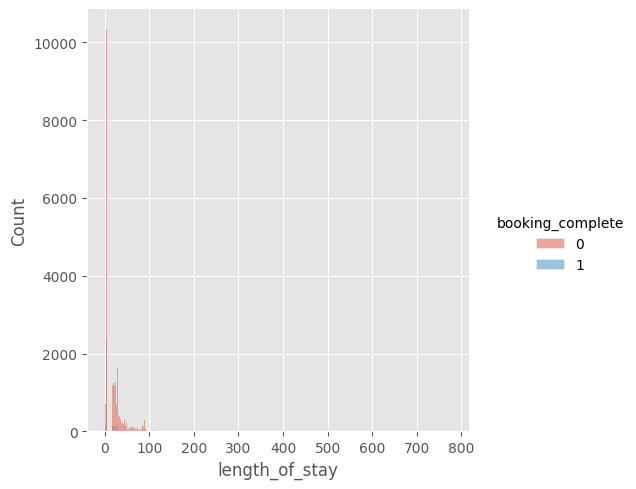

<Figure size 500x500 with 0 Axes>

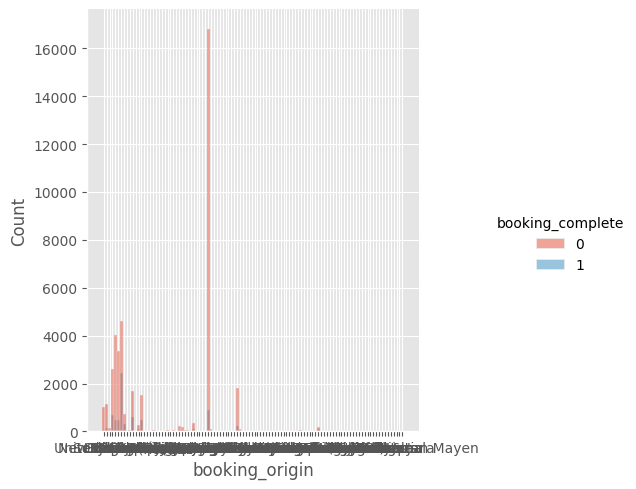

<Figure size 500x500 with 0 Axes>

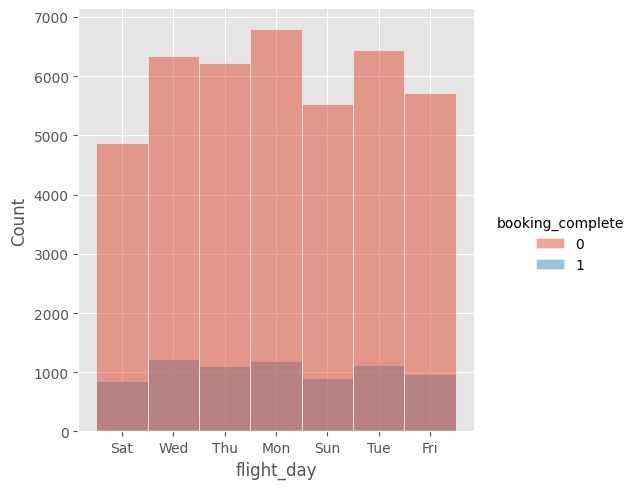

<Figure size 500x500 with 0 Axes>

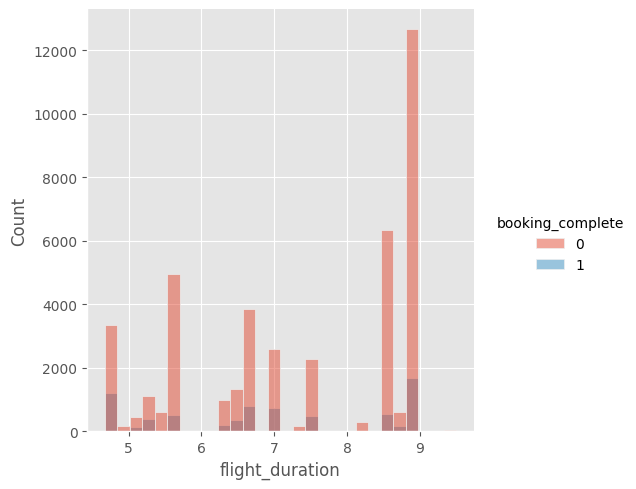

In [105]:
column = ['purchase_lead', 'length_of_stay', 'booking_origin', 'flight_day', 'flight_duration']
for i in column:
    plt.figure(figsize = (5,5), dpi = 100)
    sns.displot(x = i, data = df, hue = df['booking_complete'])
    plt.show()

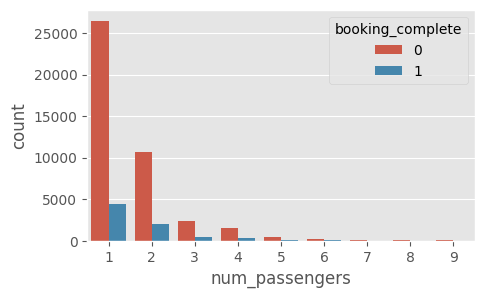

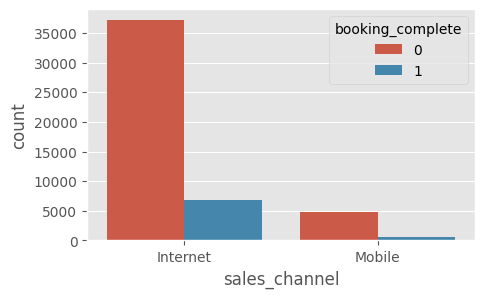

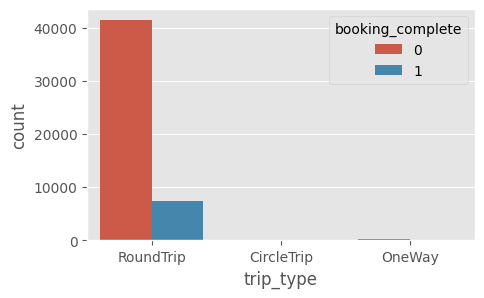

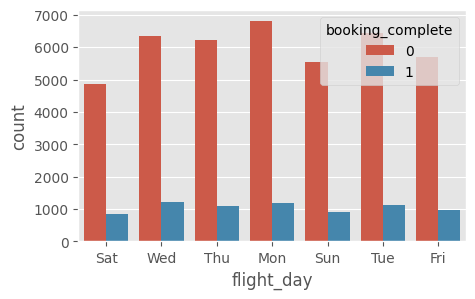

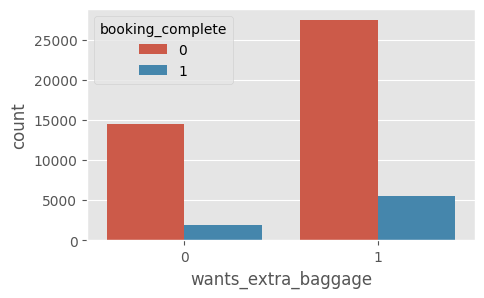

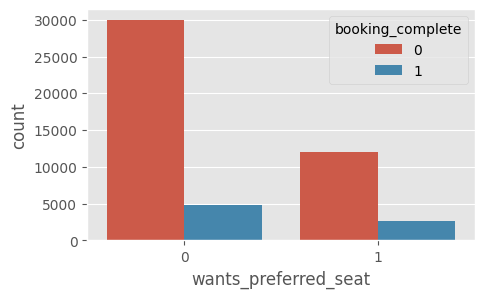

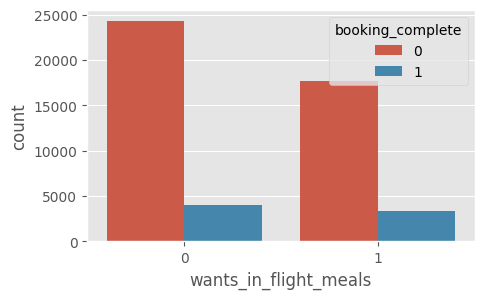

In [106]:
column = ['num_passengers', 'sales_channel', 'trip_type', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
for i in column:
    plt.figure(figsize = (5,3), dpi = 100)
    sns.countplot(x = i, data = df, hue = df['booking_complete'])
    plt.show()

In [107]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)


mapping1 = {
    "Internet": 1,
    "Mobile": 2
}

df["sales_channel"] = df["sales_channel"].map(mapping1)


mapping2 = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay" : 3
}

df["trip_type"] = df["trip_type"].map(mapping2)

df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2              1          1            262              19   
1               1              1          1            112              20   
2               2              1          1            243              22   
3               1              1          1             96              31   
4               2              1          1             68              22   

   flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0            7           6  AKLDEL    New Zealand                    1   
1            3           6  AKLDEL    New Zealand                    0   
2           17           3  AKLDEL          India                    1   
3            4           6  AKLDEL    New Zealand                    0   
4           15           3  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [108]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["route","booking_origin", "flight_hour", "flight_duration"]])
df[["route","booking_origin", "flight_hour", "flight_duration"]] = enc.transform(df[["route","booking_origin", "flight_hour", "flight_duration"]])

df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2              1          1            262              19   
1               1              1          1            112              20   
2               2              1          1            243              22   
3               1              1          1             96              31   
4               2              1          1             68              22   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0          7.0           6    0.0            61.0                    1   
1          3.0           6    0.0            61.0                    0   
2         17.0           3    0.0            36.0                    1   
3          4.0           6    0.0            61.0                    0   
4         15.0           3    0.0            36.0                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0              8.0   
1                     0                      0              8.0   
2                     1                      0              8.0   
3                     0                      1              8.0   
4                     0                      1              8.0   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [109]:
cols_to_scale = ['purchase_lead', 'length_of_stay']

#create and fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2              1          1       1.960824       -0.119827   
1               1              1          1       0.301703       -0.090269   
2               2              1          1       1.750668       -0.031153   
3               1              1          1       0.124730        0.234868   
4               2              1          1      -0.184973       -0.031153   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0          7.0           6    0.0            61.0                    1   
1          3.0           6    0.0            61.0                    0   
2         17.0           3    0.0            36.0                    1   
3          4.0           6    0.0            61.0                    0   
4         15.0           3    0.0            36.0                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0              8.0   
1                     0                      0              8.0   
2                     1                      0              8.0   
3                     0                      1              8.0   
4                     0                      1              8.0   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [110]:
# df = df1.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1)
# df.head()

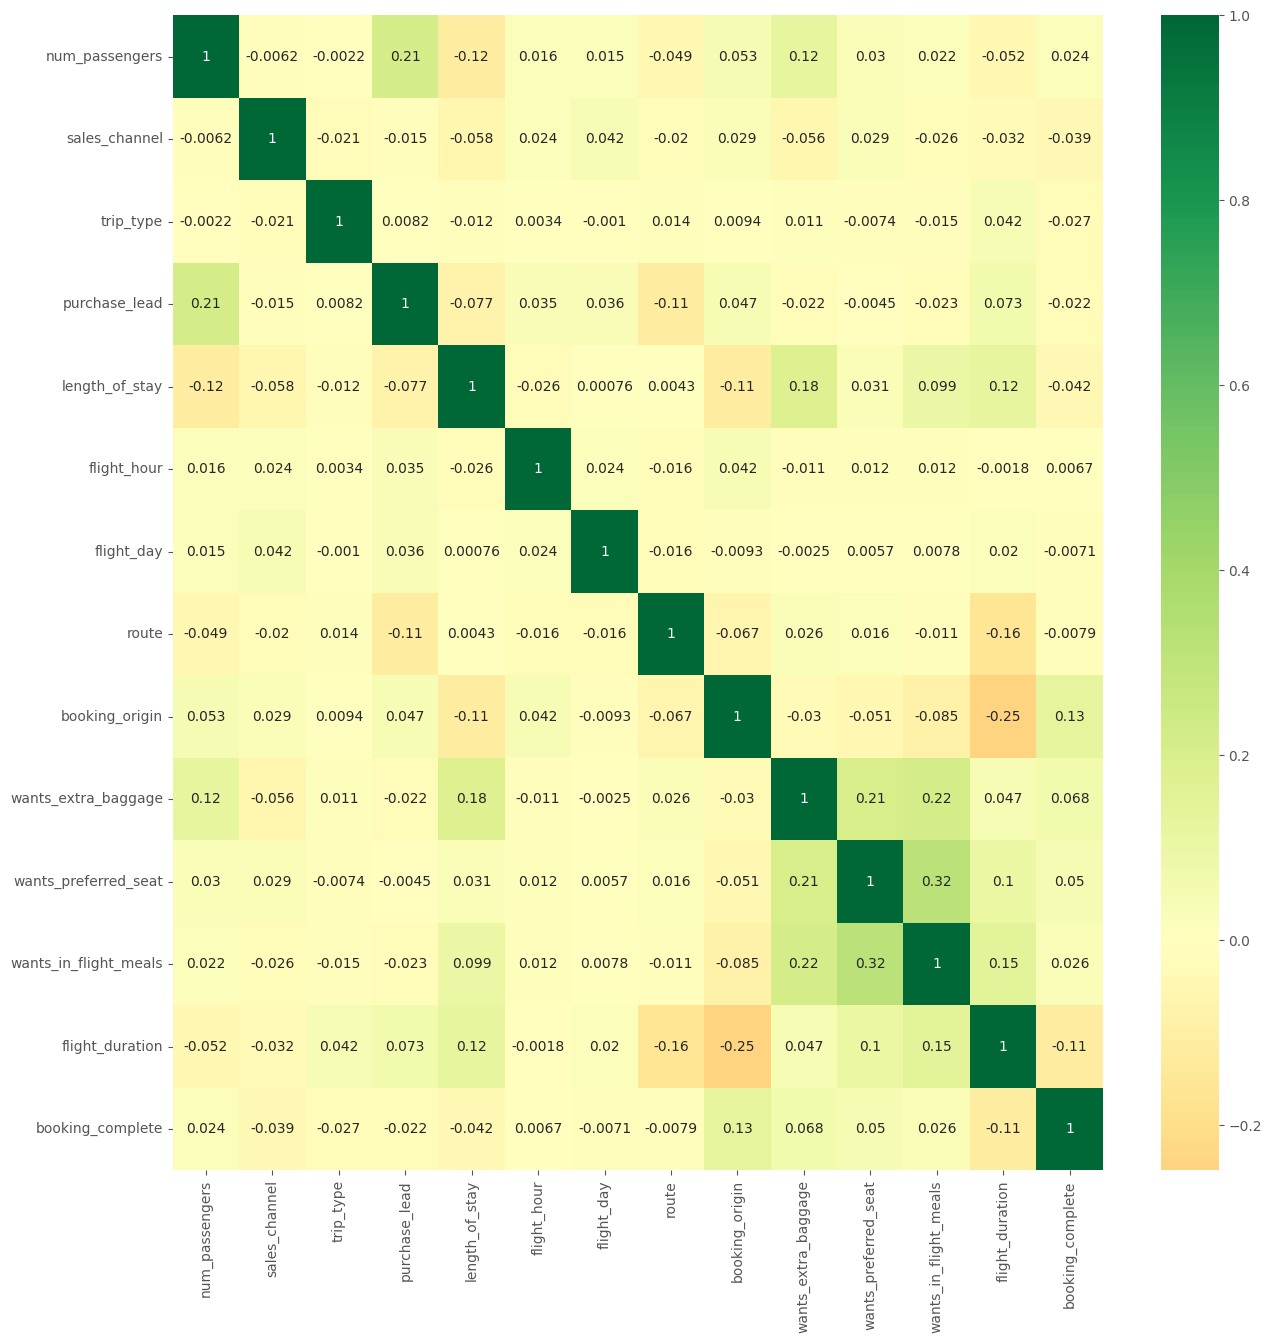

In [111]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0) 

In [112]:
X = df.drop(['booking_complete'], axis = 1).values
Y = df[['booking_complete']].values

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [114]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (34496, 13)
Training Labels Shape :  (34496, 1)
Testing Data Shape    :  (14785, 13)
Testing Labels Shape  :  (14785, 1)


## SGD Regression

In [115]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(alpha = 0.001)
sgd_regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.001)

In [116]:
print('Training Set Score : ', sgd_regressor.score(x_train, y_train))
print('Testing Set Score  : ', sgd_regressor.score(x_test, y_test))

Training Set Score :  -5.080160435146281e+26
Testing Set Score  :  -4.982973242385994e+26


## OLS Regression

In [117]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [118]:
print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.0371426440479109
Testing Set Score  :  0.03851623980241947


## KNN Regressor

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()#(n_neighbors = 5)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [120]:
print('Training Set Score : ', knn_reg.score(x_train, y_train))
print('Testing Set Score  : ', knn_reg.score(x_test, y_test))

Training Set Score :  0.31561234649850645
Testing Set Score  :  -0.017994350686748817


## KNN Classifier

In [121]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [122]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.8731447124304267
Testing Set Accuracy  :  0.8268515387216774


In [123]:
acc_train = []
acc_test  = []

for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)
    
    acc_train.append(classifier.score(x_train, y_train))
    acc_test.append(classifier.score(x_test, y_test))

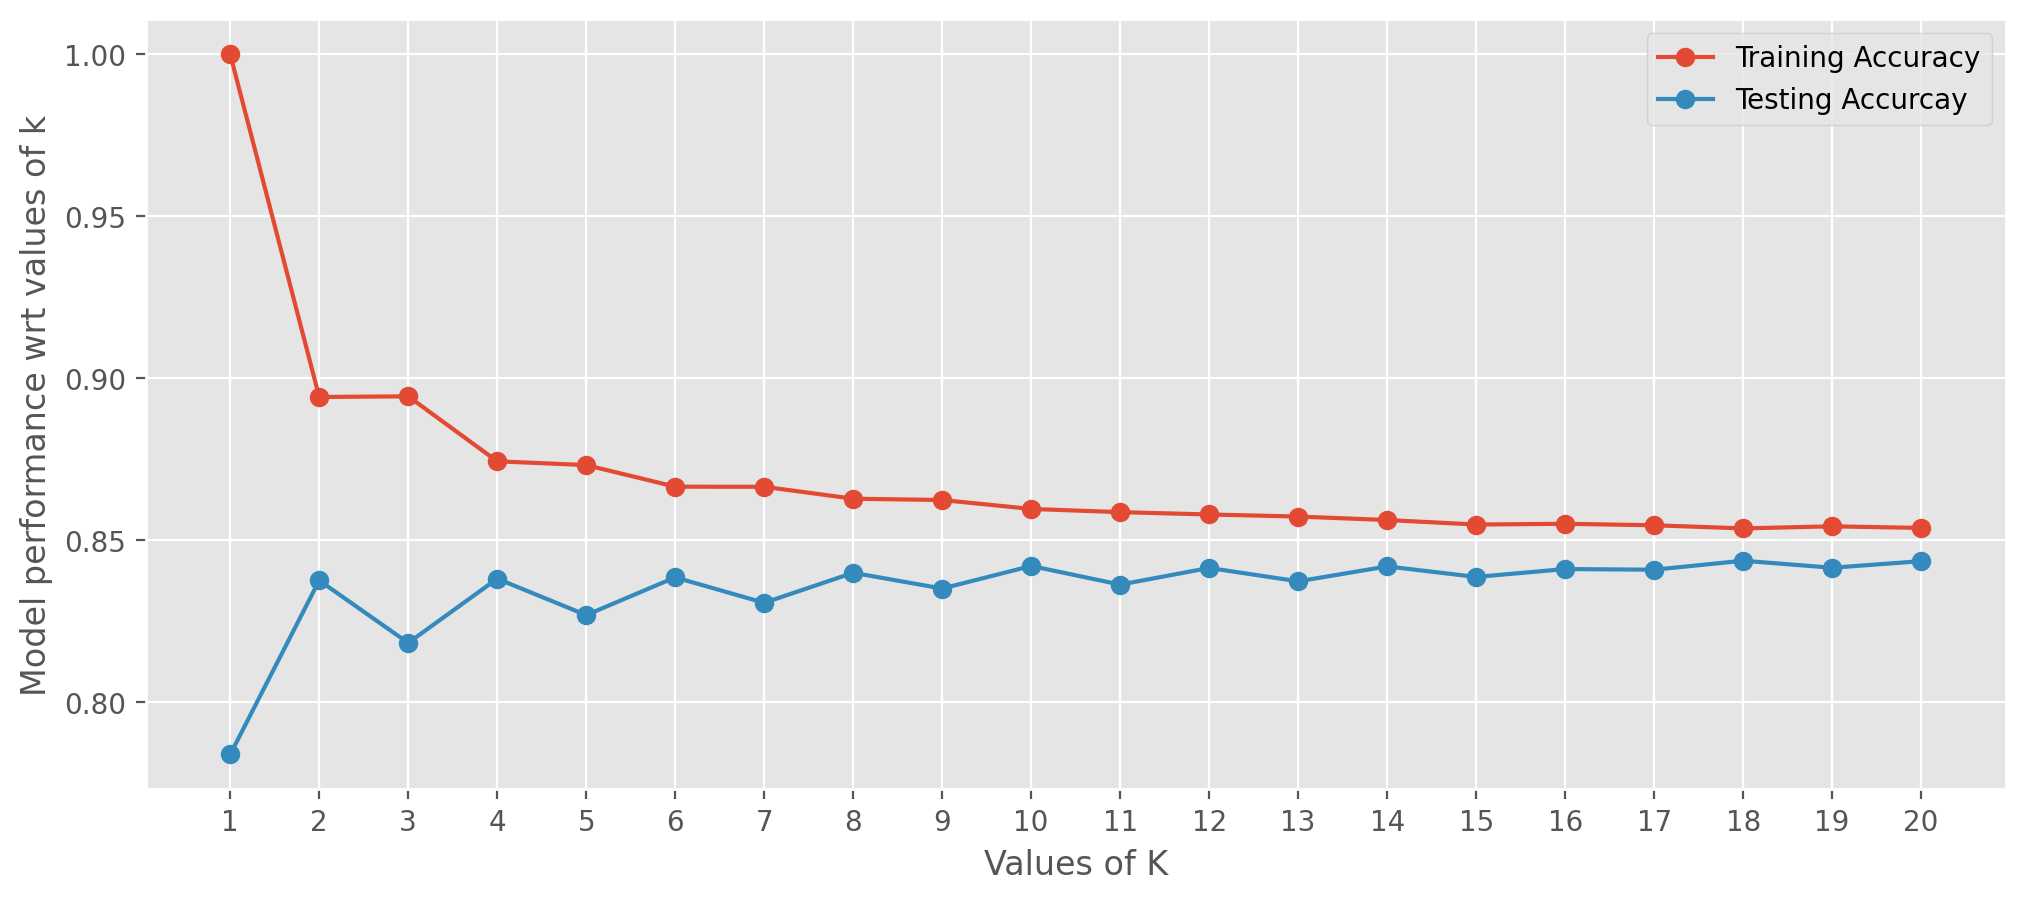

In [124]:
x = x = list(range(1,21))

plt.figure(figsize = (12,5), dpi = 200)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accurcay')

plt.xticks(x)
plt.xlabel('Values of K')
plt.ylabel('Model performance wrt values of k')
plt.legend()

In [125]:
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.8596069109461967
Testing Set Accuracy  :  0.8420020290835306


## Regularised

In [126]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha = 1)                             #here alpha is not learning rate but regularization parameter
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.008440602485033644
Testing Set Score  :  0.009798925579313722


In [127]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 1)                             #here alpha is not learning rate but regularization parameter
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.037142643164158495
Testing Set Score  :  0.03851688072714199


## Decision Tree Classifier

In [128]:
# not an ensemble
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 2)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=2)

In [129]:
print('Training Set Accuracy: ', dt_classifier.score (x_train, y_train))
print('Testing Set Accuracy: ', dt_classifier.score (x_test, y_test))

Training Set Accuracy:  0.8506493506493507
Testing Set Accuracy:  0.8485627324991546


## Random Forest Classifier

In [130]:
# Bagging ensemble
from sklearn.ensemble import RandomForestClassifier
rt_classifier = RandomForestClassifier(n_estimators = 2, max_depth = 2, random_state = 2)
rt_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=2, random_state=2)

In [131]:
print('Training Set Accuracy: ', rt_classifier.score (x_train, y_train))
print('Testing Set Accuracy: ', rt_classifier.score (x_test, y_test))

Training Set Accuracy:  0.8506493506493507
Testing Set Accuracy:  0.8485627324991546


## XGBoost

In [132]:
# Boosting Ensemble
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 2)
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [133]:
print('Training Set Accuracy: ', xg_classifier.score (x_train, y_train))
print('Testing Set Accuracy: ', xg_classifier.score (x_test, y_test))

Training Set Accuracy:  0.8509972170686456
Testing Set Accuracy:  0.8484274602637809


## Light GBM

In [134]:
from lightgbm import LGBMClassifier
lg_classifier = LGBMClassifier(n_estimators = 2)
lg_classifier.fit(x_train, y_train)

LGBMClassifier(n_estimators=2)

In [135]:
print('Training Set Accuracy: ', lg_classifier.score (x_train, y_train))
print('Testing Set Accuracy: ', lg_classifier.score (x_test, y_test))

Training Set Accuracy:  0.8506493506493507
Testing Set Accuracy:  0.8485627324991546


## Ensemble

In [136]:
dt_class = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)

knn_class = KNeighborsClassifier(n_neighbors = 10)

lg_class = LGBMClassifier(n_estimators = 2)

xg_class = XGBClassifier(n_estimators = 2)

rf_class = RandomForestClassifier(n_estimators = 2, max_depth = 2)

In [137]:
from sklearn.ensemble import VotingClassifier
vt_class = VotingClassifier(estimators = [('dt', dt_class),
                                              ('KNN', knn_class),
                                              ('lg', lg_class),
                                              ('xg', xg_class),
                                              ('rf', rf_class)])

vt_class.fit(x_train, y_train)

print('Training Set Score : ', vt_class.score(x_train, y_train))
print('Testing Set Score  : ', vt_class.score(x_test, y_test))

Training Set Score :  0.8506493506493507
Testing Set Score  :  0.8485627324991546


# ANN Classification

In [138]:
# model = tf.keras.models.Sequential()
# model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
# # model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# model.summary()


model = tf.keras.models.Sequential()
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dropout(rate = 0.1))
# model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dropout(rate = 0.1))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 84        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.Adam(0.01),
              metrics = ['accuracy'])

In [140]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    batch_size = 10,
    epochs = 5,
    verbose = 1
)

Epoch 1/5
3450/3450 [==============================] - 37s 10ms/step - loss: 0.4211 - accuracy: 0.8504 - val_loss: 0.4257 - val_accuracy: 0.8486
Epoch 2/5
3450/3450 [==============================] - 36s 10ms/step - loss: 0.4220 - accuracy: 0.8506 - val_loss: 0.4253 - val_accuracy: 0.8486
Epoch 3/5
3450/3450 [==============================] - 36s 10ms/step - loss: 0.4219 - accuracy: 0.8506 - val_loss: 0.4255 - val_accuracy: 0.8486
Epoch 4/5
3450/3450 [==============================] - 36s 10ms/step - loss: 0.4220 - accuracy: 0.8506 - val_loss: 0.4255 - val_accuracy: 0.8486
Epoch 5/5
3450/3450 [==============================] - 37s 11ms/step - loss: 0.4219 - accuracy: 0.8506 - val_loss: 0.4255 - val_accuracy: 0.8486


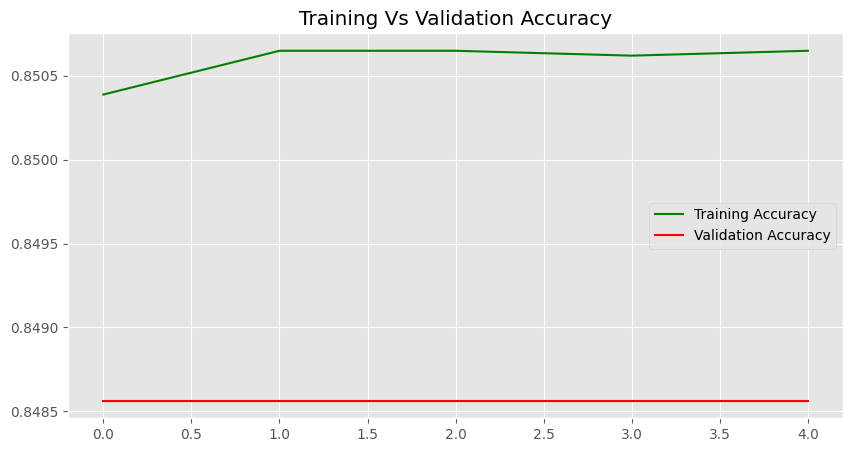

In [141]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()

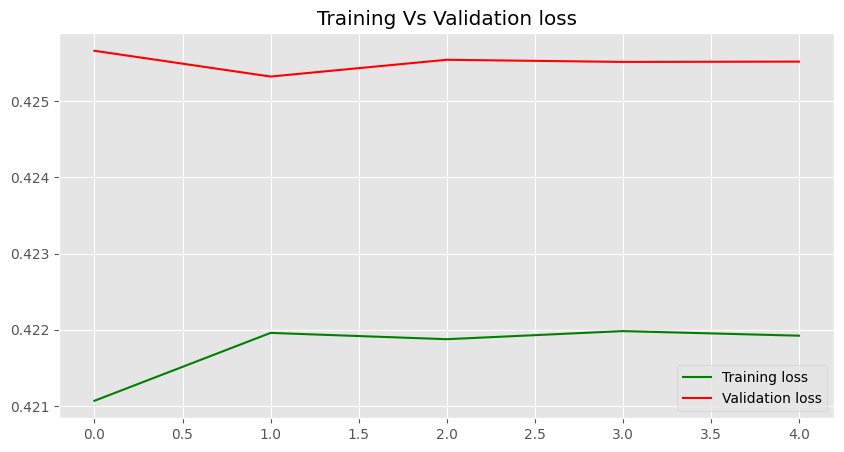

In [142]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training loss')
plt.plot(val_loss, color = 'red', label = 'Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()

In [143]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = model.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

********************
1479/1479 [==============================] - 10s 6ms/step - loss: 0.4255 - accuracy: 0.8486
Test score: 0.4255165159702301
Test accuracy: 0.8485627174377441


Text(0.5, 23.52222222222222, 'Predicted label')

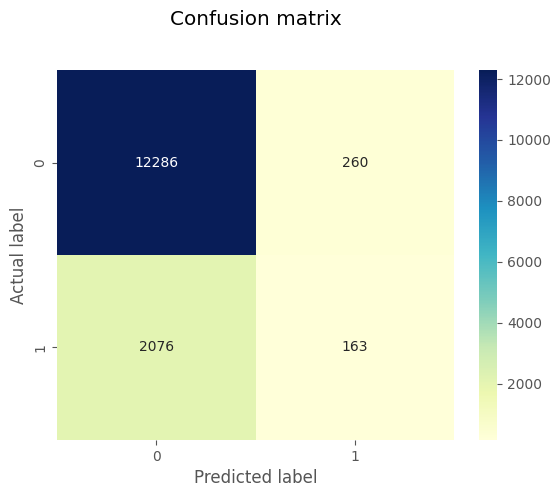

In [144]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [145]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     12546
           1       0.39      0.07      0.12      2239

    accuracy                           0.84     14785
   macro avg       0.62      0.53      0.52     14785
weighted avg       0.78      0.84      0.79     14785



In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(model.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

62/62 [==============================] - 0s 2ms/step


Permutation explainer:   0%|                                                                 | 1/14785 [00:00<?, ?it/s]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                      | 3/14785 [00:16<11:05:34,  2.70s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                      | 4/14785 [00:22<15:36:06,  3.80s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                      | 5/14785 [00:27<18:24:04,  4.48s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                      | 6/14785 [00:33<19:59:09,  4.87s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                      | 7/14785 [00:38<20:51:13,  5.08s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                      | 8/14785 [00:45<22:12:44,  5.41s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                      | 9/14785 [00:50<22:34:30,  5.50s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 10/14785 [00:56<22:44:35,  5.54s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 11/14785 [01:02<22:50:05,  5.56s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 12/14785 [01:07<22:54:27,  5.58s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 13/14785 [01:12<22:35:40,  5.51s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 14/14785 [01:18<22:54:37,  5.58s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 15/14785 [01:23<22:28:39,  5.48s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 16/14785 [01:30<23:16:19,  5.67s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 17/14785 [01:35<23:10:01,  5.65s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 18/14785 [01:41<23:06:32,  5.63s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 19/14785 [01:46<22:58:27,  5.60s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 20/14785 [01:52<23:11:26,  5.65s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 21/14785 [01:59<25:13:32,  6.15s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 22/14785 [02:06<25:15:44,  6.16s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 23/14785 [02:12<25:07:29,  6.13s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   0%|                                                     | 24/14785 [02:18<25:00:57,  6.10s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 25/14785 [02:24<24:47:08,  6.05s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:   0%|                                                     | 26/14785 [02:29<24:07:08,  5.88s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 27/14785 [02:35<24:02:22,  5.86s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 28/14785 [02:40<23:00:18,  5.61s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 29/14785 [02:46<23:48:51,  5.81s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 30/14785 [02:52<24:13:08,  5.91s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 31/14785 [02:58<23:58:07,  5.85s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:   0%|                                                     | 32/14785 [03:04<24:00:39,  5.86s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   0%|                                                     | 33/14785 [03:10<23:53:26,  5.83s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|                                                     | 34/14785 [03:16<24:01:36,  5.86s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   0%|▏                                                    | 35/14785 [03:21<23:38:59,  5.77s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 36/14785 [03:27<23:51:36,  5.82s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 37/14785 [03:33<23:50:34,  5.82s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 38/14785 [03:38<23:03:54,  5.63s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 39/14785 [03:44<23:10:10,  5.66s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 40/14785 [03:50<23:24:20,  5.71s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 41/14785 [03:55<23:02:13,  5.62s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 42/14785 [04:01<23:09:42,  5.66s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 43/14785 [04:06<22:51:17,  5.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 44/14785 [04:12<22:35:39,  5.52s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 45/14785 [04:17<22:11:27,  5.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 46/14785 [04:22<22:09:24,  5.41s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 47/14785 [04:28<22:17:51,  5.45s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 48/14785 [04:33<22:13:52,  5.43s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 49/14785 [04:38<21:38:23,  5.29s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 50/14785 [04:43<21:21:54,  5.22s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 51/14785 [04:49<21:39:42,  5.29s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 52/14785 [04:54<22:01:17,  5.38s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 53/14785 [05:00<21:54:53,  5.36s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 54/14785 [05:05<21:57:29,  5.37s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 55/14785 [05:10<21:33:15,  5.27s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 56/14785 [05:16<21:58:53,  5.37s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 57/14785 [05:21<22:03:49,  5.39s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 58/14785 [05:27<22:19:25,  5.46s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 59/14785 [05:32<22:11:42,  5.43s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 60/14785 [05:38<22:33:04,  5.51s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 61/14785 [05:43<22:53:01,  5.60s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 62/14785 [05:49<22:14:45,  5.44s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 63/14785 [05:54<22:48:05,  5.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 64/14785 [06:00<23:07:34,  5.66s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 65/14785 [06:06<22:55:36,  5.61s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 66/14785 [06:11<22:49:30,  5.58s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 67/14785 [06:17<22:59:48,  5.62s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 68/14785 [06:22<22:34:15,  5.52s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▏                                                    | 69/14785 [06:28<22:49:56,  5.59s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▎                                                    | 70/14785 [06:34<22:46:50,  5.57s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▎                                                    | 71/14785 [06:39<22:42:33,  5.56s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▎                                                    | 72/14785 [06:45<23:06:13,  5.65s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   0%|▎                                                    | 73/14785 [06:51<23:25:01,  5.73s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 74/14785 [06:56<22:37:44,  5.54s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 75/14785 [06:58<18:50:39,  4.61s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 76/14785 [07:01<16:20:30,  4.00s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 77/14785 [07:03<14:20:39,  3.51s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 78/14785 [07:06<12:52:10,  3.15s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 79/14785 [07:08<11:52:12,  2.91s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 80/14785 [07:11<11:22:48,  2.79s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 81/14785 [07:13<10:48:07,  2.64s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 82/14785 [07:15<10:22:00,  2.54s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 83/14785 [07:17<10:06:50,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 84/14785 [07:20<9:54:34,  2.43s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 85/14785 [07:22<9:44:10,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 86/14785 [07:25<9:57:36,  2.44s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 87/14785 [07:27<9:50:26,  2.41s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 88/14785 [07:29<9:41:44,  2.37s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 89/14785 [07:32<9:41:35,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 90/14785 [07:34<9:32:42,  2.34s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 91/14785 [07:36<9:30:02,  2.33s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 92/14785 [07:39<9:30:30,  2.33s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 93/14785 [07:41<9:41:57,  2.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 94/14785 [07:43<9:45:35,  2.39s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 95/14785 [07:46<9:42:04,  2.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 96/14785 [07:48<9:38:40,  2.36s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 97/14785 [07:50<9:34:05,  2.35s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 98/14785 [07:53<9:42:37,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                     | 99/14785 [07:55<9:33:04,  2.34s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 100/14785 [07:57<9:30:44,  2.33s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   1%|▎                                                    | 101/14785 [08:00<9:38:32,  2.36s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 102/14785 [08:02<9:47:06,  2.40s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 103/14785 [08:05<9:40:20,  2.37s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▎                                                    | 104/14785 [08:07<9:41:11,  2.38s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 105/14785 [08:09<9:36:53,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 106/14785 [08:12<9:30:20,  2.33s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 107/14785 [08:14<9:30:37,  2.33s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 108/14785 [08:16<9:31:55,  2.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 109/14785 [08:19<9:33:27,  2.34s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 110/14785 [08:21<9:42:16,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 111/14785 [08:24<9:55:23,  2.43s/it]

42/42 [==============================] - 0s 872us/step


Permutation explainer:   1%|▍                                                    | 112/14785 [08:26<9:49:53,  2.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 113/14785 [08:28<9:29:48,  2.33s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 114/14785 [08:30<9:25:11,  2.31s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 115/14785 [08:33<9:24:40,  2.31s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 116/14785 [08:35<9:19:31,  2.29s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 117/14785 [08:37<9:20:34,  2.29s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 118/14785 [08:40<9:27:52,  2.32s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 119/14785 [08:42<9:31:31,  2.34s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 120/14785 [08:45<9:39:16,  2.37s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 121/14785 [08:47<9:30:32,  2.33s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 122/14785 [08:49<9:31:40,  2.34s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 123/14785 [08:52<9:42:19,  2.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 124/14785 [08:54<9:50:59,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 125/14785 [08:57<9:55:25,  2.44s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 126/14785 [08:59<9:44:30,  2.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 127/14785 [09:01<9:36:54,  2.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 128/14785 [09:04<9:37:17,  2.36s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 129/14785 [09:06<9:35:05,  2.35s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 130/14785 [09:08<9:37:39,  2.37s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 131/14785 [09:11<9:35:10,  2.35s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 132/14785 [09:13<9:46:54,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 133/14785 [09:16<9:48:16,  2.41s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 134/14785 [09:18<9:45:03,  2.40s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 135/14785 [09:20<9:39:25,  2.37s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 136/14785 [09:23<9:52:45,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 137/14785 [09:25<9:48:19,  2.41s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 138/14785 [09:27<9:35:43,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                    | 139/14785 [09:30<9:33:57,  2.35s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                   | 140/14785 [09:33<10:29:27,  2.58s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▍                                                   | 141/14785 [09:35<10:02:07,  2.47s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 142/14785 [09:37<9:44:34,  2.40s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 143/14785 [09:40<9:50:16,  2.42s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 144/14785 [09:42<9:44:24,  2.39s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 145/14785 [09:44<9:47:08,  2.41s/it]

38/38 [==============================] - 0s 886us/step


Permutation explainer:   1%|▌                                                    | 146/14785 [09:47<9:28:36,  2.33s/it]

37/37 [==============================] - 0s 899us/step


Permutation explainer:   1%|▌                                                    | 147/14785 [09:49<9:12:43,  2.27s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 148/14785 [09:51<9:08:33,  2.25s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 149/14785 [09:53<9:19:25,  2.29s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 150/14785 [09:56<9:21:46,  2.30s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 151/14785 [09:58<9:24:25,  2.31s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 152/14785 [10:00<9:25:17,  2.32s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 153/14785 [10:03<9:40:10,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 154/14785 [10:05<9:37:54,  2.37s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 155/14785 [10:07<9:29:22,  2.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 156/14785 [10:10<9:28:20,  2.33s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 157/14785 [10:12<9:38:45,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 158/14785 [10:15<9:27:56,  2.33s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 159/14785 [10:17<9:27:22,  2.33s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 160/14785 [10:19<9:25:05,  2.32s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 161/14785 [10:22<9:39:46,  2.38s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 162/14785 [10:24<9:34:29,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 163/14785 [10:26<9:30:45,  2.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 164/14785 [10:29<9:27:37,  2.33s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 165/14785 [10:31<9:29:36,  2.34s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 166/14785 [10:33<9:29:17,  2.34s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 167/14785 [10:36<9:35:16,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 168/14785 [10:38<9:26:59,  2.33s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 169/14785 [10:40<9:38:40,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 170/14785 [10:43<9:33:56,  2.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 171/14785 [10:45<9:30:10,  2.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 172/14785 [10:47<9:32:12,  2.35s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 173/14785 [10:50<9:32:57,  2.35s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▌                                                    | 174/14785 [10:52<9:29:23,  2.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 175/14785 [10:54<9:29:02,  2.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 176/14785 [10:57<9:27:51,  2.33s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 177/14785 [10:59<9:26:27,  2.33s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 178/14785 [11:01<9:28:41,  2.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 179/14785 [11:04<9:29:17,  2.34s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 180/14785 [11:06<9:43:03,  2.40s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 181/14785 [11:09<9:38:26,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 182/14785 [11:11<9:41:19,  2.39s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 183/14785 [11:13<9:46:31,  2.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 184/14785 [11:16<9:39:49,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 185/14785 [11:18<9:38:12,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 186/14785 [11:21<9:40:01,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 187/14785 [11:23<9:40:03,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 188/14785 [11:25<9:43:44,  2.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 189/14785 [11:28<9:29:06,  2.34s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 190/14785 [11:30<9:20:17,  2.30s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 191/14785 [11:32<9:32:06,  2.35s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 192/14785 [11:35<9:50:15,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 193/14785 [11:37<9:49:10,  2.42s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 194/14785 [11:40<9:51:49,  2.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 195/14785 [11:42<9:46:30,  2.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 196/14785 [11:44<9:45:57,  2.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 197/14785 [11:47<9:46:40,  2.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 198/14785 [11:49<9:44:48,  2.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 199/14785 [11:52<9:36:16,  2.37s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 200/14785 [11:54<9:29:41,  2.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 201/14785 [11:56<9:42:34,  2.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 202/14785 [11:59<9:36:00,  2.37s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 203/14785 [12:01<9:41:47,  2.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 204/14785 [12:03<9:33:14,  2.36s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 205/14785 [12:06<9:27:35,  2.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 206/14785 [12:08<9:32:50,  2.36s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 207/14785 [12:10<9:32:17,  2.36s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 208/14785 [12:13<9:35:15,  2.37s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▋                                                    | 209/14785 [12:15<9:38:06,  2.38s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 210/14785 [12:18<9:59:56,  2.47s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 211/14785 [12:20<9:42:34,  2.40s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 212/14785 [12:23<9:48:00,  2.42s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 213/14785 [12:25<9:34:43,  2.37s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 214/14785 [12:27<9:48:18,  2.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 215/14785 [12:30<9:44:32,  2.41s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 216/14785 [12:32<9:46:56,  2.42s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 217/14785 [12:34<9:33:56,  2.36s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 218/14785 [12:37<9:35:20,  2.37s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 219/14785 [12:39<9:39:09,  2.39s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 220/14785 [12:42<9:39:24,  2.39s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▊                                                    | 221/14785 [12:44<9:31:50,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 222/14785 [12:46<9:32:22,  2.36s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 223/14785 [12:49<9:46:36,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 224/14785 [12:51<9:47:11,  2.42s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 225/14785 [12:54<9:44:01,  2.41s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 226/14785 [12:56<9:32:10,  2.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 227/14785 [12:58<9:35:26,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 228/14785 [13:01<9:32:06,  2.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 229/14785 [13:03<9:31:57,  2.36s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 230/14785 [13:05<9:29:18,  2.35s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 231/14785 [13:08<9:26:47,  2.34s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 232/14785 [13:10<9:21:19,  2.31s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 233/14785 [13:12<9:20:46,  2.31s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 234/14785 [13:15<9:21:06,  2.31s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 235/14785 [13:17<9:19:42,  2.31s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 236/14785 [13:19<9:26:41,  2.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 237/14785 [13:22<9:28:17,  2.34s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 238/14785 [13:24<9:43:09,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 239/14785 [13:27<9:46:48,  2.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 240/14785 [13:29<9:39:39,  2.39s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 241/14785 [13:31<9:34:13,  2.37s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 242/14785 [13:34<9:41:34,  2.40s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 243/14785 [13:36<9:48:49,  2.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▊                                                    | 244/14785 [13:39<9:43:21,  2.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 245/14785 [13:41<9:36:56,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 246/14785 [13:43<9:37:56,  2.39s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 247/14785 [13:46<9:39:28,  2.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 248/14785 [13:48<9:32:02,  2.36s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 249/14785 [13:50<9:27:46,  2.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 250/14785 [13:53<9:38:26,  2.39s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 251/14785 [13:55<9:46:41,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 252/14785 [13:58<9:50:20,  2.44s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 253/14785 [14:00<10:07:57,  2.51s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 254/14785 [14:03<10:17:08,  2.55s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 255/14785 [14:06<10:20:53,  2.56s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 256/14785 [14:08<10:15:53,  2.54s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 257/14785 [14:11<10:16:53,  2.55s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 258/14785 [14:13<10:19:30,  2.56s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 259/14785 [14:16<10:18:06,  2.55s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 260/14785 [14:18<10:15:57,  2.54s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 261/14785 [14:21<10:02:04,  2.49s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 262/14785 [14:23<9:52:03,  2.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 263/14785 [14:26<9:52:37,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 264/14785 [14:28<9:54:28,  2.46s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 265/14785 [14:31<10:01:47,  2.49s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 266/14785 [14:33<10:12:47,  2.53s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 267/14785 [14:36<10:00:21,  2.48s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 268/14785 [14:38<9:57:54,  2.47s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 269/14785 [14:40<9:54:47,  2.46s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 270/14785 [14:43<10:05:49,  2.50s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 271/14785 [14:46<10:16:35,  2.55s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 272/14785 [14:48<10:29:50,  2.60s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 273/14785 [14:51<10:17:13,  2.55s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 274/14785 [14:53<10:10:55,  2.53s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 275/14785 [14:56<10:11:14,  2.53s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                   | 276/14785 [14:58<10:01:14,  2.49s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 277/14785 [15:01<9:53:17,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▉                                                    | 278/14785 [15:03<9:49:09,  2.44s/it]

39/39 [==============================] - 0s 816us/step


Permutation explainer:   2%|▉                                                   | 279/14785 [15:06<10:09:45,  2.52s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 280/14785 [15:08<9:42:47,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 281/14785 [15:10<9:32:43,  2.37s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 282/14785 [15:13<9:36:34,  2.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 283/14785 [15:15<9:31:44,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 284/14785 [15:17<9:41:07,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 285/14785 [15:20<9:36:16,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 286/14785 [15:22<9:36:02,  2.38s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 287/14785 [15:24<9:27:34,  2.35s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 288/14785 [15:27<9:33:29,  2.37s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 289/14785 [15:30<10:22:37,  2.58s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 290/14785 [15:32<10:22:28,  2.58s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 291/14785 [15:35<9:59:39,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 292/14785 [15:37<9:45:58,  2.43s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 293/14785 [15:40<9:50:45,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 294/14785 [15:42<9:51:00,  2.45s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 295/14785 [15:44<9:46:04,  2.43s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 296/14785 [15:47<9:39:10,  2.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 297/14785 [15:49<9:34:44,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 298/14785 [15:51<9:35:10,  2.38s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 299/14785 [15:54<9:35:29,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 300/14785 [15:56<9:38:05,  2.39s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 301/14785 [15:59<9:33:48,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 302/14785 [16:01<9:44:16,  2.42s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 303/14785 [16:04<10:09:09,  2.52s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 304/14785 [16:06<10:06:28,  2.51s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 305/14785 [16:09<9:59:32,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 306/14785 [16:11<10:05:22,  2.51s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 307/14785 [16:14<10:15:10,  2.55s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 308/14785 [16:16<10:07:46,  2.52s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 309/14785 [16:19<10:00:06,  2.49s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 310/14785 [16:21<9:56:38,  2.47s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 311/14785 [16:24<9:45:45,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 312/14785 [16:26<9:47:27,  2.44s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                    | 313/14785 [16:28<9:40:47,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 314/14785 [16:31<9:45:18,  2.43s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 315/14785 [16:33<9:59:33,  2.49s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 316/14785 [16:36<10:03:57,  2.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█                                                   | 317/14785 [16:38<10:02:47,  2.50s/it]

36/36 [==============================] - 0s 934us/step


Permutation explainer:   2%|█▏                                                   | 318/14785 [16:41<9:50:04,  2.45s/it]

38/38 [==============================] - 0s 916us/step


Permutation explainer:   2%|█▏                                                   | 319/14785 [16:43<9:27:50,  2.36s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 320/14785 [16:45<9:35:48,  2.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 321/14785 [16:48<9:29:41,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 322/14785 [16:50<9:26:20,  2.35s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 323/14785 [16:53<9:34:41,  2.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 324/14785 [16:55<9:38:18,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 325/14785 [16:57<9:37:24,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 326/14785 [17:00<9:38:43,  2.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 327/14785 [17:02<9:32:18,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 328/14785 [17:05<9:40:54,  2.41s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 329/14785 [17:07<9:33:13,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 330/14785 [17:09<9:29:47,  2.37s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 331/14785 [17:11<9:23:32,  2.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 332/14785 [17:14<9:22:10,  2.33s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 333/14785 [17:16<9:26:11,  2.35s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 334/14785 [17:19<9:31:29,  2.37s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 335/14785 [17:21<9:29:04,  2.36s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 336/14785 [17:23<9:35:32,  2.39s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 337/14785 [17:26<9:33:08,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 338/14785 [17:28<9:34:40,  2.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 339/14785 [17:31<9:36:46,  2.40s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 340/14785 [17:33<9:40:02,  2.41s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 341/14785 [17:35<9:35:23,  2.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 342/14785 [17:38<9:31:25,  2.37s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 343/14785 [17:40<9:32:13,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 344/14785 [17:43<9:41:25,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 345/14785 [17:45<9:41:55,  2.42s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 346/14785 [17:48<9:47:30,  2.44s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 347/14785 [17:50<9:43:46,  2.43s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▏                                                   | 348/14785 [17:52<9:28:48,  2.36s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 349/14785 [17:55<9:43:52,  2.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 350/14785 [17:57<9:39:37,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 351/14785 [18:00<9:49:35,  2.45s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 352/14785 [18:02<9:57:28,  2.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 353/14785 [18:04<9:43:42,  2.43s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 354/14785 [18:07<9:35:33,  2.39s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 355/14785 [18:09<9:46:13,  2.44s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 356/14785 [18:12<9:46:48,  2.44s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 357/14785 [18:14<9:51:08,  2.46s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 358/14785 [18:17<9:43:46,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 359/14785 [18:19<9:46:33,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 360/14785 [18:22<9:53:10,  2.47s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 361/14785 [18:24<9:44:29,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 362/14785 [18:26<9:41:55,  2.42s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 363/14785 [18:29<9:50:52,  2.46s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 364/14785 [18:31<9:36:14,  2.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 365/14785 [18:34<9:38:43,  2.41s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 366/14785 [18:36<9:41:37,  2.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 367/14785 [18:38<9:41:35,  2.42s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 368/14785 [18:41<9:56:58,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   2%|█▎                                                   | 369/14785 [18:44<9:54:52,  2.48s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 370/14785 [18:46<9:47:50,  2.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 371/14785 [18:48<9:51:58,  2.46s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 372/14785 [18:51<9:40:58,  2.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 373/14785 [18:53<9:38:03,  2.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 374/14785 [18:56<9:36:42,  2.40s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 375/14785 [18:58<9:32:14,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 376/14785 [19:00<9:31:26,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 377/14785 [19:03<9:38:01,  2.41s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 378/14785 [19:05<9:33:40,  2.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 379/14785 [19:08<9:52:31,  2.47s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 380/14785 [19:10<9:51:23,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 381/14785 [19:13<9:49:10,  2.45s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 382/14785 [19:15<9:51:26,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▎                                                   | 383/14785 [19:18<9:49:57,  2.46s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 384/14785 [19:20<9:41:25,  2.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 385/14785 [19:22<9:42:06,  2.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 386/14785 [19:25<9:39:05,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 387/14785 [19:27<9:40:36,  2.42s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 388/14785 [19:29<9:29:52,  2.37s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 389/14785 [19:32<9:30:17,  2.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 390/14785 [19:34<9:35:25,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 391/14785 [19:37<9:34:43,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 392/14785 [19:39<9:31:17,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 393/14785 [19:41<9:36:00,  2.40s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 394/14785 [19:44<9:41:22,  2.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 395/14785 [19:46<9:43:05,  2.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 396/14785 [19:49<9:42:08,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 397/14785 [19:51<9:37:05,  2.41s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 398/14785 [19:54<9:36:50,  2.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 399/14785 [19:56<9:48:48,  2.46s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 400/14785 [19:58<9:42:31,  2.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 401/14785 [20:01<9:44:56,  2.44s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 402/14785 [20:03<9:38:21,  2.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 403/14785 [20:06<9:33:56,  2.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 404/14785 [20:08<9:36:59,  2.41s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 405/14785 [20:10<9:36:03,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 406/14785 [20:13<9:37:04,  2.41s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 407/14785 [20:15<9:46:33,  2.45s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 408/14785 [20:18<9:33:44,  2.39s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 409/14785 [20:20<9:43:02,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 410/14785 [20:23<9:43:26,  2.44s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 411/14785 [20:25<9:41:16,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 412/14785 [20:28<9:51:34,  2.47s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 413/14785 [20:30<9:47:49,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 414/14785 [20:32<9:43:29,  2.44s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 415/14785 [20:35<9:42:20,  2.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 416/14785 [20:37<9:36:58,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 417/14785 [20:40<9:44:25,  2.44s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▍                                                   | 418/14785 [20:42<9:43:02,  2.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 419/14785 [20:45<9:41:22,  2.43s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 420/14785 [20:47<9:52:19,  2.47s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 421/14785 [20:49<9:39:07,  2.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 422/14785 [20:52<9:51:52,  2.47s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 423/14785 [20:54<9:39:17,  2.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 424/14785 [20:57<9:45:20,  2.45s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 425/14785 [20:59<9:39:14,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 426/14785 [21:02<9:56:02,  2.49s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 427/14785 [21:04<9:47:55,  2.46s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 428/14785 [21:07<9:44:44,  2.44s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 429/14785 [21:09<9:45:10,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 430/14785 [21:12<9:59:50,  2.51s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 431/14785 [21:14<9:57:42,  2.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                  | 432/14785 [21:17<10:03:36,  2.52s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                  | 433/14785 [21:19<10:00:29,  2.51s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 434/14785 [21:22<9:48:51,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 435/14785 [21:24<9:40:42,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 436/14785 [21:26<9:46:18,  2.45s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                  | 437/14785 [21:29<10:26:55,  2.62s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                  | 438/14785 [21:32<10:14:52,  2.57s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                  | 439/14785 [21:35<10:14:16,  2.57s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                  | 440/14785 [21:37<10:04:34,  2.53s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 441/14785 [21:39<9:59:31,  2.51s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                  | 442/14785 [21:42<10:18:48,  2.59s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                  | 443/14785 [21:45<10:04:11,  2.53s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 444/14785 [21:47<9:52:54,  2.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 445/14785 [21:49<9:44:38,  2.45s/it]

35/35 [==============================] - 0s 927us/step


Permutation explainer:   3%|█▌                                                   | 446/14785 [21:52<9:29:10,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 447/14785 [21:54<9:26:57,  2.37s/it]

37/37 [==============================] - 0s 995us/step


Permutation explainer:   3%|█▌                                                   | 448/14785 [21:56<9:17:24,  2.33s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 449/14785 [21:59<9:43:16,  2.44s/it]

39/39 [==============================] - 0s 974us/step


Permutation explainer:   3%|█▌                                                   | 450/14785 [22:01<9:13:51,  2.32s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 451/14785 [22:03<9:14:26,  2.32s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 452/14785 [22:06<9:26:42,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▌                                                   | 453/14785 [22:08<9:29:42,  2.39s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 454/14785 [22:11<9:58:40,  2.51s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 455/14785 [22:13<9:52:43,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 456/14785 [22:16<9:47:41,  2.46s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 457/14785 [22:18<9:45:25,  2.45s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 458/14785 [22:21<9:52:30,  2.48s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 459/14785 [22:23<9:53:33,  2.49s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 460/14785 [22:26<9:52:50,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 461/14785 [22:28<9:58:13,  2.51s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 462/14785 [22:31<9:57:51,  2.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 463/14785 [22:33<9:56:43,  2.50s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 464/14785 [22:36<9:43:17,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 465/14785 [22:38<9:35:06,  2.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 466/14785 [22:40<9:32:12,  2.40s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 467/14785 [22:43<9:57:31,  2.50s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 468/14785 [22:46<10:04:39,  2.53s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 469/14785 [22:48<9:52:48,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 470/14785 [22:50<9:46:57,  2.46s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 471/14785 [22:53<9:49:10,  2.47s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 472/14785 [22:55<9:44:05,  2.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 473/14785 [22:58<9:45:08,  2.45s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 474/14785 [23:00<9:36:55,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 475/14785 [23:03<9:40:30,  2.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 476/14785 [23:05<9:39:56,  2.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 477/14785 [23:07<9:32:40,  2.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 478/14785 [23:10<9:39:36,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 479/14785 [23:12<9:54:01,  2.49s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 480/14785 [23:15<10:06:35,  2.54s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 481/14785 [23:18<10:05:36,  2.54s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 482/14785 [23:20<10:11:47,  2.57s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 483/14785 [23:23<10:03:13,  2.53s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 484/14785 [23:25<10:06:42,  2.55s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 485/14785 [23:28<9:52:59,  2.49s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                   | 486/14785 [23:30<9:56:45,  2.50s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 487/14785 [23:33<10:17:57,  2.59s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 488/14785 [23:36<10:34:22,  2.66s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 489/14785 [23:38<10:27:43,  2.63s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 490/14785 [23:41<10:11:36,  2.57s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 491/14785 [23:43<10:21:09,  2.61s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 492/14785 [23:46<10:10:04,  2.56s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 493/14785 [23:48<9:58:23,  2.51s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▋                                                  | 494/14785 [23:51<10:02:49,  2.53s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 495/14785 [23:53<9:58:00,  2.51s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 496/14785 [23:56<9:48:57,  2.47s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 497/14785 [23:58<9:51:51,  2.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 498/14785 [24:01<9:49:29,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 499/14785 [24:03<9:58:12,  2.51s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 500/14785 [24:06<9:57:19,  2.51s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                  | 501/14785 [24:08<10:03:04,  2.53s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 502/14785 [24:11<9:59:55,  2.52s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 503/14785 [24:13<9:55:35,  2.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 504/14785 [24:16<9:45:50,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 505/14785 [24:18<9:43:48,  2.45s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 506/14785 [24:21<9:37:50,  2.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 507/14785 [24:23<9:44:36,  2.46s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 508/14785 [24:25<9:44:29,  2.46s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 509/14785 [24:28<9:57:25,  2.51s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 510/14785 [24:31<9:52:14,  2.49s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 511/14785 [24:33<9:50:06,  2.48s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 512/14785 [24:35<9:45:28,  2.46s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 513/14785 [24:38<9:40:15,  2.44s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 514/14785 [24:40<9:32:53,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 515/14785 [24:43<9:37:08,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 516/14785 [24:45<9:38:22,  2.43s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   3%|█▊                                                   | 517/14785 [24:47<9:32:59,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▊                                                   | 518/14785 [24:50<9:47:57,  2.47s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▊                                                   | 519/14785 [24:52<9:44:35,  2.46s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▊                                                   | 520/14785 [24:55<9:38:51,  2.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▊                                                   | 521/14785 [24:57<9:38:41,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▊                                                   | 522/14785 [25:00<9:49:29,  2.48s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▊                                                   | 523/14785 [25:02<9:42:13,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 524/14785 [25:05<9:39:43,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 525/14785 [25:07<9:46:09,  2.47s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 526/14785 [25:10<9:38:44,  2.44s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 527/14785 [25:12<9:33:15,  2.41s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 528/14785 [25:14<9:42:02,  2.45s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 529/14785 [25:17<9:57:12,  2.51s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 530/14785 [25:20<9:48:12,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 531/14785 [25:22<9:43:15,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 532/14785 [25:24<9:32:29,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 533/14785 [25:27<9:43:53,  2.46s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 534/14785 [25:29<9:49:53,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 535/14785 [25:32<9:58:36,  2.52s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 536/14785 [25:34<9:53:52,  2.50s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 537/14785 [25:37<9:48:50,  2.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 538/14785 [25:39<9:39:16,  2.44s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 539/14785 [25:42<9:33:22,  2.41s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 540/14785 [25:44<9:36:53,  2.43s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 541/14785 [25:46<9:37:20,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 542/14785 [25:49<9:32:11,  2.41s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 543/14785 [25:51<9:39:10,  2.44s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 544/14785 [25:54<9:46:44,  2.47s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 545/14785 [25:56<9:51:35,  2.49s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 546/14785 [25:59<9:47:56,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 547/14785 [26:01<9:51:27,  2.49s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 548/14785 [26:04<9:47:50,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 549/14785 [26:06<9:46:06,  2.47s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 550/14785 [26:09<9:41:27,  2.45s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 551/14785 [26:11<9:43:37,  2.46s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 552/14785 [26:14<9:48:26,  2.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 553/14785 [26:16<9:41:58,  2.45s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 554/14785 [26:19<9:51:00,  2.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                   | 555/14785 [26:21<9:56:31,  2.52s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                  | 556/14785 [26:24<10:09:06,  2.57s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                  | 557/14785 [26:26<10:00:27,  2.53s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 558/14785 [26:29<9:55:54,  2.51s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 559/14785 [26:31<9:50:00,  2.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 560/14785 [26:34<9:55:54,  2.51s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 561/14785 [26:36<9:55:04,  2.51s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 562/14785 [26:39<9:57:17,  2.52s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                  | 563/14785 [26:41<10:04:06,  2.55s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                  | 564/14785 [26:44<10:00:36,  2.53s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                  | 565/14785 [26:47<10:03:08,  2.54s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                  | 566/14785 [26:49<10:12:32,  2.58s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                  | 567/14785 [26:52<10:16:12,  2.60s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|█▉                                                  | 568/14785 [26:55<10:46:40,  2.73s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                  | 569/14785 [26:57<10:27:29,  2.65s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                  | 570/14785 [27:00<10:22:09,  2.63s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                  | 571/14785 [27:02<10:01:35,  2.54s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 572/14785 [27:05<9:56:38,  2.52s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 573/14785 [27:07<9:57:49,  2.52s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 574/14785 [27:10<9:46:27,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 575/14785 [27:12<9:51:08,  2.50s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 576/14785 [27:15<9:52:13,  2.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 577/14785 [27:17<9:36:07,  2.43s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 578/14785 [27:19<9:27:49,  2.40s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 579/14785 [27:22<9:26:47,  2.39s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 580/14785 [27:24<9:23:28,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 581/14785 [27:27<9:38:57,  2.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 582/14785 [27:29<9:42:03,  2.46s/it]

42/42 [==============================] - 0s 972us/step


Permutation explainer:   4%|██                                                  | 583/14785 [27:32<10:00:40,  2.54s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 584/14785 [27:34<9:55:12,  2.51s/it]

37/37 [==============================] - 0s 983us/step


Permutation explainer:   4%|██                                                   | 585/14785 [27:37<9:44:27,  2.47s/it]

38/38 [==============================] - 0s 977us/step


Permutation explainer:   4%|██                                                  | 586/14785 [27:40<10:12:40,  2.59s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:   4%|██                                                  | 587/14785 [27:42<10:03:53,  2.55s/it]

41/41 [==============================] - 0s 982us/step


Permutation explainer:   4%|██                                                   | 588/14785 [27:44<9:43:49,  2.47s/it]

41/41 [==============================] - 0s 981us/step


Permutation explainer:   4%|██                                                   | 589/14785 [27:47<9:45:59,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 590/14785 [27:49<9:35:00,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██                                                   | 591/14785 [27:51<9:28:02,  2.40s/it]

37/37 [==============================] - 0s 998us/step


Permutation explainer:   4%|██                                                   | 592/14785 [27:54<9:33:22,  2.42s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 593/14785 [27:56<9:29:51,  2.41s/it]

40/40 [==============================] - 0s 982us/step


Permutation explainer:   4%|██▏                                                  | 594/14785 [27:59<9:25:26,  2.39s/it]

39/39 [==============================] - 0s 985us/step


Permutation explainer:   4%|██▏                                                  | 595/14785 [28:01<9:25:39,  2.39s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 596/14785 [28:03<9:25:44,  2.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 597/14785 [28:06<9:27:33,  2.40s/it]

39/39 [==============================] - 0s 976us/step


Permutation explainer:   4%|██▏                                                  | 598/14785 [28:08<9:26:47,  2.40s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 599/14785 [28:11<9:21:49,  2.38s/it]

39/39 [==============================] - 0s 990us/step


Permutation explainer:   4%|██▏                                                  | 600/14785 [28:13<9:18:17,  2.36s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 601/14785 [28:15<9:22:06,  2.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 602/14785 [28:18<9:25:13,  2.39s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 603/14785 [28:20<9:17:52,  2.36s/it]

42/42 [==============================] - 0s 984us/step


Permutation explainer:   4%|██▏                                                  | 604/14785 [28:22<9:13:33,  2.34s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 605/14785 [28:25<9:17:26,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 606/14785 [28:27<9:19:47,  2.37s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 607/14785 [28:29<9:14:09,  2.35s/it]

40/40 [==============================] - 0s 965us/step


Permutation explainer:   4%|██▏                                                  | 608/14785 [28:32<9:16:18,  2.35s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 609/14785 [28:34<9:17:19,  2.36s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 610/14785 [28:36<9:17:15,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 611/14785 [28:39<9:16:58,  2.36s/it]

42/42 [==============================] - 0s 985us/step


Permutation explainer:   4%|██▏                                                  | 612/14785 [28:41<9:33:19,  2.43s/it]

36/36 [==============================] - 0s 994us/step


Permutation explainer:   4%|██▏                                                  | 613/14785 [28:44<9:29:01,  2.41s/it]

44/44 [==============================] - 0s 981us/step


Permutation explainer:   4%|██▏                                                  | 614/14785 [28:46<9:30:09,  2.41s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 615/14785 [28:49<9:21:48,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 616/14785 [28:51<9:21:15,  2.38s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 617/14785 [28:53<9:24:24,  2.39s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 618/14785 [28:56<9:23:06,  2.38s/it]

39/39 [==============================] - 0s 978us/step


Permutation explainer:   4%|██▏                                                  | 619/14785 [28:58<9:14:45,  2.35s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 620/14785 [29:00<9:24:57,  2.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 621/14785 [29:03<9:47:51,  2.49s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 622/14785 [29:06<9:49:43,  2.50s/it]

37/37 [==============================] - 0s 1000us/step


Permutation explainer:   4%|██▏                                                  | 623/14785 [29:08<9:39:27,  2.45s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▏                                                  | 624/14785 [29:10<9:37:53,  2.45s/it]

39/39 [==============================] - 0s 976us/step


Permutation explainer:   4%|██▏                                                  | 625/14785 [29:13<9:31:33,  2.42s/it]

37/37 [==============================] - 0s 973us/step


Permutation explainer:   4%|██▏                                                  | 626/14785 [29:15<9:19:56,  2.37s/it]

37/37 [==============================] - 0s 974us/step


Permutation explainer:   4%|██▏                                                  | 627/14785 [29:17<9:14:20,  2.35s/it]

43/43 [==============================] - 0s 960us/step


Permutation explainer:   4%|██▎                                                  | 628/14785 [29:20<9:29:02,  2.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 629/14785 [29:22<9:20:45,  2.38s/it]

36/36 [==============================] - 0s 969us/step


Permutation explainer:   4%|██▎                                                  | 630/14785 [29:25<9:14:43,  2.35s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 631/14785 [29:27<9:12:06,  2.34s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 632/14785 [29:29<9:04:29,  2.31s/it]

40/40 [==============================] - 0s 968us/step


Permutation explainer:   4%|██▎                                                  | 633/14785 [29:31<9:12:31,  2.34s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 634/14785 [29:34<9:13:32,  2.35s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 635/14785 [29:36<9:09:23,  2.33s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 636/14785 [29:38<9:11:00,  2.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 637/14785 [29:41<9:07:52,  2.32s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 638/14785 [29:43<9:06:34,  2.32s/it]

39/39 [==============================] - 0s 973us/step


Permutation explainer:   4%|██▎                                                  | 639/14785 [29:45<9:11:37,  2.34s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 640/14785 [29:48<9:07:43,  2.32s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 641/14785 [29:50<9:06:16,  2.32s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 642/14785 [29:53<9:15:28,  2.36s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 643/14785 [29:55<9:23:08,  2.39s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 644/14785 [29:57<9:22:03,  2.38s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 645/14785 [30:00<9:21:37,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 646/14785 [30:02<9:30:43,  2.42s/it]

37/37 [==============================] - 0s 996us/step


Permutation explainer:   4%|██▎                                                  | 647/14785 [30:05<9:22:04,  2.39s/it]

38/38 [==============================] - 0s 986us/step


Permutation explainer:   4%|██▎                                                  | 648/14785 [30:07<9:16:23,  2.36s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 649/14785 [30:09<9:23:42,  2.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 650/14785 [30:12<9:19:14,  2.37s/it]

36/36 [==============================] - 0s 993us/step


Permutation explainer:   4%|██▎                                                  | 651/14785 [30:14<9:14:32,  2.35s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 652/14785 [30:16<9:26:31,  2.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 653/14785 [30:19<9:27:32,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 654/14785 [30:21<9:20:41,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 655/14785 [30:24<9:19:38,  2.38s/it]

39/39 [==============================] - 0s 978us/step


Permutation explainer:   4%|██▎                                                  | 656/14785 [30:26<9:18:17,  2.37s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 657/14785 [30:28<9:17:05,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 658/14785 [30:31<9:20:05,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 659/14785 [30:33<9:22:55,  2.39s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 660/14785 [30:36<9:34:27,  2.44s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▎                                                  | 661/14785 [30:38<9:17:56,  2.37s/it]

39/39 [==============================] - 0s 972us/step


Permutation explainer:   4%|██▎                                                  | 662/14785 [30:40<9:12:12,  2.35s/it]

39/39 [==============================] - 0s 991us/step


Permutation explainer:   4%|██▍                                                  | 663/14785 [30:42<9:07:31,  2.33s/it]

40/40 [==============================] - 0s 986us/step


Permutation explainer:   4%|██▍                                                  | 664/14785 [30:45<9:17:46,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   4%|██▍                                                  | 665/14785 [30:47<9:19:40,  2.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 666/14785 [30:50<9:20:10,  2.38s/it]

38/38 [==============================] - 0s 993us/step


Permutation explainer:   5%|██▍                                                  | 667/14785 [30:52<9:16:42,  2.37s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 668/14785 [30:54<9:14:05,  2.35s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 669/14785 [30:57<9:08:32,  2.33s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 670/14785 [30:59<9:03:57,  2.31s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 671/14785 [31:01<9:13:59,  2.36s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 672/14785 [31:04<9:31:12,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 673/14785 [31:06<9:36:19,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 674/14785 [31:09<9:37:56,  2.46s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 675/14785 [31:11<9:27:46,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 676/14785 [31:14<9:32:46,  2.44s/it]

36/36 [==============================] - 0s 969us/step


Permutation explainer:   5%|██▍                                                  | 677/14785 [31:16<9:26:44,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 678/14785 [31:18<9:21:03,  2.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 679/14785 [31:21<9:14:23,  2.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 680/14785 [31:23<9:11:04,  2.34s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 681/14785 [31:25<9:12:43,  2.35s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 682/14785 [31:28<9:15:51,  2.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 683/14785 [31:30<9:16:39,  2.37s/it]

41/41 [==============================] - 0s 1000us/step


Permutation explainer:   5%|██▍                                                  | 684/14785 [31:33<9:21:42,  2.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 685/14785 [31:35<9:25:10,  2.41s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 686/14785 [31:38<9:42:14,  2.48s/it]

37/37 [==============================] - 0s 970us/step


Permutation explainer:   5%|██▍                                                  | 687/14785 [31:40<9:33:46,  2.44s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 688/14785 [31:42<9:29:02,  2.42s/it]

36/36 [==============================] - 0s 991us/step


Permutation explainer:   5%|██▍                                                  | 689/14785 [31:45<9:21:23,  2.39s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 690/14785 [31:47<9:24:12,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 691/14785 [31:50<9:23:33,  2.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 692/14785 [31:52<9:22:14,  2.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 693/14785 [31:55<9:35:50,  2.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 694/14785 [31:57<9:32:13,  2.44s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 695/14785 [31:59<9:38:01,  2.46s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 696/14785 [32:02<9:22:52,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                  | 697/14785 [32:04<9:28:59,  2.42s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                  | 698/14785 [32:07<9:34:02,  2.44s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                  | 699/14785 [32:09<9:42:22,  2.48s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                  | 700/14785 [32:12<9:33:57,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                  | 701/14785 [32:14<9:22:56,  2.40s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                  | 702/14785 [32:17<9:40:39,  2.47s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                 | 703/14785 [32:19<10:05:30,  2.58s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                 | 704/14785 [32:22<10:17:09,  2.63s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                 | 705/14785 [32:25<10:34:56,  2.71s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                 | 706/14785 [32:28<10:51:41,  2.78s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                 | 707/14785 [32:31<10:44:02,  2.74s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                 | 708/14785 [32:33<10:40:20,  2.73s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                 | 709/14785 [32:36<10:56:40,  2.80s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▍                                                 | 710/14785 [32:39<11:11:25,  2.86s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 711/14785 [32:42<11:26:45,  2.93s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 712/14785 [32:45<11:25:08,  2.92s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 713/14785 [32:48<11:34:07,  2.96s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   5%|██▌                                                 | 714/14785 [32:51<11:38:29,  2.98s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 715/14785 [32:54<11:39:29,  2.98s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 716/14785 [32:57<11:51:46,  3.04s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 717/14785 [33:00<11:39:34,  2.98s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 718/14785 [33:03<11:36:10,  2.97s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 719/14785 [33:06<11:28:02,  2.93s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 720/14785 [33:09<11:14:46,  2.88s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 721/14785 [33:12<10:59:44,  2.81s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 722/14785 [33:14<10:55:23,  2.80s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 723/14785 [33:17<10:36:09,  2.71s/it]

42/42 [==============================] - 0s 975us/step


Permutation explainer:   5%|██▌                                                 | 724/14785 [33:19<10:25:09,  2.67s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 725/14785 [33:22<10:05:17,  2.58s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 726/14785 [33:24<10:01:00,  2.56s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                  | 727/14785 [33:27<9:46:46,  2.50s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                  | 728/14785 [33:29<9:45:25,  2.50s/it]

36/36 [==============================] - 0s 976us/step


Permutation explainer:   5%|██▌                                                  | 729/14785 [33:31<9:27:49,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                  | 730/14785 [33:34<9:26:04,  2.42s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   5%|██▌                                                  | 731/14785 [33:36<9:29:05,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 732/14785 [33:39<10:07:33,  2.59s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 733/14785 [33:42<10:32:26,  2.70s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 734/14785 [33:46<11:41:16,  2.99s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 735/14785 [33:49<11:29:48,  2.95s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 736/14785 [33:52<11:37:00,  2.98s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 737/14785 [33:55<11:50:26,  3.03s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 738/14785 [33:58<11:44:57,  3.01s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 739/14785 [34:01<11:45:32,  3.01s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 740/14785 [34:04<11:34:56,  2.97s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 741/14785 [34:07<11:37:45,  2.98s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 742/14785 [34:10<11:34:23,  2.97s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 743/14785 [34:13<11:24:40,  2.93s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 744/14785 [34:16<11:36:05,  2.97s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 745/14785 [34:19<11:46:26,  3.02s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▌                                                 | 746/14785 [34:22<11:51:17,  3.04s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                 | 747/14785 [34:25<11:59:32,  3.08s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                 | 748/14785 [34:28<11:45:03,  3.01s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                 | 749/14785 [34:30<11:03:56,  2.84s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                 | 750/14785 [34:33<10:38:01,  2.73s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                 | 751/14785 [34:35<10:02:53,  2.58s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 752/14785 [34:37<9:52:57,  2.54s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 753/14785 [34:40<9:47:56,  2.51s/it]

40/40 [==============================] - 0s 992us/step


Permutation explainer:   5%|██▋                                                  | 754/14785 [34:42<9:38:16,  2.47s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 755/14785 [34:45<9:35:00,  2.46s/it]

40/40 [==============================] - 0s 983us/step


Permutation explainer:   5%|██▋                                                  | 756/14785 [34:47<9:35:04,  2.46s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 757/14785 [34:50<9:38:04,  2.47s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 758/14785 [34:52<9:36:11,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 759/14785 [34:54<9:29:54,  2.44s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 760/14785 [34:57<9:20:20,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 761/14785 [34:59<9:23:08,  2.41s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 762/14785 [35:02<9:20:40,  2.40s/it]

38/38 [==============================] - 0s 981us/step


Permutation explainer:   5%|██▋                                                  | 763/14785 [35:04<9:27:46,  2.43s/it]

38/38 [==============================] - 0s 978us/step


Permutation explainer:   5%|██▋                                                  | 764/14785 [35:06<9:24:18,  2.41s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 765/14785 [35:09<9:20:35,  2.40s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 766/14785 [35:11<9:29:40,  2.44s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▋                                                  | 767/14785 [35:14<9:34:16,  2.46s/it]

38/38 [==============================] - 0s 981us/step


Permutation explainer:   5%|██▊                                                  | 768/14785 [35:16<9:38:26,  2.48s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 769/14785 [35:19<9:24:37,  2.42s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 770/14785 [35:21<9:22:22,  2.41s/it]

37/37 [==============================] - 0s 980us/step


Permutation explainer:   5%|██▊                                                  | 771/14785 [35:23<9:15:07,  2.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 772/14785 [35:26<9:19:54,  2.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 773/14785 [35:28<9:26:33,  2.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 774/14785 [35:31<9:23:57,  2.42s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 775/14785 [35:33<9:22:58,  2.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 776/14785 [35:36<9:29:20,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 777/14785 [35:38<9:28:18,  2.43s/it]

37/37 [==============================] - 0s 975us/step


Permutation explainer:   5%|██▊                                                  | 778/14785 [35:40<9:26:01,  2.42s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 779/14785 [35:43<9:15:47,  2.38s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 780/14785 [35:45<9:13:17,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 781/14785 [35:47<9:19:22,  2.40s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 782/14785 [35:50<9:16:24,  2.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 783/14785 [35:52<9:19:26,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 784/14785 [35:55<9:17:22,  2.39s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 785/14785 [35:57<9:22:05,  2.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 786/14785 [35:59<9:20:00,  2.40s/it]

39/39 [==============================] - 0s 999us/step


Permutation explainer:   5%|██▊                                                  | 787/14785 [36:02<9:28:06,  2.44s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 788/14785 [36:04<9:20:20,  2.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 789/14785 [36:07<9:24:11,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 790/14785 [36:09<9:23:32,  2.42s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 791/14785 [36:12<9:20:59,  2.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 792/14785 [36:14<9:25:17,  2.42s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 793/14785 [36:17<9:30:26,  2.45s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 794/14785 [36:19<9:19:40,  2.40s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 795/14785 [36:21<9:22:02,  2.41s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 796/14785 [36:24<9:11:16,  2.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 797/14785 [36:26<9:11:42,  2.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 798/14785 [36:28<9:22:00,  2.41s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 799/14785 [36:31<9:18:35,  2.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 800/14785 [36:33<9:19:01,  2.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▊                                                  | 801/14785 [36:36<9:18:49,  2.40s/it]

40/40 [==============================] - 0s 988us/step


Permutation explainer:   5%|██▊                                                  | 802/14785 [36:38<9:27:03,  2.43s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 803/14785 [36:41<9:26:47,  2.43s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 804/14785 [36:43<9:33:55,  2.46s/it]

39/39 [==============================] - 0s 998us/step


Permutation explainer:   5%|██▉                                                  | 805/14785 [36:46<9:35:47,  2.47s/it]

40/40 [==============================] - 0s 998us/step


Permutation explainer:   5%|██▉                                                  | 806/14785 [36:48<9:31:00,  2.45s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 807/14785 [36:50<9:30:47,  2.45s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 808/14785 [36:53<9:17:22,  2.39s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 809/14785 [36:55<9:22:18,  2.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 810/14785 [36:58<9:21:49,  2.41s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 811/14785 [37:00<9:24:08,  2.42s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 812/14785 [37:02<9:21:54,  2.41s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   5%|██▉                                                  | 813/14785 [37:05<9:31:27,  2.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 814/14785 [37:07<9:40:51,  2.49s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 815/14785 [37:10<9:30:49,  2.45s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 816/14785 [37:12<9:34:11,  2.47s/it]

42/42 [==============================] - 0s 996us/step


Permutation explainer:   6%|██▉                                                  | 817/14785 [37:15<9:37:23,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 818/14785 [37:17<9:31:01,  2.45s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 819/14785 [37:20<9:35:28,  2.47s/it]

39/39 [==============================] - 0s 999us/step


Permutation explainer:   6%|██▉                                                  | 820/14785 [37:22<9:32:24,  2.46s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 821/14785 [37:25<9:26:09,  2.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 822/14785 [37:27<9:23:50,  2.42s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 823/14785 [37:29<9:29:51,  2.45s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 824/14785 [37:32<9:22:49,  2.42s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 825/14785 [37:34<9:18:36,  2.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 826/14785 [37:37<9:17:19,  2.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 827/14785 [37:39<9:16:10,  2.39s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 828/14785 [37:41<9:20:56,  2.41s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 829/14785 [37:44<9:36:08,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 830/14785 [37:46<9:29:24,  2.45s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 831/14785 [37:49<9:22:02,  2.42s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 832/14785 [37:51<9:17:10,  2.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 833/14785 [37:53<9:16:50,  2.39s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 834/14785 [37:56<9:23:27,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 835/14785 [37:58<9:25:44,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|██▉                                                  | 836/14785 [38:01<9:33:18,  2.47s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 837/14785 [38:03<9:30:13,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 838/14785 [38:06<9:28:01,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 839/14785 [38:08<9:25:42,  2.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 840/14785 [38:11<9:22:33,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 841/14785 [38:13<9:29:46,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 842/14785 [38:16<9:29:43,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 843/14785 [38:18<9:35:05,  2.47s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 844/14785 [38:21<9:35:19,  2.48s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 845/14785 [38:23<9:35:00,  2.47s/it]

40/40 [==============================] - 0s 987us/step


Permutation explainer:   6%|███                                                  | 846/14785 [38:26<9:37:36,  2.49s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 847/14785 [38:28<9:34:29,  2.47s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 848/14785 [38:31<9:48:33,  2.53s/it]

40/40 [==============================] - 0s 994us/step


Permutation explainer:   6%|███                                                  | 849/14785 [38:33<9:57:13,  2.57s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 850/14785 [38:36<9:45:19,  2.52s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 851/14785 [38:38<9:45:01,  2.52s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 852/14785 [38:41<9:48:11,  2.53s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 853/14785 [38:43<9:34:54,  2.48s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 854/14785 [38:46<9:41:47,  2.51s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 855/14785 [38:49<9:59:24,  2.58s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                 | 856/14785 [38:51<10:20:06,  2.67s/it]

36/36 [==============================] - 0s 992us/step


Permutation explainer:   6%|███                                                 | 857/14785 [38:54<10:01:35,  2.59s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 858/14785 [38:56<9:46:24,  2.53s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 859/14785 [38:59<9:45:09,  2.52s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 860/14785 [39:01<9:39:07,  2.50s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 861/14785 [39:04<9:35:41,  2.48s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 862/14785 [39:06<9:40:59,  2.50s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 863/14785 [39:09<9:38:28,  2.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 864/14785 [39:11<9:28:17,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 865/14785 [39:13<9:25:53,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 866/14785 [39:16<9:29:24,  2.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 867/14785 [39:18<9:32:33,  2.47s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 868/14785 [39:21<9:31:10,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 869/14785 [39:23<9:31:41,  2.46s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 870/14785 [39:26<9:39:11,  2.50s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                  | 871/14785 [39:28<9:29:13,  2.45s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 872/14785 [39:31<9:25:41,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 873/14785 [39:33<9:21:04,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 874/14785 [39:35<9:24:19,  2.43s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 875/14785 [39:38<9:38:02,  2.49s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 876/14785 [39:41<9:36:30,  2.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 877/14785 [39:43<9:33:39,  2.47s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 878/14785 [39:46<9:40:45,  2.51s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 879/14785 [39:48<9:49:39,  2.54s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 880/14785 [39:51<9:43:14,  2.52s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 881/14785 [39:53<9:48:01,  2.54s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 882/14785 [39:56<9:38:40,  2.50s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                 | 883/14785 [39:59<10:14:56,  2.65s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███                                                 | 884/14785 [40:01<10:03:53,  2.61s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 885/14785 [40:04<9:51:51,  2.55s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 886/14785 [40:06<9:38:08,  2.50s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 887/14785 [40:08<9:37:18,  2.49s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 888/14785 [40:11<9:35:12,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 889/14785 [40:13<9:27:34,  2.45s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 890/14785 [40:16<9:12:46,  2.39s/it]

39/39 [==============================] - 0s 977us/step


Permutation explainer:   6%|███▏                                                 | 891/14785 [40:18<9:20:35,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 892/14785 [40:21<9:24:48,  2.44s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 893/14785 [40:23<9:26:47,  2.45s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 894/14785 [40:26<9:33:49,  2.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 895/14785 [40:28<9:33:28,  2.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 896/14785 [40:31<9:37:39,  2.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 897/14785 [40:33<9:47:04,  2.54s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 898/14785 [40:35<9:31:57,  2.47s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 899/14785 [40:38<9:49:57,  2.55s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 900/14785 [40:41<9:56:23,  2.58s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 901/14785 [40:43<9:47:37,  2.54s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 902/14785 [40:46<9:39:10,  2.50s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 903/14785 [40:48<9:33:54,  2.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 904/14785 [40:51<9:27:59,  2.46s/it]

41/41 [==============================] - 0s 976us/step


Permutation explainer:   6%|███▏                                                 | 905/14785 [40:53<9:36:51,  2.49s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                 | 906/14785 [40:56<9:33:49,  2.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 907/14785 [40:58<9:35:38,  2.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 908/14785 [41:01<9:35:07,  2.49s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   6%|███▎                                                 | 909/14785 [41:03<9:31:52,  2.47s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 910/14785 [41:06<9:46:08,  2.53s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 911/14785 [41:08<9:41:54,  2.52s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 912/14785 [41:11<9:42:41,  2.52s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 913/14785 [41:13<9:40:16,  2.51s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 914/14785 [41:16<9:44:00,  2.53s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 915/14785 [41:18<9:36:05,  2.49s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 916/14785 [41:20<9:22:16,  2.43s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 917/14785 [41:23<9:27:32,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 918/14785 [41:26<9:38:54,  2.50s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 919/14785 [41:28<9:36:41,  2.50s/it]

39/39 [==============================] - 0s 926us/step


Permutation explainer:   6%|███▏                                                | 920/14785 [41:31<10:29:13,  2.72s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                | 921/14785 [41:34<10:13:09,  2.65s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                | 922/14785 [41:37<10:18:55,  2.68s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                | 923/14785 [41:39<10:18:53,  2.68s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▏                                                | 924/14785 [41:42<10:13:41,  2.66s/it]

39/39 [==============================] - 0s 989us/step


Permutation explainer:   6%|███▎                                                | 925/14785 [41:44<10:06:04,  2.62s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 926/14785 [41:47<9:53:10,  2.57s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                | 927/14785 [41:49<10:00:18,  2.60s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                | 928/14785 [41:52<10:22:14,  2.69s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                | 929/14785 [41:55<10:11:51,  2.65s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                | 930/14785 [41:58<10:09:36,  2.64s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                | 931/14785 [42:00<10:16:02,  2.67s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                | 932/14785 [42:03<10:02:27,  2.61s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 933/14785 [42:05<9:51:35,  2.56s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 934/14785 [42:08<9:39:51,  2.51s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 935/14785 [42:10<9:46:51,  2.54s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 936/14785 [42:13<9:34:06,  2.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 937/14785 [42:15<9:36:17,  2.50s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 938/14785 [42:18<9:38:32,  2.51s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 939/14785 [42:20<9:30:44,  2.47s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 940/14785 [42:23<9:34:01,  2.49s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                 | 941/14785 [42:25<9:26:09,  2.45s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 942/14785 [42:27<9:22:50,  2.44s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 943/14785 [42:30<9:22:49,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 944/14785 [42:32<9:31:50,  2.48s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 945/14785 [42:35<9:23:39,  2.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 946/14785 [42:37<9:16:25,  2.41s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 947/14785 [42:39<9:19:07,  2.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 948/14785 [42:42<9:25:39,  2.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 949/14785 [42:44<9:25:43,  2.45s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 950/14785 [42:47<9:27:57,  2.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 951/14785 [42:50<9:36:09,  2.50s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 952/14785 [42:52<9:45:01,  2.54s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 953/14785 [42:55<9:31:12,  2.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 954/14785 [42:57<9:27:47,  2.46s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 955/14785 [42:59<9:20:46,  2.43s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:   6%|███▎                                                | 956/14785 [43:02<10:05:44,  2.63s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▎                                                | 957/14785 [43:05<10:08:13,  2.64s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 958/14785 [43:08<9:59:32,  2.60s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 959/14785 [43:10<9:54:42,  2.58s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                 | 960/14785 [43:13<9:48:06,  2.55s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|███▍                                                | 961/14785 [43:15<10:13:30,  2.66s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 962/14785 [43:19<10:38:42,  2.77s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 963/14785 [43:22<10:57:02,  2.85s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 964/14785 [43:24<10:32:49,  2.75s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 965/14785 [43:27<10:29:52,  2.73s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 966/14785 [43:29<10:06:14,  2.63s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 967/14785 [43:32<10:00:56,  2.61s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                 | 968/14785 [43:34<9:59:14,  2.60s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                 | 969/14785 [43:37<9:48:26,  2.56s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▍                                                 | 970/14785 [43:39<9:55:23,  2.59s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 971/14785 [43:42<10:03:41,  2.62s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 972/14785 [43:45<10:13:27,  2.66s/it]

43/43 [==============================] - 0s 998us/step


Permutation explainer:   7%|███▍                                                | 973/14785 [43:47<10:02:02,  2.62s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 974/14785 [43:50<10:07:45,  2.64s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 975/14785 [43:53<10:10:08,  2.65s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 976/14785 [43:56<10:25:33,  2.72s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▍                                                | 977/14785 [43:59<10:37:09,  2.77s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 978/14785 [44:01<10:40:27,  2.78s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 979/14785 [44:04<10:37:54,  2.77s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 980/14785 [44:07<10:43:18,  2.80s/it]

41/41 [==============================] - 0s 990us/step


Permutation explainer:   7%|███▍                                                | 981/14785 [44:09<10:22:58,  2.71s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 982/14785 [44:12<10:05:15,  2.63s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                                 | 983/14785 [44:14<9:59:49,  2.61s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                                 | 984/14785 [44:17<9:59:19,  2.61s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 985/14785 [44:20<10:04:34,  2.63s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 986/14785 [44:23<10:24:06,  2.71s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 987/14785 [44:25<10:22:45,  2.71s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▍                                                | 988/14785 [44:28<10:21:46,  2.70s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 989/14785 [44:31<10:33:42,  2.76s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 990/14785 [44:34<10:40:12,  2.78s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 991/14785 [44:36<10:28:47,  2.74s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 992/14785 [44:39<10:22:26,  2.71s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                                | 993/14785 [44:42<10:28:16,  2.73s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▍                                                | 994/14785 [44:44<10:23:12,  2.71s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▍                                                | 995/14785 [44:47<10:35:59,  2.77s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                                | 996/14785 [44:50<10:28:56,  2.74s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                                | 997/14785 [44:53<10:21:06,  2.70s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                                | 998/14785 [44:56<10:33:07,  2.76s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                                | 999/14785 [44:58<10:33:58,  2.76s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1000/14785 [45:01<10:27:07,  2.73s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1001/14785 [45:04<10:23:44,  2.72s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1002/14785 [45:06<10:18:54,  2.69s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1003/14785 [45:09<10:18:24,  2.69s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1004/14785 [45:12<10:08:14,  2.65s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1005/14785 [45:14<10:07:35,  2.65s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1006/14785 [45:17<10:19:30,  2.70s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1007/14785 [45:20<10:11:41,  2.66s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1008/14785 [45:22<10:03:19,  2.63s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1009/14785 [45:25<10:10:26,  2.66s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1010/14785 [45:27<10:09:35,  2.66s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1011/14785 [45:30<10:22:21,  2.71s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1012/14785 [45:33<10:27:19,  2.73s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1013/14785 [45:36<10:39:29,  2.79s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▍                                               | 1014/14785 [45:39<10:35:32,  2.77s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1015/14785 [45:41<10:22:05,  2.71s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1016/14785 [45:44<10:16:03,  2.68s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▌                                               | 1017/14785 [45:47<10:14:37,  2.68s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1018/14785 [45:49<10:18:01,  2.69s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1019/14785 [45:52<10:16:05,  2.69s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1020/14785 [45:55<10:23:45,  2.72s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1021/14785 [45:58<10:25:09,  2.73s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1022/14785 [46:00<10:24:01,  2.72s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1023/14785 [46:03<10:30:44,  2.75s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1024/14785 [46:06<10:25:16,  2.73s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1025/14785 [46:08<10:19:16,  2.70s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1026/14785 [46:11<10:27:11,  2.74s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1027/14785 [46:14<10:29:13,  2.74s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▌                                               | 1028/14785 [46:17<10:26:26,  2.73s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1029/14785 [46:19<10:21:21,  2.71s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▌                                               | 1030/14785 [46:22<10:22:50,  2.72s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1031/14785 [46:25<10:25:02,  2.73s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▌                                               | 1032/14785 [46:27<10:18:07,  2.70s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1033/14785 [46:31<11:07:28,  2.91s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1034/14785 [46:34<10:50:30,  2.84s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1035/14785 [46:36<10:40:17,  2.79s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1036/14785 [46:39<10:32:53,  2.76s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1037/14785 [46:42<10:30:28,  2.75s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1038/14785 [46:44<10:31:47,  2.76s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1039/14785 [46:47<10:34:06,  2.77s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1040/14785 [46:50<10:35:30,  2.77s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1041/14785 [46:53<10:32:33,  2.76s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1042/14785 [46:55<10:20:13,  2.71s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1043/14785 [46:58<10:37:10,  2.78s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1044/14785 [47:01<10:29:43,  2.75s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1045/14785 [47:04<10:27:06,  2.74s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1046/14785 [47:06<10:19:21,  2.70s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1047/14785 [47:09<10:10:23,  2.67s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1048/14785 [47:11<10:08:57,  2.66s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1049/14785 [47:14<10:14:29,  2.68s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▌                                               | 1050/14785 [47:17<10:17:49,  2.70s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1051/14785 [47:20<10:18:17,  2.70s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1052/14785 [47:22<10:18:28,  2.70s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1053/14785 [47:25<10:21:27,  2.72s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1054/14785 [47:28<10:21:20,  2.72s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1055/14785 [47:31<10:35:24,  2.78s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1056/14785 [47:34<10:37:35,  2.79s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1057/14785 [47:36<10:31:40,  2.76s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1058/14785 [47:39<10:32:21,  2.76s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1059/14785 [47:42<10:49:08,  2.84s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1060/14785 [47:45<10:36:43,  2.78s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1061/14785 [47:47<10:30:28,  2.76s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1062/14785 [47:50<10:22:16,  2.72s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1063/14785 [47:53<10:30:27,  2.76s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1064/14785 [47:56<10:40:32,  2.80s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1065/14785 [47:58<10:31:32,  2.76s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1066/14785 [48:01<10:35:59,  2.78s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1067/14785 [48:04<10:30:43,  2.76s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1068/14785 [48:07<10:48:18,  2.84s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1069/14785 [48:10<10:45:43,  2.82s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1070/14785 [48:13<10:47:09,  2.83s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1071/14785 [48:15<10:32:57,  2.77s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1072/14785 [48:18<11:04:34,  2.91s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1073/14785 [48:21<10:49:49,  2.84s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1074/14785 [48:24<10:59:50,  2.89s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1075/14785 [48:27<11:00:02,  2.89s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1076/14785 [48:30<10:57:06,  2.88s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1077/14785 [48:33<10:59:02,  2.88s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1078/14785 [48:36<11:26:47,  3.01s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1079/14785 [48:40<11:54:01,  3.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1080/14785 [48:43<12:13:26,  3.21s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1081/14785 [48:46<12:24:12,  3.26s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1082/14785 [48:50<12:22:50,  3.25s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1083/14785 [48:52<11:49:24,  3.11s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1084/14785 [48:55<11:22:20,  2.99s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1085/14785 [48:58<11:07:23,  2.92s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▋                                               | 1086/14785 [49:01<11:06:31,  2.92s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▋                                               | 1087/14785 [49:04<11:14:25,  2.95s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▊                                               | 1088/14785 [49:07<11:09:36,  2.93s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1089/14785 [49:10<11:24:02,  3.00s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1090/14785 [49:13<11:40:59,  3.07s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▊                                               | 1091/14785 [49:16<11:15:35,  2.96s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1092/14785 [49:18<10:41:54,  2.81s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1093/14785 [49:21<10:26:41,  2.75s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1094/14785 [49:23<10:25:27,  2.74s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1095/14785 [49:26<10:25:39,  2.74s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1096/14785 [49:29<10:37:33,  2.79s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1097/14785 [49:32<10:11:29,  2.68s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   7%|███▊                                               | 1098/14785 [49:34<10:14:04,  2.69s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1099/14785 [49:37<10:23:19,  2.73s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1100/14785 [49:40<10:22:12,  2.73s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1101/14785 [49:43<10:22:39,  2.73s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1102/14785 [49:45<10:25:27,  2.74s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1103/14785 [49:48<10:29:07,  2.76s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1104/14785 [49:51<10:32:49,  2.78s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1105/14785 [49:54<10:49:27,  2.85s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1106/14785 [49:57<10:40:17,  2.81s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1107/14785 [49:59<10:35:50,  2.79s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   7%|███▊                                               | 1108/14785 [50:02<10:49:33,  2.85s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1109/14785 [50:05<10:45:41,  2.83s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1110/14785 [50:08<10:31:56,  2.77s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1111/14785 [50:11<10:40:48,  2.81s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1112/14785 [50:14<10:44:23,  2.83s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1113/14785 [50:17<10:50:18,  2.85s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1114/14785 [50:19<10:46:47,  2.84s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1115/14785 [50:22<10:40:14,  2.81s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1116/14785 [50:25<10:38:21,  2.80s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1117/14785 [50:28<10:37:37,  2.80s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1118/14785 [50:30<10:37:03,  2.80s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1119/14785 [50:33<10:37:19,  2.80s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1120/14785 [50:36<10:30:46,  2.77s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1121/14785 [50:39<10:23:04,  2.74s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1122/14785 [50:41<10:19:00,  2.72s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▊                                               | 1123/14785 [50:44<10:29:24,  2.76s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1124/14785 [50:47<10:29:12,  2.76s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1125/14785 [50:50<10:24:45,  2.74s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1126/14785 [50:52<10:31:27,  2.77s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1127/14785 [50:55<10:28:10,  2.76s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1128/14785 [50:58<10:33:03,  2.78s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1129/14785 [51:01<10:28:57,  2.76s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1130/14785 [51:04<10:32:04,  2.78s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1131/14785 [51:06<10:39:28,  2.81s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1132/14785 [51:09<10:39:00,  2.81s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1133/14785 [51:12<10:26:28,  2.75s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1134/14785 [51:14<10:18:37,  2.72s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   8%|███▉                                               | 1135/14785 [51:17<10:26:11,  2.75s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1136/14785 [51:20<10:24:34,  2.75s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1137/14785 [51:23<10:32:22,  2.78s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1138/14785 [51:26<10:36:12,  2.80s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1139/14785 [51:29<10:33:51,  2.79s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1140/14785 [51:32<10:47:44,  2.85s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1141/14785 [51:34<10:42:04,  2.82s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1142/14785 [51:37<10:35:58,  2.80s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1143/14785 [51:40<10:39:25,  2.81s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1144/14785 [51:43<10:32:37,  2.78s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1145/14785 [51:45<10:40:56,  2.82s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1146/14785 [51:49<10:56:18,  2.89s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1147/14785 [51:51<10:43:18,  2.83s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1148/14785 [51:54<10:44:19,  2.83s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1149/14785 [51:57<10:39:36,  2.81s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1150/14785 [52:00<10:38:28,  2.81s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1151/14785 [52:02<10:30:48,  2.78s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1152/14785 [52:05<10:26:58,  2.76s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1153/14785 [52:08<10:23:48,  2.75s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1154/14785 [52:11<10:39:21,  2.81s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1155/14785 [52:14<10:38:16,  2.81s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1156/14785 [52:16<10:43:40,  2.83s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1157/14785 [52:19<10:40:02,  2.82s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|███▉                                               | 1158/14785 [52:22<10:42:45,  2.83s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   8%|███▉                                               | 1159/14785 [52:25<10:41:27,  2.82s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████                                               | 1160/14785 [52:28<10:45:28,  2.84s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1161/14785 [52:30<10:36:12,  2.80s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████                                               | 1162/14785 [52:33<10:46:45,  2.85s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1163/14785 [52:36<10:44:30,  2.84s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1164/14785 [52:39<10:45:02,  2.84s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1165/14785 [52:42<10:32:53,  2.79s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1166/14785 [52:45<10:31:04,  2.78s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1167/14785 [52:47<10:27:56,  2.77s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1168/14785 [52:50<10:29:33,  2.77s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1169/14785 [52:53<10:24:42,  2.75s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1170/14785 [52:55<10:19:19,  2.73s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1171/14785 [52:58<10:28:53,  2.77s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████                                               | 1172/14785 [53:01<10:41:41,  2.83s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1173/14785 [53:04<10:35:41,  2.80s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1174/14785 [53:07<10:34:05,  2.80s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1175/14785 [53:10<10:38:16,  2.81s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1176/14785 [53:12<10:38:36,  2.82s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1177/14785 [53:15<10:48:12,  2.86s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1178/14785 [53:18<10:40:33,  2.82s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1179/14785 [53:21<10:36:34,  2.81s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1180/14785 [53:24<10:54:55,  2.89s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1181/14785 [53:27<11:00:02,  2.91s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████                                               | 1182/14785 [53:31<11:53:01,  3.14s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1183/14785 [53:33<11:32:20,  3.05s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1184/14785 [53:36<11:10:43,  2.96s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1185/14785 [53:39<11:05:44,  2.94s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1186/14785 [53:42<11:03:38,  2.93s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1187/14785 [53:45<10:52:46,  2.88s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1188/14785 [53:48<11:01:17,  2.92s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████                                               | 1189/14785 [53:51<10:48:47,  2.86s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1190/14785 [53:53<10:55:20,  2.89s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1191/14785 [53:56<10:48:46,  2.86s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1192/14785 [53:59<10:43:04,  2.84s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████                                               | 1193/14785 [54:02<10:47:29,  2.86s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1194/14785 [54:05<10:43:11,  2.84s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████                                               | 1195/14785 [54:08<10:41:49,  2.83s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1196/14785 [54:10<10:41:44,  2.83s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1197/14785 [54:13<10:42:24,  2.84s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1198/14785 [54:16<10:36:24,  2.81s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1199/14785 [54:19<10:44:46,  2.85s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1200/14785 [54:22<10:40:27,  2.83s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▏                                              | 1201/14785 [54:25<10:57:24,  2.90s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▏                                              | 1202/14785 [54:28<10:57:18,  2.90s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1203/14785 [54:31<10:57:33,  2.90s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1204/14785 [54:33<10:47:58,  2.86s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1205/14785 [54:36<10:30:20,  2.78s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1206/14785 [54:39<10:28:18,  2.78s/it]

38/38 [==============================] - 0s 988us/step


Permutation explainer:   8%|████▏                                              | 1207/14785 [54:41<10:16:24,  2.72s/it]

37/37 [==============================] - 0s 977us/step


Permutation explainer:   8%|████▏                                              | 1208/14785 [54:44<10:12:08,  2.71s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1209/14785 [54:47<10:05:12,  2.67s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1210/14785 [54:49<10:09:45,  2.70s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1211/14785 [54:52<10:06:59,  2.68s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                               | 1212/14785 [54:55<9:54:27,  2.63s/it]

38/38 [==============================] - 0s 786us/step


Permutation explainer:   8%|████▎                                               | 1213/14785 [54:57<9:55:29,  2.63s/it]

35/35 [==============================] - 0s 940us/step


Permutation explainer:   8%|████▎                                               | 1214/14785 [55:00<9:51:33,  2.62s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1215/14785 [55:03<10:07:42,  2.69s/it]

40/40 [==============================] - 0s 709us/step


Permutation explainer:   8%|████▏                                              | 1216/14785 [55:05<10:03:44,  2.67s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1217/14785 [55:08<10:02:08,  2.66s/it]

39/39 [==============================] - 0s 781us/step


Permutation explainer:   8%|████▎                                               | 1218/14785 [55:10<9:57:41,  2.64s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                               | 1219/14785 [55:13<9:55:19,  2.63s/it]

39/39 [==============================] - 0s 812us/step


Permutation explainer:   8%|████▏                                              | 1220/14785 [55:16<10:02:50,  2.67s/it]

40/40 [==============================] - 0s 929us/step


Permutation explainer:   8%|████▎                                               | 1221/14785 [55:18<9:57:13,  2.64s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                               | 1222/14785 [55:21<9:54:05,  2.63s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                               | 1223/14785 [55:24<9:59:07,  2.65s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1224/14785 [55:26<10:04:20,  2.67s/it]

39/39 [==============================] - 0s 887us/step


Permutation explainer:   8%|████▏                                              | 1225/14785 [55:29<10:06:39,  2.68s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1226/14785 [55:32<10:04:00,  2.67s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                               | 1227/14785 [55:34<9:59:08,  2.65s/it]

37/37 [==============================] - 0s 891us/step


Permutation explainer:   8%|████▎                                               | 1228/14785 [55:37<9:56:57,  2.64s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                               | 1229/14785 [55:40<9:57:05,  2.64s/it]

38/38 [==============================] - 0s 860us/step


Permutation explainer:   8%|████▎                                               | 1230/14785 [55:42<9:52:12,  2.62s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                               | 1231/14785 [55:45<9:48:49,  2.61s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▏                                              | 1232/14785 [55:48<10:00:02,  2.66s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1233/14785 [55:50<10:01:22,  2.66s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                               | 1234/14785 [55:53<9:50:00,  2.61s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                               | 1235/14785 [55:55<9:59:10,  2.65s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1236/14785 [55:58<10:02:59,  2.67s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1237/14785 [56:01<10:12:18,  2.71s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                              | 1238/14785 [56:04<10:18:43,  2.74s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                              | 1239/14785 [56:07<10:25:59,  2.77s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1240/14785 [56:09<10:10:56,  2.71s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                              | 1241/14785 [56:12<10:10:56,  2.71s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1242/14785 [56:15<10:05:50,  2.68s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1243/14785 [56:17<10:06:06,  2.69s/it]

39/39 [==============================] - 0s 932us/step


Permutation explainer:   8%|████▍                                               | 1244/14785 [56:20<9:59:55,  2.66s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▍                                               | 1245/14785 [56:22<9:59:05,  2.65s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1246/14785 [56:25<10:03:43,  2.68s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1247/14785 [56:28<10:03:12,  2.67s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1248/14785 [56:31<10:07:15,  2.69s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                              | 1249/14785 [56:33<10:11:22,  2.71s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1250/14785 [56:36<10:06:31,  2.69s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                              | 1251/14785 [56:39<10:09:42,  2.70s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1252/14785 [56:42<10:22:25,  2.76s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▎                                              | 1253/14785 [56:44<10:08:54,  2.70s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   8%|████▎                                              | 1254/14785 [56:47<10:01:19,  2.67s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▍                                               | 1255/14785 [56:49<9:55:05,  2.64s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   8%|████▍                                               | 1256/14785 [56:52<9:47:36,  2.61s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                               | 1257/14785 [56:54<9:46:21,  2.60s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▎                                              | 1258/14785 [56:57<10:03:59,  2.68s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▎                                              | 1259/14785 [57:00<10:04:59,  2.68s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▎                                              | 1260/14785 [57:03<10:04:55,  2.68s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                               | 1261/14785 [57:05<9:58:43,  2.66s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▎                                              | 1262/14785 [57:08<10:00:56,  2.67s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▎                                              | 1263/14785 [57:11<10:04:41,  2.68s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▎                                              | 1264/14785 [57:13<10:02:08,  2.67s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▎                                              | 1265/14785 [57:16<10:05:35,  2.69s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▎                                              | 1266/14785 [57:19<10:05:51,  2.69s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▎                                              | 1267/14785 [57:21<10:04:18,  2.68s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                               | 1268/14785 [57:24<9:53:58,  2.64s/it]

41/41 [==============================] - 0s 844us/step


Permutation explainer:   9%|████▍                                               | 1269/14785 [57:27<9:55:51,  2.65s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1270/14785 [57:29<10:05:26,  2.69s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1271/14785 [57:32<10:19:23,  2.75s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1272/14785 [57:35<10:18:49,  2.75s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1273/14785 [57:38<10:19:08,  2.75s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1274/14785 [57:41<10:20:33,  2.76s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1275/14785 [57:43<10:17:52,  2.74s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1276/14785 [57:46<10:00:39,  2.67s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                               | 1277/14785 [57:48<9:53:10,  2.63s/it]

40/40 [==============================] - 0s 809us/step


Permutation explainer:   9%|████▍                                               | 1278/14785 [57:51<9:50:04,  2.62s/it]

40/40 [==============================] - 0s 777us/step


Permutation explainer:   9%|████▍                                              | 1279/14785 [57:54<10:01:14,  2.67s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1280/14785 [57:56<9:55:44,  2.65s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1281/14785 [57:59<10:07:38,  2.70s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1282/14785 [58:02<10:10:14,  2.71s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1283/14785 [58:05<10:09:40,  2.71s/it]

41/41 [==============================] - 0s 800us/step


Permutation explainer:   9%|████▍                                              | 1284/14785 [58:07<10:18:01,  2.75s/it]

41/41 [==============================] - 0s 743us/step


Permutation explainer:   9%|████▍                                              | 1285/14785 [58:10<10:08:21,  2.70s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1286/14785 [58:13<9:58:24,  2.66s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1287/14785 [58:15<10:05:32,  2.69s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1288/14785 [58:18<10:13:47,  2.73s/it]

41/41 [==============================] - 0s 799us/step


Permutation explainer:   9%|████▍                                              | 1289/14785 [58:21<10:13:02,  2.73s/it]

36/36 [==============================] - 0s 914us/step


Permutation explainer:   9%|████▍                                              | 1290/14785 [58:23<10:06:42,  2.70s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1291/14785 [58:26<10:14:13,  2.73s/it]

39/39 [==============================] - 0s 908us/step


Permutation explainer:   9%|████▍                                              | 1292/14785 [58:29<10:08:40,  2.71s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1293/14785 [58:32<10:03:50,  2.69s/it]

37/37 [==============================] - 0s 930us/step


Permutation explainer:   9%|████▍                                              | 1294/14785 [58:34<10:13:36,  2.73s/it]

39/39 [==============================] - 0s 823us/step


Permutation explainer:   9%|████▍                                              | 1295/14785 [58:37<10:09:20,  2.71s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1296/14785 [58:40<10:06:48,  2.70s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1297/14785 [58:42<9:59:36,  2.67s/it]

42/42 [==============================] - 0s 900us/step


Permutation explainer:   9%|████▍                                              | 1298/14785 [58:45<10:08:21,  2.71s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1299/14785 [58:48<9:53:34,  2.64s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1300/14785 [58:50<9:52:03,  2.63s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1301/14785 [58:53<10:10:42,  2.72s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1302/14785 [58:56<10:03:56,  2.69s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                              | 1303/14785 [58:59<10:18:34,  2.75s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                              | 1304/14785 [59:01<10:06:22,  2.70s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                              | 1305/14785 [59:04<10:10:34,  2.72s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                              | 1306/14785 [59:07<10:03:44,  2.69s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1307/14785 [59:09<9:54:01,  2.64s/it]

39/39 [==============================] - 0s 920us/step


Permutation explainer:   9%|████▌                                               | 1308/14785 [59:12<9:52:46,  2.64s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1309/14785 [59:14<9:49:16,  2.62s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1310/14785 [59:17<9:55:32,  2.65s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1311/14785 [59:20<9:56:03,  2.65s/it]

39/39 [==============================] - 0s 856us/step


Permutation explainer:   9%|████▌                                               | 1312/14785 [59:22<9:55:27,  2.65s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                               | 1313/14785 [59:25<9:53:37,  2.64s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                              | 1314/14785 [59:28<10:03:35,  2.69s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                              | 1315/14785 [59:31<10:03:21,  2.69s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▋                                               | 1316/14785 [59:33<9:57:10,  2.66s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                              | 1317/14785 [59:36<10:02:52,  2.69s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                              | 1318/14785 [59:39<10:16:01,  2.74s/it]

38/38 [==============================] - 0s 888us/step


Permutation explainer:   9%|████▌                                              | 1319/14785 [59:41<10:12:46,  2.73s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                              | 1320/14785 [59:44<10:08:39,  2.71s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                              | 1321/14785 [59:47<10:20:51,  2.77s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                              | 1322/14785 [59:50<10:26:03,  2.79s/it]

41/41 [==============================] - 0s 930us/step


Permutation explainer:   9%|████▌                                              | 1323/14785 [59:53<10:25:13,  2.79s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                              | 1324/14785 [59:55<10:12:06,  2.73s/it]

40/40 [==============================] - 0s 958us/step


Permutation explainer:   9%|████▌                                              | 1325/14785 [59:58<10:15:08,  2.74s/it]

40/40 [==============================] - 0s 959us/step


Permutation explainer:   9%|████▍                                            | 1326/14785 [1:00:01<10:46:35,  2.88s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1327/14785 [1:00:04<10:31:45,  2.82s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1328/14785 [1:00:07<10:45:12,  2.88s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1329/14785 [1:00:10<11:12:10,  3.00s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1330/14785 [1:00:13<11:27:37,  3.07s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1331/14785 [1:00:17<12:23:58,  3.32s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1332/14785 [1:00:20<12:05:39,  3.24s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1333/14785 [1:00:23<11:39:46,  3.12s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1334/14785 [1:00:26<11:17:40,  3.02s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1335/14785 [1:00:29<11:04:26,  2.96s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1336/14785 [1:00:32<11:05:16,  2.97s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1337/14785 [1:00:35<11:02:08,  2.95s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1338/14785 [1:00:38<10:59:29,  2.94s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1339/14785 [1:00:41<11:02:25,  2.96s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1340/14785 [1:00:43<10:52:45,  2.91s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1341/14785 [1:00:46<10:46:12,  2.88s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1342/14785 [1:00:49<10:53:42,  2.92s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1343/14785 [1:00:52<11:09:51,  2.99s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1344/14785 [1:00:55<11:10:54,  2.99s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1345/14785 [1:00:58<11:10:01,  2.99s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1346/14785 [1:01:01<11:03:09,  2.96s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1347/14785 [1:01:04<10:55:17,  2.93s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1348/14785 [1:01:07<10:50:43,  2.91s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1349/14785 [1:01:10<10:59:59,  2.95s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1350/14785 [1:01:13<11:06:16,  2.98s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▍                                            | 1351/14785 [1:01:16<11:09:45,  2.99s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1352/14785 [1:01:19<11:18:26,  3.03s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1353/14785 [1:01:22<11:14:33,  3.01s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1354/14785 [1:01:25<11:20:23,  3.04s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1355/14785 [1:01:28<11:11:08,  3.00s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1356/14785 [1:01:31<11:02:05,  2.96s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▍                                            | 1357/14785 [1:01:34<11:00:48,  2.95s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1358/14785 [1:01:37<11:00:17,  2.95s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1359/14785 [1:01:40<10:59:44,  2.95s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1360/14785 [1:01:43<11:09:54,  2.99s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1361/14785 [1:01:46<11:13:53,  3.01s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1362/14785 [1:01:49<11:19:50,  3.04s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1363/14785 [1:01:52<11:17:21,  3.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1364/14785 [1:01:55<11:12:46,  3.01s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1365/14785 [1:01:58<11:05:49,  2.98s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1366/14785 [1:02:01<11:20:34,  3.04s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1367/14785 [1:02:04<11:16:16,  3.02s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1368/14785 [1:02:07<11:11:21,  3.00s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1369/14785 [1:02:10<11:04:17,  2.97s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1370/14785 [1:02:13<11:01:44,  2.96s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1371/14785 [1:02:16<11:07:57,  2.99s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1372/14785 [1:02:19<11:16:12,  3.02s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1373/14785 [1:02:22<11:05:32,  2.98s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1374/14785 [1:02:25<11:12:14,  3.01s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1375/14785 [1:02:28<11:25:47,  3.07s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1376/14785 [1:02:31<11:33:05,  3.10s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1377/14785 [1:02:34<11:27:25,  3.08s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1378/14785 [1:02:37<11:22:03,  3.05s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1379/14785 [1:02:41<11:19:52,  3.04s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1380/14785 [1:02:44<11:19:18,  3.04s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1381/14785 [1:02:46<11:10:49,  3.00s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1382/14785 [1:02:49<11:04:23,  2.97s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1383/14785 [1:02:52<11:02:07,  2.96s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1384/14785 [1:02:55<11:12:26,  3.01s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1385/14785 [1:02:58<11:11:52,  3.01s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1386/14785 [1:03:01<11:00:56,  2.96s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1387/14785 [1:03:04<11:07:12,  2.99s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1388/14785 [1:03:07<11:05:06,  2.98s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1389/14785 [1:03:10<11:08:43,  3.00s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1390/14785 [1:03:13<11:01:04,  2.96s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1391/14785 [1:03:16<10:53:19,  2.93s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1392/14785 [1:03:19<11:06:42,  2.99s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▌                                            | 1393/14785 [1:03:22<11:01:15,  2.96s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1394/14785 [1:03:25<11:13:21,  3.02s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▌                                            | 1395/14785 [1:03:28<11:18:25,  3.04s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▋                                            | 1396/14785 [1:03:31<11:14:54,  3.02s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▋                                            | 1397/14785 [1:03:34<11:12:52,  3.02s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▋                                            | 1398/14785 [1:03:37<11:05:13,  2.98s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▋                                            | 1399/14785 [1:03:40<11:12:16,  3.01s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▋                                            | 1400/14785 [1:03:43<11:14:58,  3.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▋                                            | 1401/14785 [1:03:46<11:08:50,  3.00s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▋                                            | 1402/14785 [1:03:49<11:08:34,  3.00s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   9%|████▋                                            | 1403/14785 [1:03:52<11:04:15,  2.98s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   9%|████▋                                            | 1404/14785 [1:03:55<11:15:02,  3.03s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1405/14785 [1:03:58<11:15:22,  3.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1406/14785 [1:04:02<11:23:37,  3.07s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1407/14785 [1:04:04<11:11:46,  3.01s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1408/14785 [1:04:08<11:47:33,  3.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1409/14785 [1:04:11<11:38:47,  3.13s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1410/14785 [1:04:14<11:34:50,  3.12s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1411/14785 [1:04:17<11:27:43,  3.09s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1412/14785 [1:04:20<11:32:35,  3.11s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1413/14785 [1:04:23<11:27:01,  3.08s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1414/14785 [1:04:26<11:29:16,  3.09s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1415/14785 [1:04:29<11:26:01,  3.08s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1416/14785 [1:04:32<11:20:28,  3.05s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1417/14785 [1:04:36<11:21:18,  3.06s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1418/14785 [1:04:39<11:27:49,  3.09s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1419/14785 [1:04:42<11:31:14,  3.10s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1420/14785 [1:04:45<11:35:46,  3.12s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1421/14785 [1:04:48<11:34:57,  3.12s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1422/14785 [1:04:51<11:38:02,  3.13s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1423/14785 [1:04:54<11:32:50,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1424/14785 [1:04:57<11:29:03,  3.09s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1425/14785 [1:05:00<11:14:17,  3.03s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1426/14785 [1:05:03<11:20:06,  3.05s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1427/14785 [1:05:06<11:12:41,  3.02s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1428/14785 [1:05:09<11:19:14,  3.05s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1429/14785 [1:05:12<11:11:22,  3.02s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1430/14785 [1:05:15<11:10:10,  3.01s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1431/14785 [1:05:18<11:07:44,  3.00s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▋                                            | 1432/14785 [1:05:21<11:03:58,  2.98s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▋                                            | 1433/14785 [1:05:24<11:03:16,  2.98s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1434/14785 [1:05:27<11:04:49,  2.99s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1435/14785 [1:05:30<11:12:55,  3.02s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1436/14785 [1:05:33<11:09:40,  3.01s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1437/14785 [1:05:36<11:11:57,  3.02s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1438/14785 [1:05:39<11:11:35,  3.02s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1439/14785 [1:05:42<11:01:24,  2.97s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1440/14785 [1:05:45<11:01:31,  2.97s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1441/14785 [1:05:48<11:03:16,  2.98s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1442/14785 [1:05:51<11:13:19,  3.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1443/14785 [1:05:55<11:50:13,  3.19s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1444/14785 [1:05:58<11:58:06,  3.23s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1445/14785 [1:06:02<12:06:16,  3.27s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1446/14785 [1:06:05<12:13:11,  3.30s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1447/14785 [1:06:09<12:31:00,  3.38s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1448/14785 [1:06:12<12:23:15,  3.34s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1449/14785 [1:06:15<12:19:40,  3.33s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1450/14785 [1:06:18<12:03:40,  3.26s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1451/14785 [1:06:22<12:19:19,  3.33s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1452/14785 [1:06:25<12:23:44,  3.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1453/14785 [1:06:28<12:14:25,  3.31s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1454/14785 [1:06:32<12:11:56,  3.29s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1455/14785 [1:06:35<12:13:05,  3.30s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1456/14785 [1:06:38<12:13:46,  3.30s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1457/14785 [1:06:42<12:16:46,  3.32s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1458/14785 [1:06:45<12:42:27,  3.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1459/14785 [1:06:49<12:32:45,  3.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1460/14785 [1:06:52<12:18:06,  3.32s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1461/14785 [1:06:55<12:06:21,  3.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1462/14785 [1:06:58<12:13:06,  3.30s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1463/14785 [1:07:01<12:04:52,  3.26s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1464/14785 [1:07:05<12:12:11,  3.30s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1465/14785 [1:07:08<12:11:14,  3.29s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1466/14785 [1:07:11<12:06:21,  3.27s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1467/14785 [1:07:14<11:48:57,  3.19s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1468/14785 [1:07:17<11:40:04,  3.15s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▊                                            | 1469/14785 [1:07:20<11:32:45,  3.12s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▊                                            | 1470/14785 [1:07:23<11:25:40,  3.09s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1471/14785 [1:07:26<11:06:45,  3.00s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1472/14785 [1:07:29<11:02:04,  2.98s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1473/14785 [1:07:32<11:05:17,  3.00s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1474/14785 [1:07:35<11:11:01,  3.02s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1475/14785 [1:07:38<11:13:15,  3.03s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1476/14785 [1:07:41<11:13:52,  3.04s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1477/14785 [1:07:44<11:09:32,  3.02s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1478/14785 [1:07:47<11:15:02,  3.04s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1479/14785 [1:07:50<11:10:19,  3.02s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1480/14785 [1:07:53<11:07:37,  3.01s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1481/14785 [1:07:57<11:51:44,  3.21s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1482/14785 [1:08:00<11:37:51,  3.15s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1483/14785 [1:08:03<11:30:30,  3.11s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1484/14785 [1:08:06<11:23:11,  3.08s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1485/14785 [1:08:09<11:13:15,  3.04s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1486/14785 [1:08:12<11:15:37,  3.05s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1487/14785 [1:08:15<11:09:32,  3.02s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1488/14785 [1:08:18<10:59:25,  2.98s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1489/14785 [1:08:21<11:02:13,  2.99s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1490/14785 [1:08:24<10:56:57,  2.96s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1491/14785 [1:08:27<10:56:01,  2.96s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1492/14785 [1:08:30<11:10:40,  3.03s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1493/14785 [1:08:33<11:11:09,  3.03s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1494/14785 [1:08:36<11:35:12,  3.14s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1495/14785 [1:08:40<11:29:45,  3.11s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1496/14785 [1:08:42<11:20:13,  3.07s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1497/14785 [1:08:45<11:14:47,  3.05s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1498/14785 [1:08:49<11:13:29,  3.04s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1499/14785 [1:08:52<11:19:17,  3.07s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1500/14785 [1:08:55<11:09:45,  3.02s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1501/14785 [1:08:58<11:07:16,  3.01s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1502/14785 [1:09:01<11:02:48,  2.99s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1503/14785 [1:09:04<11:03:09,  3.00s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1504/14785 [1:09:07<11:09:49,  3.03s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1505/14785 [1:09:10<11:07:46,  3.02s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1506/14785 [1:09:13<11:10:15,  3.03s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  10%|████▉                                            | 1507/14785 [1:09:16<11:21:36,  3.08s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|████▉                                            | 1508/14785 [1:09:19<11:08:24,  3.02s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1509/14785 [1:09:22<11:02:04,  2.99s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1510/14785 [1:09:25<11:07:45,  3.02s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1511/14785 [1:09:28<11:05:24,  3.01s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1512/14785 [1:09:31<11:09:08,  3.02s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1513/14785 [1:09:34<11:15:29,  3.05s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1514/14785 [1:09:37<11:21:46,  3.08s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1515/14785 [1:09:40<11:15:19,  3.05s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1516/14785 [1:09:43<11:12:04,  3.04s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1517/14785 [1:09:46<11:20:22,  3.08s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1518/14785 [1:09:49<11:26:16,  3.10s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1519/14785 [1:09:52<11:20:15,  3.08s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1520/14785 [1:09:55<11:19:56,  3.08s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1521/14785 [1:09:58<11:16:42,  3.06s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1522/14785 [1:10:02<11:19:10,  3.07s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1523/14785 [1:10:05<11:19:58,  3.08s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1524/14785 [1:10:08<11:07:57,  3.02s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1525/14785 [1:10:10<11:01:23,  2.99s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1526/14785 [1:10:14<11:05:20,  3.01s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1527/14785 [1:10:17<11:11:30,  3.04s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1528/14785 [1:10:20<11:09:15,  3.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1529/14785 [1:10:23<11:11:31,  3.04s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1530/14785 [1:10:26<11:21:14,  3.08s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1531/14785 [1:10:29<11:08:16,  3.03s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1532/14785 [1:10:32<10:58:21,  2.98s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1533/14785 [1:10:35<10:56:53,  2.97s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1534/14785 [1:10:38<11:04:17,  3.01s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1535/14785 [1:10:41<11:01:56,  3.00s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1536/14785 [1:10:44<11:06:20,  3.02s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1537/14785 [1:10:47<11:06:24,  3.02s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1538/14785 [1:10:50<11:01:17,  3.00s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1539/14785 [1:10:53<11:08:27,  3.03s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1540/14785 [1:10:56<11:07:19,  3.02s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1541/14785 [1:10:59<11:04:34,  3.01s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1542/14785 [1:11:02<11:01:17,  3.00s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1543/14785 [1:11:05<11:08:24,  3.03s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1544/14785 [1:11:08<11:24:46,  3.10s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████                                            | 1545/14785 [1:11:12<11:45:54,  3.20s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████                                            | 1546/14785 [1:11:15<11:41:11,  3.18s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████▏                                           | 1547/14785 [1:11:18<11:28:52,  3.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████▏                                           | 1548/14785 [1:11:21<11:31:56,  3.14s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████▏                                           | 1549/14785 [1:11:24<11:23:04,  3.10s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████▏                                           | 1550/14785 [1:11:27<11:16:55,  3.07s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█████▏                                           | 1551/14785 [1:11:30<11:07:56,  3.03s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█████▏                                           | 1552/14785 [1:11:33<11:12:07,  3.05s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1553/14785 [1:11:36<11:08:04,  3.03s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1554/14785 [1:11:39<11:08:06,  3.03s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1555/14785 [1:11:42<11:04:32,  3.01s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1556/14785 [1:11:45<11:01:09,  3.00s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1557/14785 [1:11:48<10:56:06,  2.98s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1558/14785 [1:11:51<11:01:08,  3.00s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1559/14785 [1:11:54<11:01:13,  3.00s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1560/14785 [1:11:57<11:09:14,  3.04s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1561/14785 [1:12:00<11:13:02,  3.05s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1562/14785 [1:12:03<11:15:48,  3.07s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1563/14785 [1:12:06<11:15:59,  3.07s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1564/14785 [1:12:09<11:17:40,  3.08s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1565/14785 [1:12:12<11:10:15,  3.04s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1566/14785 [1:12:15<11:18:46,  3.08s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1567/14785 [1:12:18<11:11:12,  3.05s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1568/14785 [1:12:22<11:23:48,  3.10s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1569/14785 [1:12:25<11:27:16,  3.12s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1570/14785 [1:12:28<11:14:39,  3.06s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1571/14785 [1:12:31<11:17:52,  3.08s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1572/14785 [1:12:34<11:20:51,  3.09s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1573/14785 [1:12:37<11:37:02,  3.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1574/14785 [1:12:40<11:31:48,  3.14s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1575/14785 [1:12:43<11:22:30,  3.10s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1576/14785 [1:12:46<11:19:15,  3.09s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1577/14785 [1:12:49<11:12:21,  3.05s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1578/14785 [1:12:53<11:12:51,  3.06s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1579/14785 [1:12:56<11:18:08,  3.08s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1580/14785 [1:12:59<11:28:40,  3.13s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▏                                           | 1581/14785 [1:13:02<11:28:19,  3.13s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1582/14785 [1:13:05<11:32:13,  3.15s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1583/14785 [1:13:08<11:18:46,  3.08s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▏                                           | 1584/14785 [1:13:11<11:26:45,  3.12s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1585/14785 [1:13:14<11:28:23,  3.13s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1586/14785 [1:13:18<11:59:17,  3.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1587/14785 [1:13:21<11:44:55,  3.20s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1588/14785 [1:13:24<11:41:29,  3.19s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1589/14785 [1:13:28<11:50:46,  3.23s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1590/14785 [1:13:31<11:44:43,  3.20s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1591/14785 [1:13:34<11:51:47,  3.24s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1592/14785 [1:13:37<11:36:10,  3.17s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1593/14785 [1:13:40<11:09:19,  3.04s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1594/14785 [1:13:43<11:14:08,  3.07s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1595/14785 [1:13:46<11:01:38,  3.01s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1596/14785 [1:13:49<11:06:44,  3.03s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1597/14785 [1:13:52<11:07:05,  3.04s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1598/14785 [1:13:55<11:10:04,  3.05s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1599/14785 [1:13:58<11:19:24,  3.09s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1600/14785 [1:14:01<11:26:04,  3.12s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1601/14785 [1:14:05<11:23:59,  3.11s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1602/14785 [1:14:08<11:21:04,  3.10s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1603/14785 [1:14:11<11:21:33,  3.10s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1604/14785 [1:14:14<11:25:38,  3.12s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1605/14785 [1:14:17<11:29:27,  3.14s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1606/14785 [1:14:20<11:31:59,  3.15s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1607/14785 [1:14:23<11:26:33,  3.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1608/14785 [1:14:27<11:35:13,  3.17s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1609/14785 [1:14:30<11:27:18,  3.13s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1610/14785 [1:14:33<11:23:48,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1611/14785 [1:14:36<11:29:06,  3.14s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1612/14785 [1:14:39<11:28:14,  3.13s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1613/14785 [1:14:42<11:21:50,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1614/14785 [1:14:45<11:18:59,  3.09s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1615/14785 [1:14:48<11:19:58,  3.10s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1616/14785 [1:14:51<11:15:51,  3.08s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1617/14785 [1:14:54<11:13:59,  3.07s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1618/14785 [1:14:57<11:12:55,  3.07s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1619/14785 [1:15:00<11:15:39,  3.08s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▎                                           | 1620/14785 [1:15:03<11:08:12,  3.05s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▎                                           | 1621/14785 [1:15:07<11:12:09,  3.06s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1622/14785 [1:15:10<11:12:36,  3.07s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1623/14785 [1:15:13<11:19:54,  3.10s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1624/14785 [1:15:16<11:12:50,  3.07s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1625/14785 [1:15:19<11:18:18,  3.09s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1626/14785 [1:15:22<11:18:19,  3.09s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1627/14785 [1:15:25<11:22:33,  3.11s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1628/14785 [1:15:28<11:27:53,  3.14s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1629/14785 [1:15:31<11:22:58,  3.11s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1630/14785 [1:15:35<11:28:27,  3.14s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1631/14785 [1:15:39<12:26:27,  3.40s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1632/14785 [1:15:42<12:06:32,  3.31s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1633/14785 [1:15:45<11:49:26,  3.24s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1634/14785 [1:15:48<11:45:08,  3.22s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1635/14785 [1:15:51<11:47:55,  3.23s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1636/14785 [1:15:54<11:35:06,  3.17s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1637/14785 [1:15:57<11:30:08,  3.15s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1638/14785 [1:16:00<11:26:55,  3.13s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1639/14785 [1:16:04<11:22:46,  3.12s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1640/14785 [1:16:07<11:30:16,  3.15s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1641/14785 [1:16:10<11:36:47,  3.18s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1642/14785 [1:16:13<11:55:16,  3.27s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1643/14785 [1:16:17<11:42:06,  3.21s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1644/14785 [1:16:20<11:50:24,  3.24s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1645/14785 [1:16:23<11:42:31,  3.21s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1646/14785 [1:16:26<11:33:46,  3.17s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1647/14785 [1:16:29<11:39:36,  3.20s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1648/14785 [1:16:32<11:29:56,  3.15s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1649/14785 [1:16:36<11:37:07,  3.18s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▍                                           | 1650/14785 [1:16:39<11:29:27,  3.15s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1651/14785 [1:16:42<11:25:39,  3.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1652/14785 [1:16:45<11:28:45,  3.15s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1653/14785 [1:16:48<11:27:57,  3.14s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1654/14785 [1:16:51<11:25:40,  3.13s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1655/14785 [1:16:55<11:43:08,  3.21s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1656/14785 [1:16:58<11:43:21,  3.21s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1657/14785 [1:17:01<11:48:19,  3.24s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1658/14785 [1:17:04<11:41:48,  3.21s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▍                                           | 1659/14785 [1:17:07<11:38:26,  3.19s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1660/14785 [1:17:11<11:34:15,  3.17s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1661/14785 [1:17:14<11:31:27,  3.16s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1662/14785 [1:17:17<11:34:18,  3.17s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1663/14785 [1:17:20<11:29:54,  3.15s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1664/14785 [1:17:23<11:38:48,  3.20s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1665/14785 [1:17:27<11:48:48,  3.24s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1666/14785 [1:17:30<11:48:57,  3.24s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1667/14785 [1:17:33<11:39:04,  3.20s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1668/14785 [1:17:36<11:39:13,  3.20s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1669/14785 [1:17:39<11:35:16,  3.18s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1670/14785 [1:17:43<11:35:33,  3.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1671/14785 [1:17:46<11:35:16,  3.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1672/14785 [1:17:49<11:34:35,  3.18s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1673/14785 [1:17:52<11:41:42,  3.21s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1674/14785 [1:17:55<11:36:10,  3.19s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1675/14785 [1:17:59<11:40:45,  3.21s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1676/14785 [1:18:02<11:45:57,  3.23s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1677/14785 [1:18:05<11:58:31,  3.29s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1678/14785 [1:18:09<11:55:53,  3.28s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1679/14785 [1:18:12<11:54:02,  3.27s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1680/14785 [1:18:15<11:51:02,  3.26s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1681/14785 [1:18:18<11:46:29,  3.23s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1682/14785 [1:18:21<11:44:10,  3.22s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1683/14785 [1:18:25<11:57:15,  3.28s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1684/14785 [1:18:28<11:49:46,  3.25s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1685/14785 [1:18:31<11:52:12,  3.26s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1686/14785 [1:18:34<11:46:41,  3.24s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▌                                           | 1687/14785 [1:18:38<12:05:54,  3.33s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1688/14785 [1:18:41<11:57:00,  3.28s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1689/14785 [1:18:44<11:30:11,  3.16s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1690/14785 [1:18:47<11:19:13,  3.11s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1691/14785 [1:18:50<11:05:36,  3.05s/it]

38/38 [==============================] - 0s 932us/step


Permutation explainer:  11%|█████▌                                           | 1692/14785 [1:18:53<10:50:43,  2.98s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1693/14785 [1:18:56<10:45:38,  2.96s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1694/14785 [1:18:58<10:37:25,  2.92s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1695/14785 [1:19:01<10:33:21,  2.90s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1696/14785 [1:19:04<10:33:39,  2.90s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▌                                           | 1697/14785 [1:19:07<10:40:26,  2.94s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▋                                           | 1698/14785 [1:19:10<10:40:06,  2.93s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█████▋                                           | 1699/14785 [1:19:13<10:36:21,  2.92s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█████▋                                           | 1700/14785 [1:19:16<10:32:37,  2.90s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▋                                           | 1701/14785 [1:19:19<10:33:03,  2.90s/it]

40/40 [==============================] - 0s 886us/step


Permutation explainer:  12%|█████▋                                           | 1702/14785 [1:19:22<10:30:36,  2.89s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1703/14785 [1:19:25<10:31:14,  2.90s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1704/14785 [1:19:27<10:29:06,  2.89s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1705/14785 [1:19:30<10:25:40,  2.87s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1706/14785 [1:19:33<10:37:39,  2.93s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1707/14785 [1:19:36<10:37:43,  2.93s/it]

35/35 [==============================] - 0s 962us/step


Permutation explainer:  12%|█████▋                                           | 1708/14785 [1:19:39<10:28:05,  2.88s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1709/14785 [1:19:42<10:16:45,  2.83s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1710/14785 [1:19:45<10:16:16,  2.83s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▋                                           | 1711/14785 [1:19:47<10:12:37,  2.81s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1712/14785 [1:19:50<10:16:52,  2.83s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1713/14785 [1:19:53<10:16:27,  2.83s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1714/14785 [1:19:56<10:15:39,  2.83s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1715/14785 [1:19:59<10:20:22,  2.85s/it]

37/37 [==============================] - 0s 839us/step


Permutation explainer:  12%|█████▋                                           | 1716/14785 [1:20:02<10:29:44,  2.89s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1717/14785 [1:20:05<10:26:40,  2.88s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1718/14785 [1:20:07<10:21:21,  2.85s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▋                                           | 1719/14785 [1:20:11<10:36:41,  2.92s/it]

40/40 [==============================] - 0s 848us/step


Permutation explainer:  12%|█████▋                                           | 1720/14785 [1:20:14<10:49:34,  2.98s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1721/14785 [1:20:17<10:40:51,  2.94s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1722/14785 [1:20:19<10:41:44,  2.95s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1723/14785 [1:20:22<10:39:20,  2.94s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▋                                           | 1724/14785 [1:20:25<10:41:55,  2.95s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1725/14785 [1:20:28<10:34:17,  2.91s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▋                                           | 1726/14785 [1:20:31<10:41:58,  2.95s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1727/14785 [1:20:34<10:44:55,  2.96s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1728/14785 [1:20:37<10:40:39,  2.94s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1729/14785 [1:20:40<10:39:15,  2.94s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1730/14785 [1:20:43<10:43:36,  2.96s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1731/14785 [1:20:46<10:45:11,  2.97s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1732/14785 [1:20:49<10:37:30,  2.93s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1733/14785 [1:20:52<10:48:31,  2.98s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▋                                           | 1734/14785 [1:20:55<11:01:48,  3.04s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1735/14785 [1:20:58<10:47:50,  2.98s/it]

37/37 [==============================] - 0s 933us/step


Permutation explainer:  12%|█████▊                                           | 1736/14785 [1:21:01<10:42:57,  2.96s/it]

39/39 [==============================] - 0s 909us/step


Permutation explainer:  12%|█████▊                                           | 1737/14785 [1:21:04<10:42:21,  2.95s/it]

39/39 [==============================] - 0s 899us/step


Permutation explainer:  12%|█████▊                                           | 1738/14785 [1:21:07<10:44:02,  2.96s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1739/14785 [1:21:10<10:51:06,  2.99s/it]

38/38 [==============================] - 0s 969us/step


Permutation explainer:  12%|█████▊                                           | 1740/14785 [1:21:13<11:17:28,  3.12s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1741/14785 [1:21:16<11:05:15,  3.06s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1742/14785 [1:21:19<10:52:27,  3.00s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1743/14785 [1:21:22<10:53:17,  3.01s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1744/14785 [1:21:25<10:44:45,  2.97s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1745/14785 [1:21:28<10:51:26,  3.00s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1746/14785 [1:21:31<10:40:06,  2.95s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1747/14785 [1:21:34<10:50:48,  3.00s/it]

39/39 [==============================] - 0s 838us/step


Permutation explainer:  12%|█████▊                                           | 1748/14785 [1:21:37<10:46:40,  2.98s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1749/14785 [1:21:40<10:37:54,  2.94s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1750/14785 [1:21:43<10:38:10,  2.94s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1751/14785 [1:21:46<10:32:06,  2.91s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1752/14785 [1:21:48<10:35:32,  2.93s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1753/14785 [1:21:52<10:46:24,  2.98s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1754/14785 [1:21:55<10:46:06,  2.97s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1755/14785 [1:21:58<10:53:00,  3.01s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1756/14785 [1:22:01<10:43:03,  2.96s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1757/14785 [1:22:03<10:36:31,  2.93s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1758/14785 [1:22:06<10:45:32,  2.97s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1759/14785 [1:22:09<10:46:30,  2.98s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1760/14785 [1:22:12<10:42:03,  2.96s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1761/14785 [1:22:15<10:44:59,  2.97s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1762/14785 [1:22:18<10:35:01,  2.93s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1763/14785 [1:22:21<10:36:18,  2.93s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1764/14785 [1:22:24<10:32:22,  2.91s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1765/14785 [1:22:27<10:33:25,  2.92s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1766/14785 [1:22:30<10:29:39,  2.90s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1767/14785 [1:22:33<10:22:41,  2.87s/it]

38/38 [==============================] - 0s 882us/step


Permutation explainer:  12%|█████▊                                           | 1768/14785 [1:22:36<10:28:45,  2.90s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1769/14785 [1:22:39<10:34:46,  2.93s/it]

38/38 [==============================] - 0s 870us/step


Permutation explainer:  12%|█████▊                                           | 1770/14785 [1:22:42<10:41:49,  2.96s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▊                                           | 1771/14785 [1:22:45<10:50:00,  3.00s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▊                                           | 1772/14785 [1:22:48<10:50:39,  3.00s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1773/14785 [1:22:51<10:51:58,  3.01s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1774/14785 [1:22:54<10:47:05,  2.98s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1775/14785 [1:22:57<11:00:23,  3.05s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1776/14785 [1:23:00<11:00:57,  3.05s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1777/14785 [1:23:03<10:51:30,  3.01s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1778/14785 [1:23:06<10:44:27,  2.97s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1779/14785 [1:23:09<10:43:57,  2.97s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1780/14785 [1:23:12<11:28:13,  3.18s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1781/14785 [1:23:15<11:10:59,  3.10s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1782/14785 [1:23:18<11:00:59,  3.05s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1783/14785 [1:23:21<10:45:57,  2.98s/it]

37/37 [==============================] - 0s 891us/step


Permutation explainer:  12%|█████▉                                           | 1784/14785 [1:23:24<10:34:42,  2.93s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1785/14785 [1:23:27<10:36:36,  2.94s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1786/14785 [1:23:30<10:33:38,  2.92s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1787/14785 [1:23:33<10:40:23,  2.96s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1788/14785 [1:23:36<10:38:14,  2.95s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1789/14785 [1:23:38<10:37:16,  2.94s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1790/14785 [1:23:41<10:34:38,  2.93s/it]

38/38 [==============================] - 0s 902us/step


Permutation explainer:  12%|█████▉                                           | 1791/14785 [1:23:44<10:26:42,  2.89s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1792/14785 [1:23:47<10:39:44,  2.95s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1793/14785 [1:23:50<10:40:50,  2.96s/it]

37/37 [==============================] - 0s 886us/step


Permutation explainer:  12%|█████▉                                           | 1794/14785 [1:23:53<10:27:57,  2.90s/it]

39/39 [==============================] - 0s 871us/step


Permutation explainer:  12%|█████▉                                           | 1795/14785 [1:23:56<10:18:25,  2.86s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1796/14785 [1:23:59<10:31:18,  2.92s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1797/14785 [1:24:02<10:41:30,  2.96s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1798/14785 [1:24:05<10:52:54,  3.02s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1799/14785 [1:24:08<11:07:26,  3.08s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1800/14785 [1:24:11<10:58:47,  3.04s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1801/14785 [1:24:14<11:02:01,  3.06s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1802/14785 [1:24:17<10:47:10,  2.99s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1803/14785 [1:24:20<10:42:46,  2.97s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1804/14785 [1:24:23<11:06:31,  3.08s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1805/14785 [1:24:27<11:40:25,  3.24s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1806/14785 [1:24:31<12:19:45,  3.42s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1807/14785 [1:24:34<12:20:41,  3.42s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█████▉                                           | 1808/14785 [1:24:38<12:42:02,  3.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1809/14785 [1:24:42<12:56:11,  3.59s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█████▉                                           | 1810/14785 [1:24:46<13:30:06,  3.75s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1811/14785 [1:24:49<13:05:31,  3.63s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1812/14785 [1:24:52<12:13:21,  3.39s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1813/14785 [1:24:55<11:43:35,  3.25s/it]

37/37 [==============================] - 0s 928us/step


Permutation explainer:  12%|██████                                           | 1814/14785 [1:24:58<11:12:00,  3.11s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1815/14785 [1:25:01<11:06:59,  3.09s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1816/14785 [1:25:04<10:52:09,  3.02s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1817/14785 [1:25:08<11:47:45,  3.27s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1818/14785 [1:25:11<11:34:30,  3.21s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1819/14785 [1:25:14<11:21:06,  3.15s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1820/14785 [1:25:17<11:10:37,  3.10s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1821/14785 [1:25:20<11:03:21,  3.07s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1822/14785 [1:25:23<11:04:01,  3.07s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1823/14785 [1:25:26<11:14:49,  3.12s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1824/14785 [1:25:29<11:14:07,  3.12s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1825/14785 [1:25:32<11:15:32,  3.13s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1826/14785 [1:25:35<11:06:37,  3.09s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1827/14785 [1:25:38<10:59:17,  3.05s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1828/14785 [1:25:42<11:17:36,  3.14s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1829/14785 [1:25:44<11:00:21,  3.06s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1830/14785 [1:25:47<10:46:03,  2.99s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1831/14785 [1:25:50<10:55:02,  3.03s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1832/14785 [1:25:54<11:02:56,  3.07s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1833/14785 [1:25:57<11:12:46,  3.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1834/14785 [1:26:00<11:33:55,  3.21s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1835/14785 [1:26:04<12:19:15,  3.43s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1836/14785 [1:26:08<12:51:27,  3.57s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1837/14785 [1:26:12<13:02:56,  3.63s/it]

37/37 [==============================] - 0s 892us/step


Permutation explainer:  12%|██████                                           | 1838/14785 [1:26:15<12:50:28,  3.57s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1839/14785 [1:26:18<12:11:01,  3.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1840/14785 [1:26:21<11:50:57,  3.30s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1841/14785 [1:26:24<11:33:00,  3.21s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1842/14785 [1:26:27<11:12:45,  3.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1843/14785 [1:26:30<11:11:35,  3.11s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  12%|██████                                           | 1844/14785 [1:26:34<11:41:39,  3.25s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1845/14785 [1:26:37<12:02:33,  3.35s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1846/14785 [1:26:41<12:22:09,  3.44s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1847/14785 [1:26:45<12:31:52,  3.49s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|██████                                           | 1848/14785 [1:26:48<12:51:16,  3.58s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1849/14785 [1:26:52<12:47:14,  3.56s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1850/14785 [1:26:56<12:53:54,  3.59s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1851/14785 [1:27:00<13:22:38,  3.72s/it]

40/40 [==============================] - 0s 899us/step


Permutation explainer:  13%|██████▏                                          | 1852/14785 [1:27:03<13:22:27,  3.72s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1853/14785 [1:27:06<12:25:18,  3.46s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1854/14785 [1:27:09<12:04:35,  3.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1855/14785 [1:27:13<11:53:13,  3.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1856/14785 [1:27:15<11:24:59,  3.18s/it]

38/38 [==============================] - 0s 976us/step


Permutation explainer:  13%|██████▏                                          | 1857/14785 [1:27:19<11:20:09,  3.16s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1858/14785 [1:27:22<11:10:36,  3.11s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1859/14785 [1:27:25<11:07:25,  3.10s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1860/14785 [1:27:28<10:55:11,  3.04s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1861/14785 [1:27:31<10:58:50,  3.06s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1862/14785 [1:27:34<10:56:16,  3.05s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1863/14785 [1:27:37<10:47:30,  3.01s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1864/14785 [1:27:40<11:01:10,  3.07s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1865/14785 [1:27:43<11:04:29,  3.09s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1866/14785 [1:27:46<11:01:26,  3.07s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1867/14785 [1:27:49<11:02:26,  3.08s/it]

40/40 [==============================] - 0s 945us/step


Permutation explainer:  13%|██████▏                                          | 1868/14785 [1:27:52<11:04:15,  3.09s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1869/14785 [1:27:55<11:01:42,  3.07s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1870/14785 [1:27:58<10:49:19,  3.02s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1871/14785 [1:28:01<11:02:47,  3.08s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1872/14785 [1:28:04<10:57:01,  3.05s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1873/14785 [1:28:07<10:48:09,  3.01s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1874/14785 [1:28:10<10:43:20,  2.99s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1875/14785 [1:28:13<10:57:07,  3.05s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1876/14785 [1:28:16<10:51:41,  3.03s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1877/14785 [1:28:20<11:02:40,  3.08s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1878/14785 [1:28:23<11:25:31,  3.19s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1879/14785 [1:28:26<11:24:44,  3.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1880/14785 [1:28:29<11:15:14,  3.14s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1881/14785 [1:28:32<11:11:53,  3.12s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1882/14785 [1:28:35<11:09:00,  3.11s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▏                                          | 1883/14785 [1:28:38<11:01:03,  3.07s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1884/14785 [1:28:41<10:57:37,  3.06s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▏                                          | 1885/14785 [1:28:44<10:58:28,  3.06s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1886/14785 [1:28:47<10:59:00,  3.07s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1887/14785 [1:28:50<10:53:55,  3.04s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1888/14785 [1:28:54<11:00:11,  3.07s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1889/14785 [1:28:56<10:45:47,  3.00s/it]

39/39 [==============================] - 0s 827us/step


Permutation explainer:  13%|██████▎                                          | 1890/14785 [1:29:00<10:52:30,  3.04s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1891/14785 [1:29:03<10:52:07,  3.03s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1892/14785 [1:29:06<10:48:37,  3.02s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1893/14785 [1:29:09<10:49:02,  3.02s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1894/14785 [1:29:11<10:38:21,  2.97s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1895/14785 [1:29:14<10:36:02,  2.96s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1896/14785 [1:29:17<10:32:14,  2.94s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1897/14785 [1:29:20<10:36:58,  2.97s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1898/14785 [1:29:23<10:47:04,  3.01s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1899/14785 [1:29:26<10:49:23,  3.02s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1900/14785 [1:29:30<10:56:16,  3.06s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1901/14785 [1:29:33<10:49:42,  3.03s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1902/14785 [1:29:36<10:53:52,  3.05s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1903/14785 [1:29:39<10:53:06,  3.04s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1904/14785 [1:29:42<10:44:10,  3.00s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1905/14785 [1:29:45<10:53:38,  3.04s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1906/14785 [1:29:48<10:51:44,  3.04s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1907/14785 [1:29:51<10:40:17,  2.98s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1908/14785 [1:29:54<10:40:54,  2.99s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1909/14785 [1:29:57<10:44:11,  3.00s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1910/14785 [1:30:00<10:49:15,  3.03s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1911/14785 [1:30:03<10:48:30,  3.02s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1912/14785 [1:30:06<10:48:12,  3.02s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1913/14785 [1:30:09<10:53:30,  3.05s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1914/14785 [1:30:12<10:55:39,  3.06s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1915/14785 [1:30:15<10:44:16,  3.00s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1916/14785 [1:30:18<10:51:45,  3.04s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1917/14785 [1:30:21<10:49:11,  3.03s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1918/14785 [1:30:24<10:56:06,  3.06s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1919/14785 [1:30:27<11:01:00,  3.08s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1920/14785 [1:30:30<11:11:42,  3.13s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1921/14785 [1:30:33<10:57:26,  3.07s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▎                                          | 1922/14785 [1:30:36<10:56:37,  3.06s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▎                                          | 1923/14785 [1:30:40<10:56:57,  3.06s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1924/14785 [1:30:43<10:59:13,  3.08s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1925/14785 [1:30:45<10:45:48,  3.01s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1926/14785 [1:30:48<10:44:36,  3.01s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1927/14785 [1:30:52<10:47:56,  3.02s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1928/14785 [1:30:55<10:50:29,  3.04s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1929/14785 [1:30:58<10:55:19,  3.06s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1930/14785 [1:31:02<11:43:02,  3.28s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1931/14785 [1:31:05<11:23:52,  3.19s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1932/14785 [1:31:07<11:07:20,  3.12s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1933/14785 [1:31:11<11:05:48,  3.11s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1934/14785 [1:31:14<11:00:18,  3.08s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1935/14785 [1:31:17<11:06:35,  3.11s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1936/14785 [1:31:20<10:59:52,  3.08s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1937/14785 [1:31:23<11:05:22,  3.11s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1938/14785 [1:31:26<11:08:38,  3.12s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1939/14785 [1:31:29<11:06:28,  3.11s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1940/14785 [1:31:32<11:08:12,  3.12s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1941/14785 [1:31:35<11:05:40,  3.11s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1942/14785 [1:31:38<10:49:39,  3.04s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1943/14785 [1:31:41<11:01:14,  3.09s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1944/14785 [1:31:44<10:56:03,  3.07s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1945/14785 [1:31:48<10:58:55,  3.08s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1946/14785 [1:31:51<10:57:11,  3.07s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1947/14785 [1:31:54<10:53:32,  3.05s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1948/14785 [1:31:57<10:55:13,  3.06s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1949/14785 [1:32:00<10:53:39,  3.06s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1950/14785 [1:32:03<11:00:45,  3.09s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1951/14785 [1:32:06<11:07:26,  3.12s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1952/14785 [1:32:09<11:06:12,  3.11s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1953/14785 [1:32:12<11:04:47,  3.11s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1954/14785 [1:32:15<11:00:54,  3.09s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1955/14785 [1:32:18<10:55:23,  3.07s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1956/14785 [1:32:22<11:06:30,  3.12s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1957/14785 [1:32:25<10:55:22,  3.07s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1958/14785 [1:32:28<10:49:19,  3.04s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1959/14785 [1:32:31<10:57:42,  3.08s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▍                                          | 1960/14785 [1:32:34<11:06:25,  3.12s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▍                                          | 1961/14785 [1:32:37<11:03:55,  3.11s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▌                                          | 1962/14785 [1:32:40<10:58:43,  3.08s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1963/14785 [1:32:43<11:11:15,  3.14s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1964/14785 [1:32:46<11:06:34,  3.12s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1965/14785 [1:32:49<11:01:44,  3.10s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▌                                          | 1966/14785 [1:32:53<11:13:01,  3.15s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▌                                          | 1967/14785 [1:32:56<11:13:12,  3.15s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1968/14785 [1:32:59<11:11:23,  3.14s/it]

37/37 [==============================] - 0s 915us/step


Permutation explainer:  13%|██████▌                                          | 1969/14785 [1:33:02<11:03:36,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1970/14785 [1:33:05<11:07:46,  3.13s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1971/14785 [1:33:08<11:05:38,  3.12s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1972/14785 [1:33:11<11:07:02,  3.12s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1973/14785 [1:33:15<11:10:05,  3.14s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1974/14785 [1:33:18<11:18:53,  3.18s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1975/14785 [1:33:21<11:31:37,  3.24s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1976/14785 [1:33:24<11:10:39,  3.14s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1977/14785 [1:33:27<11:15:11,  3.16s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1978/14785 [1:33:30<11:09:26,  3.14s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1979/14785 [1:33:34<11:06:09,  3.12s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1980/14785 [1:33:37<11:12:19,  3.15s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1981/14785 [1:33:40<11:00:36,  3.10s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1982/14785 [1:33:43<10:54:28,  3.07s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▌                                          | 1983/14785 [1:33:46<10:49:49,  3.05s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1984/14785 [1:33:49<10:47:48,  3.04s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▌                                          | 1985/14785 [1:33:52<10:54:36,  3.07s/it]

42/42 [==============================] - 0s 934us/step


Permutation explainer:  13%|██████▌                                          | 1986/14785 [1:33:55<10:58:35,  3.09s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▌                                          | 1987/14785 [1:33:58<11:04:16,  3.11s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1988/14785 [1:34:01<11:18:23,  3.18s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1989/14785 [1:34:05<11:18:55,  3.18s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▌                                          | 1990/14785 [1:34:08<11:47:51,  3.32s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1991/14785 [1:34:11<11:22:34,  3.20s/it]

38/38 [==============================] - 0s 959us/step


Permutation explainer:  13%|██████▌                                          | 1992/14785 [1:34:14<11:15:01,  3.17s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  13%|██████▌                                          | 1993/14785 [1:34:17<11:07:00,  3.13s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1994/14785 [1:34:20<11:03:53,  3.11s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|██████▌                                          | 1995/14785 [1:34:23<10:58:16,  3.09s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▌                                          | 1996/14785 [1:34:27<10:57:02,  3.08s/it]

39/39 [==============================] - 0s 835us/step


Permutation explainer:  14%|██████▌                                          | 1997/14785 [1:34:30<11:04:56,  3.12s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▌                                          | 1998/14785 [1:34:33<11:09:44,  3.14s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 1999/14785 [1:34:36<10:53:48,  3.07s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▋                                          | 2000/14785 [1:34:39<11:00:51,  3.10s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2001/14785 [1:34:42<11:07:07,  3.13s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2002/14785 [1:34:45<11:00:53,  3.10s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2003/14785 [1:34:48<11:07:50,  3.13s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2004/14785 [1:34:52<11:09:55,  3.14s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2005/14785 [1:34:55<11:11:57,  3.15s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2006/14785 [1:34:58<11:02:44,  3.11s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2007/14785 [1:35:01<11:03:49,  3.12s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2008/14785 [1:35:04<10:58:06,  3.09s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2009/14785 [1:35:07<10:55:43,  3.08s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2010/14785 [1:35:10<10:57:23,  3.09s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▋                                          | 2011/14785 [1:35:13<11:03:38,  3.12s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2012/14785 [1:35:16<10:58:05,  3.09s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2013/14785 [1:35:19<10:56:06,  3.08s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2014/14785 [1:35:23<10:57:39,  3.09s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2015/14785 [1:35:26<11:03:16,  3.12s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2016/14785 [1:35:29<10:58:14,  3.09s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2017/14785 [1:35:32<10:59:53,  3.10s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2018/14785 [1:35:35<10:53:20,  3.07s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2019/14785 [1:35:38<10:47:55,  3.05s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2020/14785 [1:35:41<10:55:27,  3.08s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▋                                          | 2021/14785 [1:35:44<10:51:28,  3.06s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2022/14785 [1:35:47<10:57:04,  3.09s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2023/14785 [1:35:50<10:53:21,  3.07s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2024/14785 [1:35:53<11:01:46,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2025/14785 [1:35:57<11:02:02,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2026/14785 [1:36:00<11:00:15,  3.10s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2027/14785 [1:36:03<10:56:35,  3.09s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2028/14785 [1:36:06<10:53:28,  3.07s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2029/14785 [1:36:09<11:10:55,  3.16s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2030/14785 [1:36:12<11:09:33,  3.15s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▋                                          | 2031/14785 [1:36:15<11:09:11,  3.15s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2032/14785 [1:36:18<11:03:22,  3.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▋                                          | 2033/14785 [1:36:21<11:00:45,  3.11s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2034/14785 [1:36:25<10:59:06,  3.10s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2035/14785 [1:36:28<11:03:37,  3.12s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▋                                          | 2036/14785 [1:36:31<11:04:03,  3.13s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2037/14785 [1:36:34<11:09:35,  3.15s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2038/14785 [1:36:37<11:07:37,  3.14s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2039/14785 [1:36:40<11:05:33,  3.13s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2040/14785 [1:36:43<10:50:33,  3.06s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2041/14785 [1:36:46<11:00:52,  3.11s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2042/14785 [1:36:50<11:04:56,  3.13s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2043/14785 [1:36:53<11:04:36,  3.13s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2044/14785 [1:36:56<10:58:17,  3.10s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2045/14785 [1:36:59<11:03:25,  3.12s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2046/14785 [1:37:02<10:58:14,  3.10s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2047/14785 [1:37:05<11:06:13,  3.14s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2048/14785 [1:37:08<11:06:56,  3.14s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2049/14785 [1:37:11<10:53:11,  3.08s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2050/14785 [1:37:14<10:52:23,  3.07s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2051/14785 [1:37:18<10:59:09,  3.11s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2052/14785 [1:37:21<11:05:14,  3.13s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2053/14785 [1:37:24<10:56:37,  3.09s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2054/14785 [1:37:27<10:56:05,  3.09s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2055/14785 [1:37:30<10:55:49,  3.09s/it]

40/40 [==============================] - 0s 910us/step


Permutation explainer:  14%|██████▊                                          | 2056/14785 [1:37:33<10:52:01,  3.07s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2057/14785 [1:37:36<10:49:52,  3.06s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2058/14785 [1:37:39<10:52:05,  3.07s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2059/14785 [1:37:42<10:56:22,  3.09s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2060/14785 [1:37:45<11:04:34,  3.13s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2061/14785 [1:37:49<11:01:05,  3.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2062/14785 [1:37:52<11:02:39,  3.12s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2063/14785 [1:37:55<11:04:02,  3.13s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2064/14785 [1:37:58<11:09:36,  3.16s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2065/14785 [1:38:01<11:19:07,  3.20s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2066/14785 [1:38:04<11:06:29,  3.14s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2067/14785 [1:38:08<11:06:56,  3.15s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2068/14785 [1:38:11<11:06:53,  3.15s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2069/14785 [1:38:14<11:05:14,  3.14s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2070/14785 [1:38:17<11:04:18,  3.13s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2071/14785 [1:38:20<10:59:54,  3.11s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2072/14785 [1:38:23<10:59:06,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▊                                          | 2073/14785 [1:38:26<10:56:27,  3.10s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▊                                          | 2074/14785 [1:38:29<11:08:51,  3.16s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2075/14785 [1:38:33<11:13:03,  3.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2076/14785 [1:38:36<11:02:51,  3.13s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2077/14785 [1:38:39<10:59:08,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2078/14785 [1:38:42<11:10:07,  3.16s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2079/14785 [1:38:45<11:04:08,  3.14s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2080/14785 [1:38:48<11:03:48,  3.13s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2081/14785 [1:38:52<11:47:25,  3.34s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2082/14785 [1:38:55<11:31:12,  3.26s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2083/14785 [1:38:58<11:13:02,  3.18s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2084/14785 [1:39:01<11:13:04,  3.18s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2085/14785 [1:39:04<11:01:48,  3.13s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2086/14785 [1:39:07<11:00:51,  3.12s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2087/14785 [1:39:11<10:59:25,  3.12s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2088/14785 [1:39:14<10:55:45,  3.10s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2089/14785 [1:39:17<10:57:38,  3.11s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2090/14785 [1:39:20<10:56:37,  3.10s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2091/14785 [1:39:23<10:57:46,  3.11s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2092/14785 [1:39:26<10:56:19,  3.10s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2093/14785 [1:39:29<10:54:16,  3.09s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2094/14785 [1:39:32<10:57:56,  3.11s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2095/14785 [1:39:35<10:59:23,  3.12s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2096/14785 [1:39:38<10:56:20,  3.10s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2097/14785 [1:39:42<11:01:11,  3.13s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2098/14785 [1:39:45<11:02:30,  3.13s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2099/14785 [1:39:48<11:03:23,  3.14s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2100/14785 [1:39:51<11:06:48,  3.15s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2101/14785 [1:39:54<11:00:55,  3.13s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2102/14785 [1:39:57<10:44:12,  3.05s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2103/14785 [1:40:00<10:51:58,  3.08s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2104/14785 [1:40:03<10:56:32,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2105/14785 [1:40:07<11:00:12,  3.12s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2106/14785 [1:40:10<10:58:14,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2107/14785 [1:40:13<11:00:56,  3.13s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2108/14785 [1:40:16<10:52:30,  3.09s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2109/14785 [1:40:19<10:47:22,  3.06s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2110/14785 [1:40:22<10:55:25,  3.10s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  14%|██████▉                                          | 2111/14785 [1:40:25<10:48:46,  3.07s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|██████▉                                          | 2112/14785 [1:40:28<10:48:08,  3.07s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  14%|███████                                          | 2113/14785 [1:40:31<10:54:58,  3.10s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2114/14785 [1:40:34<10:54:48,  3.10s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2115/14785 [1:40:38<10:59:49,  3.12s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|███████                                          | 2116/14785 [1:40:41<10:58:22,  3.12s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2117/14785 [1:40:44<10:53:50,  3.10s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2118/14785 [1:40:47<11:07:26,  3.16s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2119/14785 [1:40:50<10:57:09,  3.11s/it]

35/35 [==============================] - 0s 877us/step


Permutation explainer:  14%|███████                                          | 2120/14785 [1:40:53<10:48:13,  3.07s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2121/14785 [1:40:56<10:49:49,  3.08s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2122/14785 [1:40:59<10:56:38,  3.11s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  14%|███████                                          | 2123/14785 [1:41:02<10:55:20,  3.11s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2124/14785 [1:41:05<10:55:45,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2125/14785 [1:41:09<11:01:17,  3.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|███████                                          | 2126/14785 [1:41:12<10:59:32,  3.13s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2127/14785 [1:41:15<11:03:20,  3.14s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2128/14785 [1:41:18<11:07:48,  3.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|███████                                          | 2129/14785 [1:41:21<11:07:09,  3.16s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  14%|███████                                          | 2130/14785 [1:41:25<11:10:09,  3.18s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2131/14785 [1:41:28<11:08:45,  3.17s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2132/14785 [1:41:31<11:05:16,  3.15s/it]

38/38 [==============================] - 0s 988us/step


Permutation explainer:  14%|███████                                          | 2133/14785 [1:41:34<10:58:59,  3.13s/it]

36/36 [==============================] - 0s 912us/step


Permutation explainer:  14%|███████                                          | 2134/14785 [1:41:37<10:45:21,  3.06s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|███████                                          | 2135/14785 [1:41:40<10:55:35,  3.11s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2136/14785 [1:41:43<10:53:12,  3.10s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2137/14785 [1:41:46<10:48:20,  3.08s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2138/14785 [1:41:49<11:00:21,  3.13s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  14%|███████                                          | 2139/14785 [1:41:53<11:05:18,  3.16s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2140/14785 [1:41:56<11:08:02,  3.17s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2141/14785 [1:41:59<11:10:41,  3.18s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2142/14785 [1:42:02<11:27:29,  3.26s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  14%|███████                                          | 2143/14785 [1:42:06<11:25:52,  3.26s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████                                          | 2144/14785 [1:42:09<11:17:39,  3.22s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████                                          | 2145/14785 [1:42:12<11:18:59,  3.22s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████                                          | 2146/14785 [1:42:15<11:08:30,  3.17s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████                                          | 2147/14785 [1:42:18<11:08:02,  3.17s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████                                          | 2148/14785 [1:42:21<11:04:06,  3.15s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████                                          | 2149/14785 [1:42:24<10:59:09,  3.13s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2150/14785 [1:42:28<11:07:30,  3.17s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2151/14785 [1:42:31<11:07:41,  3.17s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2152/14785 [1:42:34<11:05:18,  3.16s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2153/14785 [1:42:37<11:08:11,  3.17s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2154/14785 [1:42:40<11:07:44,  3.17s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2155/14785 [1:42:44<11:19:09,  3.23s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2156/14785 [1:42:47<11:04:18,  3.16s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2157/14785 [1:42:50<10:58:45,  3.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2158/14785 [1:42:53<10:56:51,  3.12s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2159/14785 [1:42:56<10:53:23,  3.10s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2160/14785 [1:42:59<11:01:43,  3.14s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2161/14785 [1:43:02<11:10:21,  3.19s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2162/14785 [1:43:06<11:05:46,  3.16s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2163/14785 [1:43:09<11:05:02,  3.16s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2164/14785 [1:43:12<11:00:58,  3.14s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2165/14785 [1:43:15<11:03:56,  3.16s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2166/14785 [1:43:18<10:56:23,  3.12s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2167/14785 [1:43:21<11:06:38,  3.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2168/14785 [1:43:25<11:34:48,  3.30s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2169/14785 [1:43:28<11:43:50,  3.35s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2170/14785 [1:43:32<11:35:50,  3.31s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2171/14785 [1:43:35<11:33:46,  3.30s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2172/14785 [1:43:38<11:25:08,  3.26s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2173/14785 [1:43:41<11:15:53,  3.22s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2174/14785 [1:43:44<11:17:16,  3.22s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2175/14785 [1:43:48<11:16:31,  3.22s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2176/14785 [1:43:51<11:16:21,  3.22s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2177/14785 [1:43:54<11:24:25,  3.26s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2178/14785 [1:43:57<11:15:09,  3.21s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2179/14785 [1:44:01<11:18:14,  3.23s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2180/14785 [1:44:04<11:16:54,  3.22s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2181/14785 [1:44:07<11:23:51,  3.26s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2182/14785 [1:44:10<11:15:18,  3.22s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2183/14785 [1:44:13<11:11:42,  3.20s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2184/14785 [1:44:17<11:16:30,  3.22s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2185/14785 [1:44:20<11:11:33,  3.20s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▏                                         | 2186/14785 [1:44:23<11:06:15,  3.17s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▏                                         | 2187/14785 [1:44:26<11:09:40,  3.19s/it]

36/36 [==============================] - 0s 951us/step


Permutation explainer:  15%|███████▎                                         | 2188/14785 [1:44:29<11:06:41,  3.18s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2189/14785 [1:44:32<11:06:12,  3.17s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2190/14785 [1:44:36<11:10:31,  3.19s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2191/14785 [1:44:39<11:10:27,  3.19s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2192/14785 [1:44:42<11:01:55,  3.15s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2193/14785 [1:44:45<11:05:35,  3.17s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2194/14785 [1:44:48<11:12:11,  3.20s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2195/14785 [1:44:52<11:15:40,  3.22s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2196/14785 [1:44:55<11:15:28,  3.22s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2197/14785 [1:44:58<11:11:26,  3.20s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2198/14785 [1:45:01<11:12:50,  3.21s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2199/14785 [1:45:04<11:05:56,  3.17s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2200/14785 [1:45:08<11:08:28,  3.19s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2201/14785 [1:45:11<11:05:38,  3.17s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2202/14785 [1:45:14<11:03:13,  3.16s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2203/14785 [1:45:17<10:59:46,  3.15s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2204/14785 [1:45:20<11:13:28,  3.21s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2205/14785 [1:45:23<11:06:26,  3.18s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2206/14785 [1:45:27<11:08:35,  3.19s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2207/14785 [1:45:30<11:15:01,  3.22s/it]

37/37 [==============================] - 0s 838us/step


Permutation explainer:  15%|███████▎                                         | 2208/14785 [1:45:33<11:08:47,  3.19s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2209/14785 [1:45:36<11:05:38,  3.18s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2210/14785 [1:45:39<11:04:46,  3.17s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2211/14785 [1:45:43<11:10:34,  3.20s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2212/14785 [1:45:46<11:05:30,  3.18s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2213/14785 [1:45:49<11:06:41,  3.18s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2214/14785 [1:45:52<11:17:26,  3.23s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2215/14785 [1:45:56<11:18:18,  3.24s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2216/14785 [1:45:59<11:09:32,  3.20s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2217/14785 [1:46:02<11:27:04,  3.28s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2218/14785 [1:46:05<11:26:55,  3.28s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2219/14785 [1:46:09<11:27:46,  3.28s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2220/14785 [1:46:12<11:19:01,  3.24s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2221/14785 [1:46:15<11:20:38,  3.25s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2222/14785 [1:46:18<11:19:59,  3.25s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▎                                         | 2223/14785 [1:46:22<11:21:03,  3.25s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2224/14785 [1:46:25<11:08:46,  3.19s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▎                                         | 2225/14785 [1:46:28<11:02:40,  3.17s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2226/14785 [1:46:31<11:05:01,  3.18s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2227/14785 [1:46:34<11:06:22,  3.18s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2228/14785 [1:46:37<11:07:47,  3.19s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2229/14785 [1:46:41<11:17:08,  3.24s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2230/14785 [1:46:44<11:20:47,  3.25s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2231/14785 [1:46:48<12:06:22,  3.47s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2232/14785 [1:46:51<11:51:20,  3.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2233/14785 [1:46:55<11:44:48,  3.37s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2234/14785 [1:46:58<11:39:39,  3.34s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2235/14785 [1:47:01<11:29:21,  3.30s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2236/14785 [1:47:04<11:32:29,  3.31s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2237/14785 [1:47:08<11:23:18,  3.27s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2238/14785 [1:47:11<11:16:44,  3.24s/it]

39/39 [==============================] - 0s 932us/step


Permutation explainer:  15%|███████▍                                         | 2239/14785 [1:47:14<11:13:48,  3.22s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2240/14785 [1:47:17<11:17:48,  3.24s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2241/14785 [1:47:20<11:10:54,  3.21s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2242/14785 [1:47:24<11:12:24,  3.22s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2243/14785 [1:47:27<11:10:03,  3.21s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2244/14785 [1:47:30<11:09:08,  3.20s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2245/14785 [1:47:33<11:05:43,  3.19s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2246/14785 [1:47:36<11:12:00,  3.22s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2247/14785 [1:47:39<11:05:09,  3.18s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2248/14785 [1:47:43<10:59:50,  3.16s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2249/14785 [1:47:46<11:01:58,  3.17s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2250/14785 [1:47:49<11:05:53,  3.19s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2251/14785 [1:47:52<11:19:38,  3.25s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2252/14785 [1:47:56<11:25:22,  3.28s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2253/14785 [1:47:59<11:32:55,  3.32s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2254/14785 [1:48:02<11:26:22,  3.29s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2255/14785 [1:48:06<11:31:04,  3.31s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2256/14785 [1:48:09<11:31:29,  3.31s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2257/14785 [1:48:12<11:28:22,  3.30s/it]

38/38 [==============================] - 0s 909us/step


Permutation explainer:  15%|███████▍                                         | 2258/14785 [1:48:15<11:19:59,  3.26s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2259/14785 [1:48:19<11:30:19,  3.31s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▍                                         | 2260/14785 [1:48:22<11:28:05,  3.30s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2261/14785 [1:48:25<11:24:19,  3.28s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2262/14785 [1:48:29<11:19:09,  3.25s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▍                                         | 2263/14785 [1:48:32<11:15:51,  3.24s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2264/14785 [1:48:35<11:15:39,  3.24s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2265/14785 [1:48:39<11:30:34,  3.31s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2266/14785 [1:48:42<11:22:40,  3.27s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2267/14785 [1:48:45<11:13:43,  3.23s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2268/14785 [1:48:48<11:16:50,  3.24s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2269/14785 [1:48:51<11:13:32,  3.23s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2270/14785 [1:48:54<11:10:03,  3.21s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2271/14785 [1:48:58<11:07:50,  3.20s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2272/14785 [1:49:01<11:17:27,  3.25s/it]

39/39 [==============================] - 0s 931us/step


Permutation explainer:  15%|███████▌                                         | 2273/14785 [1:49:04<11:17:06,  3.25s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2274/14785 [1:49:08<11:23:27,  3.28s/it]

37/37 [==============================] - 0s 965us/step


Permutation explainer:  15%|███████▌                                         | 2275/14785 [1:49:11<11:21:26,  3.27s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2276/14785 [1:49:14<11:17:08,  3.25s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2277/14785 [1:49:17<11:14:17,  3.23s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2278/14785 [1:49:21<11:17:04,  3.25s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2279/14785 [1:49:24<11:16:44,  3.25s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2280/14785 [1:49:27<11:25:53,  3.29s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2281/14785 [1:49:30<11:17:29,  3.25s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2282/14785 [1:49:34<11:16:03,  3.24s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2283/14785 [1:49:37<11:14:21,  3.24s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2284/14785 [1:49:40<11:13:34,  3.23s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2285/14785 [1:49:43<11:15:48,  3.24s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2286/14785 [1:49:47<11:24:22,  3.29s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2287/14785 [1:49:50<11:14:51,  3.24s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  15%|███████▌                                         | 2288/14785 [1:49:53<11:18:38,  3.26s/it]

40/40 [==============================] - 0s 961us/step


Permutation explainer:  15%|███████▌                                         | 2289/14785 [1:49:56<11:26:26,  3.30s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2290/14785 [1:50:00<11:28:52,  3.31s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  15%|███████▌                                         | 2291/14785 [1:50:03<11:27:03,  3.30s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▌                                         | 2292/14785 [1:50:06<11:20:02,  3.27s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▌                                         | 2293/14785 [1:50:09<11:11:18,  3.22s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▌                                         | 2294/14785 [1:50:13<11:22:53,  3.28s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▌                                         | 2295/14785 [1:50:16<11:21:57,  3.28s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▌                                         | 2296/14785 [1:50:19<11:17:23,  3.25s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▌                                         | 2297/14785 [1:50:22<11:14:03,  3.24s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▌                                         | 2298/14785 [1:50:26<11:16:25,  3.25s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▌                                         | 2299/14785 [1:50:29<11:28:04,  3.31s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▌                                         | 2300/14785 [1:50:32<11:26:02,  3.30s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2301/14785 [1:50:36<11:22:53,  3.28s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2302/14785 [1:50:39<11:22:53,  3.28s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2303/14785 [1:50:42<11:25:21,  3.29s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2304/14785 [1:50:46<11:19:30,  3.27s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2305/14785 [1:50:49<11:15:23,  3.25s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2306/14785 [1:50:52<11:16:41,  3.25s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2307/14785 [1:50:55<11:21:25,  3.28s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2308/14785 [1:50:59<11:19:34,  3.27s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2309/14785 [1:51:02<11:11:03,  3.23s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2310/14785 [1:51:05<11:06:08,  3.20s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2311/14785 [1:51:08<11:09:46,  3.22s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2312/14785 [1:51:11<11:11:09,  3.23s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2313/14785 [1:51:15<11:09:42,  3.22s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2314/14785 [1:51:18<11:17:57,  3.26s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2315/14785 [1:51:21<11:12:24,  3.24s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2316/14785 [1:51:24<11:17:16,  3.26s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2317/14785 [1:51:28<11:25:15,  3.30s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2318/14785 [1:51:31<11:17:03,  3.26s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2319/14785 [1:51:34<11:13:17,  3.24s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2320/14785 [1:51:37<11:17:13,  3.26s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2321/14785 [1:51:41<11:18:22,  3.27s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2322/14785 [1:51:44<11:12:44,  3.24s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2323/14785 [1:51:47<11:12:07,  3.24s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2324/14785 [1:51:50<11:14:23,  3.25s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2325/14785 [1:51:54<11:14:32,  3.25s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2326/14785 [1:51:57<11:16:42,  3.26s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2327/14785 [1:52:00<11:21:58,  3.28s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2328/14785 [1:52:03<11:15:50,  3.26s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2329/14785 [1:52:07<11:09:37,  3.23s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2330/14785 [1:52:10<11:16:42,  3.26s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2331/14785 [1:52:13<11:20:49,  3.28s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2332/14785 [1:52:17<11:15:49,  3.26s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2333/14785 [1:52:20<11:16:31,  3.26s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2334/14785 [1:52:23<11:18:04,  3.27s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2335/14785 [1:52:26<11:13:40,  3.25s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2336/14785 [1:52:30<11:15:13,  3.25s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▋                                         | 2337/14785 [1:52:33<11:13:26,  3.25s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▋                                         | 2338/14785 [1:52:36<11:04:30,  3.20s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2339/14785 [1:52:39<11:11:09,  3.24s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2340/14785 [1:52:42<11:04:07,  3.20s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2341/14785 [1:52:46<11:05:04,  3.21s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2342/14785 [1:52:49<11:13:31,  3.25s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2343/14785 [1:52:52<11:30:59,  3.33s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2344/14785 [1:52:56<11:33:52,  3.35s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2345/14785 [1:52:59<11:24:08,  3.30s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2346/14785 [1:53:02<11:30:48,  3.33s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2347/14785 [1:53:06<11:23:29,  3.30s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2348/14785 [1:53:09<11:18:01,  3.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2349/14785 [1:53:12<11:21:22,  3.29s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2350/14785 [1:53:15<11:16:01,  3.26s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2351/14785 [1:53:19<11:21:58,  3.29s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2352/14785 [1:53:22<11:29:37,  3.33s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2353/14785 [1:53:25<11:30:47,  3.33s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2354/14785 [1:53:29<11:21:39,  3.29s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2355/14785 [1:53:32<11:21:34,  3.29s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2356/14785 [1:53:35<11:18:10,  3.27s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2357/14785 [1:53:38<11:16:27,  3.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2358/14785 [1:53:42<11:25:11,  3.31s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2359/14785 [1:53:45<11:25:08,  3.31s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2360/14785 [1:53:48<11:15:06,  3.26s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2361/14785 [1:53:51<11:10:26,  3.24s/it]

39/39 [==============================] - 0s 972us/step


Permutation explainer:  16%|███████▊                                         | 2362/14785 [1:53:55<11:13:46,  3.25s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2363/14785 [1:53:58<11:08:43,  3.23s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2364/14785 [1:54:01<11:28:42,  3.33s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2365/14785 [1:54:05<11:23:23,  3.30s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2366/14785 [1:54:08<11:21:23,  3.29s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2367/14785 [1:54:11<11:20:54,  3.29s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2368/14785 [1:54:15<11:18:53,  3.28s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2369/14785 [1:54:18<11:11:19,  3.24s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2370/14785 [1:54:21<11:15:56,  3.27s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2371/14785 [1:54:24<11:19:17,  3.28s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2372/14785 [1:54:28<11:11:49,  3.25s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2373/14785 [1:54:31<11:14:17,  3.26s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2374/14785 [1:54:34<11:31:35,  3.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▊                                         | 2375/14785 [1:54:38<11:28:19,  3.33s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▊                                         | 2376/14785 [1:54:41<11:25:22,  3.31s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2377/14785 [1:54:44<11:29:30,  3.33s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2378/14785 [1:54:48<11:25:18,  3.31s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2379/14785 [1:54:51<11:20:58,  3.29s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2380/14785 [1:54:54<11:16:31,  3.27s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2381/14785 [1:54:58<12:18:13,  3.57s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2382/14785 [1:55:02<12:02:43,  3.50s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2383/14785 [1:55:05<11:55:48,  3.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2384/14785 [1:55:08<11:46:08,  3.42s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2385/14785 [1:55:11<11:29:56,  3.34s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2386/14785 [1:55:15<11:23:47,  3.31s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2387/14785 [1:55:18<11:20:58,  3.30s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2388/14785 [1:55:21<11:12:34,  3.26s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2389/14785 [1:55:24<11:10:52,  3.25s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2390/14785 [1:55:28<11:15:19,  3.27s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2391/14785 [1:55:31<11:25:11,  3.32s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2392/14785 [1:55:34<11:26:05,  3.32s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2393/14785 [1:55:38<11:18:47,  3.29s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2394/14785 [1:55:41<11:16:50,  3.28s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2395/14785 [1:55:44<11:09:52,  3.24s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2396/14785 [1:55:47<11:13:29,  3.26s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2397/14785 [1:55:51<11:18:02,  3.28s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2398/14785 [1:55:54<11:30:59,  3.35s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2399/14785 [1:55:58<11:30:27,  3.34s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2400/14785 [1:56:01<11:32:51,  3.36s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2401/14785 [1:56:04<11:31:08,  3.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2402/14785 [1:56:08<11:33:58,  3.36s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2403/14785 [1:56:11<11:17:01,  3.28s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2404/14785 [1:56:14<11:16:52,  3.28s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2405/14785 [1:56:17<11:19:04,  3.29s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2406/14785 [1:56:21<11:25:31,  3.32s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2407/14785 [1:56:24<11:21:10,  3.30s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2408/14785 [1:56:27<11:17:29,  3.28s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2409/14785 [1:56:31<11:24:23,  3.32s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2410/14785 [1:56:34<11:25:45,  3.32s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|███████▉                                         | 2411/14785 [1:56:37<11:18:03,  3.29s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2412/14785 [1:56:40<11:17:48,  3.29s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|███████▉                                         | 2413/14785 [1:56:44<11:15:12,  3.27s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2414/14785 [1:56:47<11:15:09,  3.27s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2415/14785 [1:56:50<11:18:57,  3.29s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2416/14785 [1:56:54<11:16:43,  3.28s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2417/14785 [1:56:57<11:15:11,  3.28s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2418/14785 [1:57:00<11:22:23,  3.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2419/14785 [1:57:04<11:23:17,  3.32s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2420/14785 [1:57:07<11:18:12,  3.29s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2421/14785 [1:57:10<11:21:55,  3.31s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2422/14785 [1:57:13<11:21:23,  3.31s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2423/14785 [1:57:17<11:17:18,  3.29s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2424/14785 [1:57:20<11:15:26,  3.28s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2425/14785 [1:57:23<11:28:04,  3.34s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2426/14785 [1:57:27<11:27:40,  3.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2427/14785 [1:57:30<11:30:01,  3.35s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2428/14785 [1:57:33<11:31:30,  3.36s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2429/14785 [1:57:37<11:20:42,  3.31s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2430/14785 [1:57:40<11:21:11,  3.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2431/14785 [1:57:43<11:12:11,  3.26s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2432/14785 [1:57:46<11:16:45,  3.29s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2433/14785 [1:57:50<11:18:25,  3.30s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2434/14785 [1:57:53<11:23:24,  3.32s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2435/14785 [1:57:57<11:26:41,  3.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2436/14785 [1:58:00<11:28:12,  3.34s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2437/14785 [1:58:03<11:26:57,  3.34s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  16%|████████                                         | 2438/14785 [1:58:06<11:17:09,  3.29s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  16%|████████                                         | 2439/14785 [1:58:10<11:18:02,  3.30s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2440/14785 [1:58:13<11:25:44,  3.33s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2441/14785 [1:58:17<11:28:03,  3.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2442/14785 [1:58:20<11:26:44,  3.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2443/14785 [1:58:23<11:30:13,  3.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2444/14785 [1:58:26<11:22:24,  3.32s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2445/14785 [1:58:30<12:04:14,  3.52s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2446/14785 [1:58:34<12:12:18,  3.56s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████                                         | 2447/14785 [1:58:38<12:08:47,  3.54s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2448/14785 [1:58:41<11:50:19,  3.45s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████                                         | 2449/14785 [1:58:44<11:42:17,  3.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████                                         | 2450/14785 [1:58:48<11:38:04,  3.40s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████                                         | 2451/14785 [1:58:51<11:30:32,  3.36s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2452/14785 [1:58:54<11:26:36,  3.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2453/14785 [1:58:57<11:27:39,  3.35s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2454/14785 [1:59:01<11:22:15,  3.32s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2455/14785 [1:59:04<11:20:56,  3.31s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2456/14785 [1:59:07<11:20:30,  3.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2457/14785 [1:59:11<11:20:16,  3.31s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2458/14785 [1:59:14<11:19:54,  3.31s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2459/14785 [1:59:17<11:22:10,  3.32s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2460/14785 [1:59:21<11:28:14,  3.35s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2461/14785 [1:59:24<11:25:35,  3.34s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2462/14785 [1:59:27<11:26:51,  3.34s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2463/14785 [1:59:31<11:24:01,  3.33s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2464/14785 [1:59:34<11:23:52,  3.33s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2465/14785 [1:59:37<11:28:24,  3.35s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2466/14785 [1:59:41<11:25:53,  3.34s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2467/14785 [1:59:44<11:30:08,  3.36s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2468/14785 [1:59:48<11:30:11,  3.36s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2469/14785 [1:59:51<11:27:57,  3.35s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2470/14785 [1:59:54<11:26:10,  3.34s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2471/14785 [1:59:58<11:28:11,  3.35s/it]

35/35 [==============================] - 0s 983us/step


Permutation explainer:  17%|████████▏                                        | 2472/14785 [2:00:01<11:31:23,  3.37s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2473/14785 [2:00:04<11:24:05,  3.33s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2474/14785 [2:00:08<11:31:54,  3.37s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2475/14785 [2:00:11<11:28:22,  3.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2476/14785 [2:00:14<11:23:25,  3.33s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2477/14785 [2:00:18<11:20:35,  3.32s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2478/14785 [2:00:21<11:31:23,  3.37s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2479/14785 [2:00:24<11:35:58,  3.39s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2480/14785 [2:00:28<11:29:10,  3.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2481/14785 [2:00:31<11:28:11,  3.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2482/14785 [2:00:35<11:32:28,  3.38s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2483/14785 [2:00:38<11:35:46,  3.39s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2484/14785 [2:00:42<11:52:34,  3.48s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2485/14785 [2:00:45<11:41:21,  3.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2486/14785 [2:00:48<11:40:22,  3.42s/it]

39/39 [==============================] - 0s 991us/step


Permutation explainer:  17%|████████▏                                        | 2487/14785 [2:00:52<11:42:59,  3.43s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▏                                        | 2488/14785 [2:00:55<11:45:57,  3.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▏                                        | 2489/14785 [2:00:59<11:39:56,  3.42s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2490/14785 [2:01:02<11:35:29,  3.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2491/14785 [2:01:05<11:38:40,  3.41s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2492/14785 [2:01:09<11:29:35,  3.37s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2493/14785 [2:01:12<11:29:53,  3.37s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2494/14785 [2:01:15<11:26:47,  3.35s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2495/14785 [2:01:19<11:20:10,  3.32s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2496/14785 [2:01:22<11:23:35,  3.34s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2497/14785 [2:01:25<11:24:39,  3.34s/it]

36/36 [==============================] - 0s 955us/step


Permutation explainer:  17%|████████▎                                        | 2498/14785 [2:01:29<11:20:53,  3.32s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2499/14785 [2:01:32<11:28:15,  3.36s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2500/14785 [2:01:35<11:23:20,  3.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2501/14785 [2:01:39<11:22:21,  3.33s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2502/14785 [2:01:42<11:30:53,  3.37s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2503/14785 [2:01:45<11:28:29,  3.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2504/14785 [2:01:49<11:33:28,  3.39s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2505/14785 [2:01:52<11:36:09,  3.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2506/14785 [2:01:56<11:37:07,  3.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2507/14785 [2:01:59<11:37:59,  3.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2508/14785 [2:02:03<11:39:21,  3.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2509/14785 [2:02:06<11:33:59,  3.39s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2510/14785 [2:02:09<11:42:02,  3.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2511/14785 [2:02:13<11:43:51,  3.44s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2512/14785 [2:02:16<11:37:24,  3.41s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2513/14785 [2:02:20<11:42:22,  3.43s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2514/14785 [2:02:23<11:50:36,  3.47s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2515/14785 [2:02:27<11:45:12,  3.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2516/14785 [2:02:30<11:37:48,  3.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2517/14785 [2:02:33<11:36:08,  3.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2518/14785 [2:02:37<11:28:45,  3.37s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2519/14785 [2:02:40<11:24:58,  3.35s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2520/14785 [2:02:43<11:24:43,  3.35s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2521/14785 [2:02:47<11:30:18,  3.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2522/14785 [2:02:50<11:27:21,  3.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2523/14785 [2:02:53<11:23:15,  3.34s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2524/14785 [2:02:57<11:33:16,  3.39s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2525/14785 [2:03:00<11:33:10,  3.39s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▎                                        | 2526/14785 [2:03:04<11:29:30,  3.37s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▎                                        | 2527/14785 [2:03:07<11:27:59,  3.37s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2528/14785 [2:03:10<11:24:28,  3.35s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2529/14785 [2:03:14<11:27:30,  3.37s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2530/14785 [2:03:17<11:35:22,  3.40s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2531/14785 [2:03:21<12:15:36,  3.60s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2532/14785 [2:03:25<11:56:13,  3.51s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2533/14785 [2:03:28<11:47:17,  3.46s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2534/14785 [2:03:31<11:39:35,  3.43s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2535/14785 [2:03:35<11:37:10,  3.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2536/14785 [2:03:38<11:34:20,  3.40s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2537/14785 [2:03:41<11:24:39,  3.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2538/14785 [2:03:45<11:21:56,  3.34s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2539/14785 [2:03:48<11:23:18,  3.35s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2540/14785 [2:03:51<11:26:35,  3.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2541/14785 [2:03:55<11:25:12,  3.36s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2542/14785 [2:03:58<11:30:09,  3.38s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2543/14785 [2:04:02<11:32:24,  3.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2544/14785 [2:04:05<11:28:58,  3.38s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2545/14785 [2:04:08<11:32:51,  3.40s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2546/14785 [2:04:12<11:49:17,  3.48s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2547/14785 [2:04:15<11:39:23,  3.43s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2548/14785 [2:04:19<11:49:32,  3.48s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2549/14785 [2:04:22<11:42:46,  3.45s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2550/14785 [2:04:26<11:35:55,  3.41s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2551/14785 [2:04:29<11:45:26,  3.46s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2552/14785 [2:04:33<11:51:15,  3.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2553/14785 [2:04:36<11:35:32,  3.41s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2554/14785 [2:04:39<11:30:34,  3.39s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2555/14785 [2:04:43<11:38:41,  3.43s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2556/14785 [2:04:46<11:31:06,  3.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2557/14785 [2:04:49<11:25:46,  3.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2558/14785 [2:04:53<11:35:21,  3.41s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2559/14785 [2:04:56<11:38:20,  3.43s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2560/14785 [2:05:00<11:32:34,  3.40s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2561/14785 [2:05:03<11:32:06,  3.40s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2562/14785 [2:05:07<11:31:28,  3.39s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▍                                        | 2563/14785 [2:05:10<11:31:38,  3.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▍                                        | 2564/14785 [2:05:13<11:28:29,  3.38s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2565/14785 [2:05:17<11:25:06,  3.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2566/14785 [2:05:20<11:25:32,  3.37s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2567/14785 [2:05:23<11:32:40,  3.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2568/14785 [2:05:27<11:35:00,  3.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2569/14785 [2:05:30<11:36:07,  3.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2570/14785 [2:05:34<11:34:55,  3.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2571/14785 [2:05:37<11:30:39,  3.39s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2572/14785 [2:05:41<11:32:43,  3.40s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2573/14785 [2:05:44<11:29:26,  3.39s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2574/14785 [2:05:47<11:22:52,  3.36s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2575/14785 [2:05:51<11:25:26,  3.37s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2576/14785 [2:05:54<11:31:03,  3.40s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2577/14785 [2:05:57<11:34:51,  3.42s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2578/14785 [2:06:01<11:41:43,  3.45s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2579/14785 [2:06:04<11:35:24,  3.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2580/14785 [2:06:08<11:33:28,  3.41s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2581/14785 [2:06:11<11:34:21,  3.41s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2582/14785 [2:06:15<11:33:15,  3.41s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2583/14785 [2:06:18<11:35:37,  3.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2584/14785 [2:06:21<11:31:45,  3.40s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  17%|████████▌                                        | 2585/14785 [2:06:25<11:31:14,  3.40s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2586/14785 [2:06:28<11:44:11,  3.46s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  17%|████████▌                                        | 2587/14785 [2:06:32<11:36:15,  3.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2588/14785 [2:06:35<11:29:21,  3.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2589/14785 [2:06:38<11:31:52,  3.40s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2590/14785 [2:06:42<11:34:44,  3.42s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2591/14785 [2:06:45<11:25:08,  3.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2592/14785 [2:06:49<11:27:48,  3.38s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▌                                        | 2593/14785 [2:06:52<11:21:13,  3.35s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2594/14785 [2:06:55<11:20:27,  3.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▌                                        | 2595/14785 [2:06:59<11:24:30,  3.37s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2596/14785 [2:07:02<11:26:34,  3.38s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2597/14785 [2:07:05<11:28:14,  3.39s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2598/14785 [2:07:09<11:36:05,  3.43s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2599/14785 [2:07:12<11:32:26,  3.41s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2600/14785 [2:07:16<11:23:31,  3.37s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▌                                        | 2601/14785 [2:07:19<11:25:55,  3.38s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▌                                        | 2602/14785 [2:07:22<11:24:10,  3.37s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2603/14785 [2:07:26<11:38:21,  3.44s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2604/14785 [2:07:29<11:36:54,  3.43s/it]

36/36 [==============================] - 0s 989us/step


Permutation explainer:  18%|████████▋                                        | 2605/14785 [2:07:33<11:30:11,  3.40s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2606/14785 [2:07:36<11:27:56,  3.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2607/14785 [2:07:40<11:35:48,  3.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2608/14785 [2:07:43<11:30:43,  3.40s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2609/14785 [2:07:46<11:24:14,  3.37s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2610/14785 [2:07:50<11:33:22,  3.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2611/14785 [2:07:53<11:31:18,  3.41s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2612/14785 [2:07:56<11:27:44,  3.39s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2613/14785 [2:08:00<11:55:33,  3.53s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2614/14785 [2:08:04<11:48:09,  3.49s/it]

36/36 [==============================] - 0s 909us/step


Permutation explainer:  18%|████████▋                                        | 2615/14785 [2:08:07<11:42:00,  3.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2616/14785 [2:08:11<11:45:12,  3.48s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2617/14785 [2:08:14<11:39:57,  3.45s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2618/14785 [2:08:17<11:29:40,  3.40s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2619/14785 [2:08:21<11:32:54,  3.42s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2620/14785 [2:08:24<11:35:40,  3.43s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2621/14785 [2:08:28<11:28:57,  3.40s/it]

39/39 [==============================] - 0s 892us/step


Permutation explainer:  18%|████████▋                                        | 2622/14785 [2:08:31<11:28:02,  3.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2623/14785 [2:08:34<11:31:49,  3.41s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2624/14785 [2:08:38<11:32:55,  3.42s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2625/14785 [2:08:41<11:27:07,  3.39s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2626/14785 [2:08:45<11:32:38,  3.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2627/14785 [2:08:48<11:44:17,  3.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2628/14785 [2:08:52<11:44:34,  3.48s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2629/14785 [2:08:55<11:43:44,  3.47s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2630/14785 [2:08:59<11:49:45,  3.50s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2631/14785 [2:09:02<11:52:58,  3.52s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2632/14785 [2:09:06<11:46:05,  3.49s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2633/14785 [2:09:09<11:44:54,  3.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2634/14785 [2:09:13<11:44:09,  3.48s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2635/14785 [2:09:16<11:45:01,  3.48s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2636/14785 [2:09:19<11:36:00,  3.44s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2637/14785 [2:09:23<11:29:34,  3.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▋                                        | 2638/14785 [2:09:26<11:35:53,  3.44s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2639/14785 [2:09:30<11:41:02,  3.46s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▋                                        | 2640/14785 [2:09:33<11:34:01,  3.43s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2641/14785 [2:09:37<11:40:53,  3.46s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2642/14785 [2:09:40<11:41:57,  3.47s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2643/14785 [2:09:44<11:38:43,  3.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2644/14785 [2:09:47<11:38:26,  3.45s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2645/14785 [2:09:50<11:32:27,  3.42s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2646/14785 [2:09:54<11:40:53,  3.46s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2647/14785 [2:09:58<11:55:40,  3.54s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2648/14785 [2:10:01<11:51:15,  3.52s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2649/14785 [2:10:05<11:44:02,  3.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2650/14785 [2:10:08<11:52:47,  3.52s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2651/14785 [2:10:12<11:47:15,  3.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2652/14785 [2:10:15<11:45:45,  3.49s/it]

33/33 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2653/14785 [2:10:19<11:42:21,  3.47s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2654/14785 [2:10:22<11:35:09,  3.44s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2655/14785 [2:10:25<11:29:50,  3.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2656/14785 [2:10:29<11:41:57,  3.47s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2657/14785 [2:10:32<11:39:07,  3.46s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2658/14785 [2:10:36<11:32:46,  3.43s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2659/14785 [2:10:39<11:28:54,  3.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2660/14785 [2:10:42<11:30:46,  3.42s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2661/14785 [2:10:46<11:30:09,  3.42s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2662/14785 [2:10:49<11:28:42,  3.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2663/14785 [2:10:53<11:26:28,  3.40s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2664/14785 [2:10:56<11:21:15,  3.37s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2665/14785 [2:10:59<11:30:21,  3.42s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2666/14785 [2:11:03<11:34:51,  3.44s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2667/14785 [2:11:06<11:34:11,  3.44s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2668/14785 [2:11:10<11:35:19,  3.44s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2669/14785 [2:11:14<11:48:23,  3.51s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2670/14785 [2:11:17<11:40:11,  3.47s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2671/14785 [2:11:20<11:44:25,  3.49s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2672/14785 [2:11:24<11:44:11,  3.49s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▊                                        | 2673/14785 [2:11:27<11:46:43,  3.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2674/14785 [2:11:31<11:51:45,  3.53s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2675/14785 [2:11:35<11:55:31,  3.55s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2676/14785 [2:11:38<11:42:56,  3.48s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▊                                        | 2677/14785 [2:11:42<11:50:33,  3.52s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2678/14785 [2:11:45<11:40:07,  3.47s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2679/14785 [2:11:48<11:39:59,  3.47s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2680/14785 [2:11:53<12:30:45,  3.72s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2681/14785 [2:11:56<12:04:38,  3.59s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2682/14785 [2:12:00<12:08:16,  3.61s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2683/14785 [2:12:03<11:58:28,  3.56s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2684/14785 [2:12:06<11:41:05,  3.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2685/14785 [2:12:10<11:42:02,  3.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2686/14785 [2:12:13<11:38:56,  3.47s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2687/14785 [2:12:17<11:35:37,  3.45s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2688/14785 [2:12:20<11:35:16,  3.45s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2689/14785 [2:12:24<11:42:24,  3.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2690/14785 [2:12:27<11:37:22,  3.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2691/14785 [2:12:31<11:39:35,  3.47s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2692/14785 [2:12:34<11:47:29,  3.51s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2693/14785 [2:12:38<11:43:00,  3.49s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2694/14785 [2:12:41<11:33:18,  3.44s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2695/14785 [2:12:45<11:48:34,  3.52s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2696/14785 [2:12:48<11:55:12,  3.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2697/14785 [2:12:52<11:38:04,  3.46s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2698/14785 [2:12:55<11:41:42,  3.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2699/14785 [2:12:59<11:42:28,  3.49s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2700/14785 [2:13:02<11:46:04,  3.51s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2701/14785 [2:13:06<11:49:11,  3.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2702/14785 [2:13:09<11:38:24,  3.47s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2703/14785 [2:13:12<11:33:46,  3.45s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2704/14785 [2:13:16<11:40:12,  3.48s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2705/14785 [2:13:19<11:40:23,  3.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2706/14785 [2:13:23<12:04:13,  3.60s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2707/14785 [2:13:27<11:54:28,  3.55s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2708/14785 [2:13:30<11:48:21,  3.52s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2709/14785 [2:13:34<12:32:37,  3.74s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2710/14785 [2:13:38<12:41:03,  3.78s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2711/14785 [2:13:42<12:16:43,  3.66s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2712/14785 [2:13:45<12:11:26,  3.64s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2713/14785 [2:13:49<12:03:56,  3.60s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  18%|████████▉                                        | 2714/14785 [2:13:52<12:00:10,  3.58s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  18%|████████▉                                        | 2715/14785 [2:13:56<11:51:41,  3.54s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█████████                                        | 2716/14785 [2:14:00<12:11:39,  3.64s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█████████                                        | 2717/14785 [2:14:03<12:02:45,  3.59s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2718/14785 [2:14:07<11:49:58,  3.53s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2719/14785 [2:14:10<11:55:31,  3.56s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█████████                                        | 2720/14785 [2:14:14<11:50:20,  3.53s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2721/14785 [2:14:17<11:56:57,  3.57s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2722/14785 [2:14:21<12:04:34,  3.60s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2723/14785 [2:14:24<11:44:44,  3.51s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2724/14785 [2:14:28<11:43:34,  3.50s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█████████                                        | 2725/14785 [2:14:31<11:42:10,  3.49s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█████████                                        | 2726/14785 [2:14:35<11:36:37,  3.47s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2727/14785 [2:14:38<11:39:46,  3.48s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█████████                                        | 2728/14785 [2:14:42<11:37:17,  3.47s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2729/14785 [2:14:45<11:31:10,  3.44s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2730/14785 [2:14:48<11:29:21,  3.43s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2731/14785 [2:14:52<11:24:57,  3.41s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2732/14785 [2:14:55<11:23:48,  3.40s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█████████                                        | 2733/14785 [2:14:59<11:39:30,  3.48s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2734/14785 [2:15:02<11:31:31,  3.44s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█████████                                        | 2735/14785 [2:15:05<11:25:42,  3.41s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████                                        | 2736/14785 [2:15:09<11:31:09,  3.44s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████                                        | 2737/14785 [2:15:12<11:35:31,  3.46s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2738/14785 [2:15:16<11:25:57,  3.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████                                        | 2739/14785 [2:15:19<11:27:18,  3.42s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████                                        | 2740/14785 [2:15:23<11:33:03,  3.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████                                        | 2741/14785 [2:15:26<11:28:50,  3.43s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████                                        | 2742/14785 [2:15:30<11:32:48,  3.45s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2743/14785 [2:15:33<11:32:41,  3.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2744/14785 [2:15:37<11:32:12,  3.45s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2745/14785 [2:15:40<11:40:14,  3.49s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2746/14785 [2:15:44<11:36:09,  3.47s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2747/14785 [2:15:47<11:35:23,  3.47s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████                                        | 2748/14785 [2:15:51<11:39:30,  3.49s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2749/14785 [2:15:54<11:31:21,  3.45s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2750/14785 [2:15:57<11:33:35,  3.46s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████                                        | 2751/14785 [2:16:01<11:37:44,  3.48s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2752/14785 [2:16:05<11:58:13,  3.58s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████                                        | 2753/14785 [2:16:08<11:55:14,  3.57s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2754/14785 [2:16:12<11:54:35,  3.56s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2755/14785 [2:16:15<11:51:46,  3.55s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2756/14785 [2:16:19<11:50:45,  3.55s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2757/14785 [2:16:22<11:50:32,  3.54s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2758/14785 [2:16:26<11:42:46,  3.51s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2759/14785 [2:16:29<11:39:49,  3.49s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2760/14785 [2:16:33<11:42:38,  3.51s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2761/14785 [2:16:36<11:44:50,  3.52s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2762/14785 [2:16:40<11:38:31,  3.49s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2763/14785 [2:16:43<11:37:31,  3.48s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2764/14785 [2:16:47<11:38:16,  3.49s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2765/14785 [2:16:50<11:27:29,  3.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2766/14785 [2:16:54<11:32:52,  3.46s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2767/14785 [2:16:57<11:38:49,  3.49s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2768/14785 [2:17:01<11:36:07,  3.48s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2769/14785 [2:17:04<11:40:29,  3.50s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2770/14785 [2:17:08<11:36:44,  3.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2771/14785 [2:17:11<11:42:48,  3.51s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2772/14785 [2:17:15<11:51:25,  3.55s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2773/14785 [2:17:18<11:39:30,  3.49s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2774/14785 [2:17:22<11:39:33,  3.49s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2775/14785 [2:17:25<11:39:13,  3.49s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2776/14785 [2:17:29<11:35:02,  3.47s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2777/14785 [2:17:32<11:36:37,  3.48s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2778/14785 [2:17:36<11:44:48,  3.52s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2779/14785 [2:17:39<11:45:44,  3.53s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2780/14785 [2:17:43<11:40:45,  3.50s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2781/14785 [2:17:46<11:49:05,  3.54s/it]

33/33 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2782/14785 [2:17:50<11:41:53,  3.51s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2783/14785 [2:17:53<11:42:00,  3.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2784/14785 [2:17:57<11:44:20,  3.52s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2785/14785 [2:18:00<11:55:07,  3.58s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2786/14785 [2:18:04<12:03:09,  3.62s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2787/14785 [2:18:08<11:49:41,  3.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▏                                       | 2788/14785 [2:18:11<11:55:42,  3.58s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2789/14785 [2:18:15<11:53:04,  3.57s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2790/14785 [2:18:18<11:41:24,  3.51s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▏                                       | 2791/14785 [2:18:22<11:35:55,  3.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2792/14785 [2:18:25<11:44:40,  3.53s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2793/14785 [2:18:29<11:38:38,  3.50s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2794/14785 [2:18:32<11:41:49,  3.51s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2795/14785 [2:18:36<11:50:40,  3.56s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2796/14785 [2:18:39<11:45:47,  3.53s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2797/14785 [2:18:43<11:45:57,  3.53s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2798/14785 [2:18:47<11:56:02,  3.58s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2799/14785 [2:18:50<11:49:09,  3.55s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2800/14785 [2:18:53<11:45:17,  3.53s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2801/14785 [2:18:57<11:52:53,  3.57s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2802/14785 [2:19:01<11:46:05,  3.54s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2803/14785 [2:19:04<11:39:33,  3.50s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2804/14785 [2:19:08<12:05:10,  3.63s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2805/14785 [2:19:11<11:58:27,  3.60s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2806/14785 [2:19:15<12:09:52,  3.66s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2807/14785 [2:19:19<12:12:03,  3.67s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2808/14785 [2:19:22<11:56:20,  3.59s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2809/14785 [2:19:26<11:51:22,  3.56s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2810/14785 [2:19:29<11:48:11,  3.55s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2811/14785 [2:19:33<11:56:55,  3.59s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2812/14785 [2:19:37<11:52:29,  3.57s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2813/14785 [2:19:40<11:44:41,  3.53s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2814/14785 [2:19:44<11:42:14,  3.52s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2815/14785 [2:19:47<11:35:35,  3.49s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2816/14785 [2:19:51<11:49:45,  3.56s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2817/14785 [2:19:54<11:43:12,  3.53s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  19%|█████████▎                                       | 2818/14785 [2:19:58<11:54:42,  3.58s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2819/14785 [2:20:02<12:23:01,  3.73s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2820/14785 [2:20:05<12:10:30,  3.66s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2821/14785 [2:20:09<12:02:39,  3.62s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2822/14785 [2:20:13<12:10:35,  3.66s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2823/14785 [2:20:16<11:59:38,  3.61s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2824/14785 [2:20:20<11:44:55,  3.54s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2825/14785 [2:20:23<11:47:34,  3.55s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2826/14785 [2:20:27<11:54:15,  3.58s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▎                                       | 2827/14785 [2:20:30<11:43:32,  3.53s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▎                                       | 2828/14785 [2:20:34<11:53:00,  3.58s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2829/14785 [2:20:38<11:57:43,  3.60s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2830/14785 [2:20:42<12:45:47,  3.84s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2831/14785 [2:20:45<12:17:57,  3.70s/it]

38/38 [==============================] - 0s 936us/step


Permutation explainer:  19%|█████████▍                                       | 2832/14785 [2:20:49<12:04:07,  3.63s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2833/14785 [2:20:52<12:06:05,  3.65s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2834/14785 [2:20:56<12:10:07,  3.67s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2835/14785 [2:21:00<11:52:06,  3.58s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2836/14785 [2:21:03<12:00:57,  3.62s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2837/14785 [2:21:07<11:45:50,  3.54s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2838/14785 [2:21:10<11:32:32,  3.48s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2839/14785 [2:21:13<11:31:10,  3.47s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2840/14785 [2:21:17<11:37:07,  3.50s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2841/14785 [2:21:21<11:37:31,  3.50s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2842/14785 [2:21:24<11:39:02,  3.51s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2843/14785 [2:21:28<11:37:39,  3.51s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2844/14785 [2:21:31<11:36:24,  3.50s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2845/14785 [2:21:35<11:37:01,  3.50s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2846/14785 [2:21:38<11:42:12,  3.53s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2847/14785 [2:21:42<11:46:52,  3.55s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2848/14785 [2:21:45<11:49:04,  3.56s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2849/14785 [2:21:49<11:42:50,  3.53s/it]

42/42 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2850/14785 [2:21:52<11:47:14,  3.56s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2851/14785 [2:21:56<11:46:06,  3.55s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2852/14785 [2:22:00<12:15:50,  3.70s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2853/14785 [2:22:04<12:09:30,  3.67s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2854/14785 [2:22:07<12:18:51,  3.72s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█████████▍                                       | 2855/14785 [2:22:11<12:04:31,  3.64s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2856/14785 [2:22:16<13:26:58,  4.06s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2857/14785 [2:22:21<13:59:01,  4.22s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  19%|█████████▍                                       | 2858/14785 [2:22:25<14:15:26,  4.30s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2859/14785 [2:22:29<14:16:32,  4.31s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2860/14785 [2:22:34<14:24:28,  4.35s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2861/14785 [2:22:38<14:27:27,  4.36s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2862/14785 [2:22:42<14:25:24,  4.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2863/14785 [2:22:47<14:28:39,  4.37s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2864/14785 [2:22:51<14:29:22,  4.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  19%|█████████▍                                       | 2865/14785 [2:22:56<14:25:15,  4.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▍                                       | 2866/14785 [2:23:00<14:36:45,  4.41s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2867/14785 [2:23:04<14:30:28,  4.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2868/14785 [2:23:09<14:21:22,  4.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2869/14785 [2:23:13<14:12:24,  4.29s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2870/14785 [2:23:17<14:08:09,  4.27s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2871/14785 [2:23:21<14:08:43,  4.27s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2872/14785 [2:23:26<14:03:35,  4.25s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2873/14785 [2:23:30<14:12:42,  4.30s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2874/14785 [2:23:34<14:03:54,  4.25s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2875/14785 [2:23:39<14:19:18,  4.33s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2876/14785 [2:23:43<14:44:17,  4.46s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2877/14785 [2:23:48<14:25:28,  4.36s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2878/14785 [2:23:52<14:29:46,  4.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2879/14785 [2:23:56<14:27:48,  4.37s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2880/14785 [2:24:01<14:55:43,  4.51s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2881/14785 [2:24:05<14:33:00,  4.40s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2882/14785 [2:24:10<14:22:45,  4.35s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█████████▌                                       | 2883/14785 [2:24:14<14:36:25,  4.42s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2884/14785 [2:24:19<14:41:41,  4.45s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2885/14785 [2:24:23<14:46:01,  4.47s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2886/14785 [2:24:27<14:35:11,  4.41s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2887/14785 [2:24:32<14:41:42,  4.45s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2888/14785 [2:24:36<14:32:28,  4.40s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2889/14785 [2:24:41<14:29:34,  4.39s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2890/14785 [2:24:45<14:39:29,  4.44s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2891/14785 [2:24:49<14:30:28,  4.39s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2892/14785 [2:24:54<14:44:38,  4.46s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  20%|█████████▌                                       | 2893/14785 [2:24:59<15:13:43,  4.61s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2894/14785 [2:25:04<15:32:23,  4.70s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2895/14785 [2:25:09<15:52:59,  4.81s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  20%|█████████▌                                       | 2896/14785 [2:25:14<16:02:13,  4.86s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2897/14785 [2:25:19<16:15:12,  4.92s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2898/14785 [2:25:24<16:24:05,  4.97s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  20%|█████████▌                                       | 2899/14785 [2:25:29<16:06:29,  4.88s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2900/14785 [2:25:33<15:46:56,  4.78s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  20%|█████████▌                                       | 2901/14785 [2:25:38<16:08:20,  4.89s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2902/14785 [2:25:43<16:06:12,  4.88s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  20%|█████████▌                                       | 2903/14785 [2:25:48<16:10:37,  4.90s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▌                                       | 2904/14785 [2:25:53<16:14:01,  4.92s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▋                                       | 2905/14785 [2:25:58<16:23:20,  4.97s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▋                                       | 2906/14785 [2:26:04<16:48:31,  5.09s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█████████▋                                       | 2907/14785 [2:26:11<19:03:30,  5.78s/it]

37/37 [==============================] - 1s 13ms/step


Permutation explainer:  20%|█████████▋                                       | 2908/14785 [2:26:29<31:05:09,  9.42s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▋                                       | 2909/14785 [2:26:51<43:19:57, 13.14s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▋                                       | 2910/14785 [2:27:09<48:49:43, 14.80s/it]

39/39 [==============================] - 1s 12ms/step


Permutation explainer:  20%|█████████▋                                       | 2911/14785 [2:27:26<50:49:01, 15.41s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▋                                       | 2912/14785 [2:27:43<52:28:52, 15.91s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▋                                       | 2913/14785 [2:28:00<53:05:06, 16.10s/it]

42/42 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▋                                       | 2914/14785 [2:28:22<59:07:52, 17.93s/it]

39/39 [==============================] - 1s 15ms/step


Permutation explainer:  20%|█████████▋                                       | 2915/14785 [2:28:43<61:33:58, 18.67s/it]

40/40 [==============================] - 2s 36ms/step


Permutation explainer:  20%|█████████▋                                       | 2916/14785 [2:29:23<82:43:47, 25.09s/it]

37/37 [==============================] - 1s 13ms/step


Permutation explainer:  20%|█████████▋                                       | 2917/14785 [2:30:02<96:23:22, 29.24s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▋                                       | 2918/14785 [2:30:20<85:23:13, 25.90s/it]

39/39 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▋                                       | 2919/14785 [2:30:36<75:42:45, 22.97s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▋                                       | 2920/14785 [2:30:52<69:25:13, 21.06s/it]

36/36 [==============================] - 1s 19ms/step


Permutation explainer:  20%|█████████▋                                       | 2921/14785 [2:31:09<64:40:41, 19.63s/it]

42/42 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▋                                       | 2922/14785 [2:31:28<64:21:34, 19.53s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▋                                       | 2923/14785 [2:31:42<58:32:52, 17.77s/it]

39/39 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▋                                       | 2924/14785 [2:31:55<53:56:36, 16.37s/it]

38/38 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▋                                       | 2925/14785 [2:32:09<51:36:46, 15.67s/it]

35/35 [==============================] - 0s 7ms/step


Permutation explainer:  20%|█████████▋                                       | 2926/14785 [2:32:22<49:41:24, 15.08s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▋                                       | 2927/14785 [2:32:37<49:25:29, 15.01s/it]

41/41 [==============================] - 0s 7ms/step


Permutation explainer:  20%|█████████▋                                       | 2928/14785 [2:32:51<47:53:46, 14.54s/it]

40/40 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▋                                       | 2929/14785 [2:33:04<46:26:43, 14.10s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▋                                       | 2930/14785 [2:33:17<45:13:08, 13.73s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▋                                       | 2931/14785 [2:33:28<42:19:00, 12.85s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▋                                       | 2932/14785 [2:33:38<40:12:49, 12.21s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▋                                       | 2933/14785 [2:33:49<38:33:10, 11.71s/it]

38/38 [==============================] - 1s 12ms/step


Permutation explainer:  20%|█████████▋                                       | 2934/14785 [2:34:03<41:18:19, 12.55s/it]

42/42 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▋                                       | 2935/14785 [2:34:17<42:16:48, 12.84s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▋                                       | 2936/14785 [2:34:27<40:02:51, 12.17s/it]

34/34 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▋                                       | 2937/14785 [2:34:38<38:12:00, 11.61s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▋                                       | 2938/14785 [2:34:51<40:02:02, 12.17s/it]

41/41 [==============================] - 1s 12ms/step


Permutation explainer:  20%|█████████▋                                       | 2939/14785 [2:35:07<44:05:52, 13.40s/it]

36/36 [==============================] - 0s 7ms/step


Permutation explainer:  20%|█████████▋                                       | 2940/14785 [2:35:22<44:54:31, 13.65s/it]

38/38 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▋                                       | 2941/14785 [2:35:36<45:37:03, 13.87s/it]

37/37 [==============================] - 1s 14ms/step


Permutation explainer:  20%|█████████▊                                       | 2942/14785 [2:35:54<50:05:34, 15.23s/it]

37/37 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▊                                       | 2943/14785 [2:36:10<50:22:30, 15.31s/it]

37/37 [==============================] - 1s 18ms/step


Permutation explainer:  20%|█████████▊                                       | 2944/14785 [2:36:26<51:17:55, 15.60s/it]

39/39 [==============================] - 1s 17ms/step


Permutation explainer:  20%|█████████▊                                       | 2945/14785 [2:36:45<54:34:53, 16.60s/it]

40/40 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▊                                       | 2946/14785 [2:37:08<61:08:15, 18.59s/it]

38/38 [==============================] - 1s 16ms/step


Permutation explainer:  20%|█████████▊                                       | 2947/14785 [2:37:25<59:26:36, 18.08s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▊                                       | 2948/14785 [2:37:41<57:13:43, 17.41s/it]

38/38 [==============================] - 1s 14ms/step


Permutation explainer:  20%|█████████▊                                       | 2949/14785 [2:37:59<58:07:48, 17.68s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  20%|█████████▊                                       | 2950/14785 [2:38:15<55:49:08, 16.98s/it]

34/34 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▊                                       | 2951/14785 [2:38:35<59:16:42, 18.03s/it]

39/39 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█████████▊                                       | 2952/14785 [2:38:51<56:56:16, 17.32s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▊                                       | 2953/14785 [2:39:08<56:59:57, 17.34s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▊                                       | 2954/14785 [2:39:26<57:36:49, 17.53s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▊                                       | 2955/14785 [2:39:42<55:47:19, 16.98s/it]

37/37 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▊                                       | 2956/14785 [2:39:58<54:58:24, 16.73s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▊                                       | 2957/14785 [2:40:14<54:21:18, 16.54s/it]

38/38 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▊                                       | 2958/14785 [2:40:30<53:54:05, 16.41s/it]

34/34 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▊                                       | 2959/14785 [2:40:45<52:32:10, 15.99s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▊                                       | 2960/14785 [2:41:09<59:39:55, 18.16s/it]

40/40 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▊                                       | 2961/14785 [2:41:25<58:10:01, 17.71s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▊                                       | 2962/14785 [2:41:41<55:49:50, 17.00s/it]

37/37 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▊                                       | 2963/14785 [2:41:58<55:47:26, 16.99s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▊                                       | 2964/14785 [2:42:13<53:51:15, 16.40s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▊                                       | 2965/14785 [2:42:27<51:39:27, 15.73s/it]

43/43 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█████████▊                                       | 2966/14785 [2:42:43<52:38:08, 16.03s/it]

41/41 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█████████▊                                       | 2967/14785 [2:43:00<53:14:57, 16.22s/it]

40/40 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▊                                       | 2968/14785 [2:43:17<53:59:34, 16.45s/it]

40/40 [==============================] - 1s 15ms/step


Permutation explainer:  20%|█████████▊                                       | 2969/14785 [2:43:33<53:52:49, 16.42s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▊                                       | 2970/14785 [2:43:49<52:47:40, 16.09s/it]

42/42 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▊                                       | 2971/14785 [2:44:05<52:53:17, 16.12s/it]

43/43 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▊                                       | 2972/14785 [2:44:22<54:09:00, 16.50s/it]

42/42 [==============================] - 1s 14ms/step


Permutation explainer:  20%|█████████▊                                       | 2973/14785 [2:44:39<54:35:19, 16.64s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▊                                       | 2974/14785 [2:44:55<53:40:29, 16.36s/it]

37/37 [==============================] - 1s 17ms/step


Permutation explainer:  20%|█████████▊                                       | 2975/14785 [2:45:12<54:42:18, 16.68s/it]

36/36 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▊                                       | 2976/14785 [2:45:28<53:54:45, 16.44s/it]

40/40 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▊                                       | 2977/14785 [2:45:46<54:51:25, 16.72s/it]

40/40 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█████████▊                                       | 2978/14785 [2:46:03<54:55:23, 16.75s/it]

40/40 [==============================] - 1s 12ms/step


Permutation explainer:  20%|█████████▊                                       | 2979/14785 [2:46:19<54:55:17, 16.75s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  20%|█████████▉                                       | 2980/14785 [2:46:36<54:46:29, 16.70s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▉                                       | 2981/14785 [2:46:52<54:12:51, 16.53s/it]

37/37 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▉                                       | 2982/14785 [2:47:08<53:40:29, 16.37s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▉                                       | 2983/14785 [2:47:26<54:49:42, 16.72s/it]

36/36 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▉                                       | 2984/14785 [2:47:41<53:16:44, 16.25s/it]

42/42 [==============================] - 1s 11ms/step


Permutation explainer:  20%|█████████▉                                       | 2985/14785 [2:47:57<53:22:41, 16.28s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▉                                       | 2986/14785 [2:48:12<52:12:56, 15.93s/it]

41/41 [==============================] - 1s 17ms/step


Permutation explainer:  20%|█████████▉                                       | 2987/14785 [2:48:28<52:31:50, 16.03s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▉                                       | 2988/14785 [2:48:43<50:58:55, 15.56s/it]

40/40 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▉                                       | 2989/14785 [2:48:58<51:00:45, 15.57s/it]

40/40 [==============================] - 1s 19ms/step


Permutation explainer:  20%|█████████▉                                       | 2990/14785 [2:49:21<57:46:51, 17.64s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  20%|█████████▉                                       | 2991/14785 [2:49:43<62:09:38, 18.97s/it]

36/36 [==============================] - 1s 13ms/step


Permutation explainer:  20%|█████████▉                                       | 2992/14785 [2:49:59<59:05:33, 18.04s/it]

36/36 [==============================] - 0s 7ms/step


Permutation explainer:  20%|█████████▉                                       | 2993/14785 [2:50:11<53:13:37, 16.25s/it]

38/38 [==============================] - 1s 18ms/step


Permutation explainer:  20%|█████████▉                                       | 2994/14785 [2:50:28<54:15:38, 16.57s/it]

42/42 [==============================] - 0s 7ms/step


Permutation explainer:  20%|█████████▉                                       | 2995/14785 [2:50:52<61:40:26, 18.83s/it]

36/36 [==============================] - 0s 12ms/step


Permutation explainer:  20%|█████████▉                                       | 2996/14785 [2:51:13<63:40:33, 19.44s/it]

40/40 [==============================] - 1s 10ms/step


Permutation explainer:  20%|█████████▉                                       | 2997/14785 [2:51:33<63:35:36, 19.42s/it]

41/41 [==============================] - 0s 7ms/step


Permutation explainer:  20%|█████████▉                                       | 2998/14785 [2:51:50<61:12:54, 18.70s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▉                                       | 2999/14785 [2:52:04<56:42:14, 17.32s/it]

37/37 [==============================] - 1s 15ms/step


Permutation explainer:  20%|█████████▉                                       | 3000/14785 [2:52:24<59:30:33, 18.18s/it]

37/37 [==============================] - 0s 11ms/step


Permutation explainer:  20%|█████████▉                                       | 3001/14785 [2:52:41<57:58:49, 17.71s/it]

37/37 [==============================] - 1s 26ms/step


Permutation explainer:  20%|█████████▉                                       | 3002/14785 [2:52:57<56:33:38, 17.28s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▉                                       | 3003/14785 [2:53:14<56:31:11, 17.27s/it]

37/37 [==============================] - 1s 22ms/step


Permutation explainer:  20%|█████████▉                                       | 3004/14785 [2:53:30<55:04:36, 16.83s/it]

37/37 [==============================] - 1s 20ms/step


Permutation explainer:  20%|█████████▉                                       | 3005/14785 [2:53:46<54:02:38, 16.52s/it]

40/40 [==============================] - 0s 7ms/step


Permutation explainer:  20%|█████████▉                                       | 3006/14785 [2:54:03<55:06:27, 16.84s/it]

42/42 [==============================] - 1s 33ms/step


Permutation explainer:  20%|█████████▉                                       | 3007/14785 [2:54:25<59:58:34, 18.33s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▉                                       | 3008/14785 [2:54:42<58:51:30, 17.99s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▉                                       | 3009/14785 [2:54:59<57:54:14, 17.70s/it]

41/41 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▉                                       | 3010/14785 [2:55:15<56:12:36, 17.19s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▉                                       | 3011/14785 [2:55:32<55:42:00, 17.03s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  20%|█████████▉                                       | 3012/14785 [2:55:48<54:32:35, 16.68s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▉                                       | 3013/14785 [2:56:05<54:43:38, 16.74s/it]

37/37 [==============================] - 0s 10ms/step


Permutation explainer:  20%|█████████▉                                       | 3014/14785 [2:56:20<52:51:58, 16.17s/it]

37/37 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▉                                       | 3015/14785 [2:56:38<54:54:27, 16.79s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▉                                       | 3016/14785 [2:56:54<54:44:55, 16.75s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  20%|█████████▉                                       | 3017/14785 [2:57:10<53:41:53, 16.43s/it]

37/37 [==============================] - 0s 8ms/step


Permutation explainer:  20%|██████████                                       | 3018/14785 [2:57:26<52:53:34, 16.18s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  20%|██████████                                       | 3019/14785 [2:57:44<55:02:50, 16.84s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  20%|██████████                                       | 3020/14785 [2:58:04<58:22:42, 17.86s/it]

41/41 [==============================] - 1s 10ms/step


Permutation explainer:  20%|██████████                                       | 3021/14785 [2:58:24<59:42:30, 18.27s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  20%|██████████                                       | 3022/14785 [2:58:41<58:40:32, 17.96s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  20%|██████████                                       | 3023/14785 [2:58:58<58:22:25, 17.87s/it]

43/43 [==============================] - 1s 15ms/step


Permutation explainer:  20%|██████████                                       | 3024/14785 [2:59:20<62:15:08, 19.06s/it]

39/39 [==============================] - 0s 11ms/step


Permutation explainer:  20%|██████████                                       | 3025/14785 [2:59:43<65:37:21, 20.09s/it]

36/36 [==============================] - 0s 10ms/step


Permutation explainer:  20%|██████████                                       | 3026/14785 [2:59:59<61:23:46, 18.80s/it]

37/37 [==============================] - 0s 10ms/step


Permutation explainer:  20%|██████████                                       | 3027/14785 [3:00:15<59:16:51, 18.15s/it]

43/43 [==============================] - 0s 9ms/step


Permutation explainer:  20%|██████████                                       | 3028/14785 [3:00:33<59:02:30, 18.08s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  20%|██████████                                       | 3029/14785 [3:00:51<59:20:02, 18.17s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  20%|██████████                                       | 3030/14785 [3:01:08<57:47:04, 17.70s/it]

35/35 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████                                       | 3031/14785 [3:01:26<57:40:40, 17.67s/it]

42/42 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████                                       | 3032/14785 [3:01:43<57:31:56, 17.62s/it]

36/36 [==============================] - 1s 14ms/step


Permutation explainer:  21%|██████████                                       | 3033/14785 [3:02:00<56:26:31, 17.29s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████                                       | 3034/14785 [3:02:17<56:05:50, 17.19s/it]

38/38 [==============================] - 0s 11ms/step


Permutation explainer:  21%|██████████                                       | 3035/14785 [3:02:33<55:33:33, 17.02s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████                                       | 3036/14785 [3:02:50<55:30:31, 17.01s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████                                       | 3037/14785 [3:03:07<54:49:03, 16.80s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████                                       | 3038/14785 [3:03:23<54:25:08, 16.68s/it]

38/38 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████                                       | 3039/14785 [3:03:39<54:14:26, 16.62s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████                                       | 3040/14785 [3:03:59<56:57:59, 17.46s/it]

37/37 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████                                       | 3041/14785 [3:04:16<56:33:35, 17.34s/it]

40/40 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████                                       | 3042/14785 [3:04:33<56:02:37, 17.18s/it]

37/37 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████                                       | 3043/14785 [3:04:50<56:06:52, 17.20s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████                                       | 3044/14785 [3:05:06<55:07:54, 16.90s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████                                       | 3045/14785 [3:05:23<55:22:38, 16.98s/it]

41/41 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████                                       | 3046/14785 [3:05:42<56:44:36, 17.40s/it]

37/37 [==============================] - 1s 12ms/step


Permutation explainer:  21%|██████████                                       | 3047/14785 [3:05:59<56:27:21, 17.31s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████                                       | 3048/14785 [3:06:17<57:44:42, 17.71s/it]

40/40 [==============================] - 0s 11ms/step


Permutation explainer:  21%|██████████                                       | 3049/14785 [3:06:34<56:42:49, 17.40s/it]

41/41 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████                                       | 3050/14785 [3:06:52<57:17:32, 17.58s/it]

41/41 [==============================] - 1s 18ms/step


Permutation explainer:  21%|██████████                                       | 3051/14785 [3:07:11<58:36:09, 17.98s/it]

40/40 [==============================] - 1s 14ms/step


Permutation explainer:  21%|██████████                                       | 3052/14785 [3:07:30<59:08:01, 18.14s/it]

40/40 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████                                       | 3053/14785 [3:07:43<54:42:51, 16.79s/it]

37/37 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████                                       | 3054/14785 [3:07:57<52:09:54, 16.01s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████                                       | 3055/14785 [3:08:12<50:20:51, 15.45s/it]

40/40 [==============================] - 1s 12ms/step


Permutation explainer:  21%|██████████▏                                      | 3056/14785 [3:08:26<49:45:50, 15.27s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▏                                      | 3057/14785 [3:08:41<49:09:00, 15.09s/it]

37/37 [==============================] - 1s 18ms/step


Permutation explainer:  21%|██████████▏                                      | 3058/14785 [3:08:56<49:07:54, 15.08s/it]

39/39 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██████████▏                                      | 3059/14785 [3:09:12<50:13:03, 15.42s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▏                                      | 3060/14785 [3:09:26<48:26:35, 14.87s/it]

38/38 [==============================] - 0s 11ms/step


Permutation explainer:  21%|██████████▏                                      | 3061/14785 [3:09:40<47:36:29, 14.62s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▏                                      | 3062/14785 [3:09:56<49:04:21, 15.07s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▏                                      | 3063/14785 [3:10:10<48:08:27, 14.78s/it]

38/38 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▏                                      | 3064/14785 [3:10:24<47:16:42, 14.52s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▏                                      | 3065/14785 [3:10:40<48:43:02, 14.96s/it]

36/36 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████▏                                      | 3066/14785 [3:10:54<47:30:42, 14.60s/it]

40/40 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▏                                      | 3067/14785 [3:11:09<47:47:29, 14.68s/it]

37/37 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▏                                      | 3068/14785 [3:11:23<47:00:39, 14.44s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▏                                      | 3069/14785 [3:11:38<47:34:37, 14.62s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▏                                      | 3070/14785 [3:11:52<47:17:37, 14.53s/it]

39/39 [==============================] - 1s 14ms/step


Permutation explainer:  21%|██████████▏                                      | 3071/14785 [3:12:08<48:15:34, 14.83s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▏                                      | 3072/14785 [3:12:22<47:34:11, 14.62s/it]

42/42 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██████████▏                                      | 3073/14785 [3:12:37<47:51:53, 14.71s/it]

39/39 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▏                                      | 3074/14785 [3:12:52<48:29:56, 14.91s/it]

42/42 [==============================] - 1s 14ms/step


Permutation explainer:  21%|██████████▏                                      | 3075/14785 [3:13:09<50:34:37, 15.55s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▏                                      | 3076/14785 [3:13:23<49:19:37, 15.17s/it]

39/39 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████▏                                      | 3077/14785 [3:13:39<49:40:22, 15.27s/it]

33/33 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▏                                      | 3078/14785 [3:13:53<48:24:38, 14.89s/it]

38/38 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▏                                      | 3079/14785 [3:14:10<50:44:37, 15.61s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▏                                      | 3080/14785 [3:14:24<49:35:56, 15.25s/it]

42/42 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██████████▏                                      | 3081/14785 [3:14:41<51:12:41, 15.75s/it]

39/39 [==============================] - 1s 12ms/step


Permutation explainer:  21%|██████████▏                                      | 3082/14785 [3:14:56<50:29:42, 15.53s/it]

41/41 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▏                                      | 3083/14785 [3:15:13<51:10:29, 15.74s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▏                                      | 3084/14785 [3:15:27<49:33:54, 15.25s/it]

39/39 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██████████▏                                      | 3085/14785 [3:15:42<49:32:41, 15.24s/it]

39/39 [==============================] - 0s 11ms/step


Permutation explainer:  21%|██████████▏                                      | 3086/14785 [3:15:56<48:23:41, 14.89s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▏                                      | 3087/14785 [3:16:12<49:00:14, 15.08s/it]

37/37 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▏                                      | 3088/14785 [3:16:27<49:45:25, 15.31s/it]

40/40 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▏                                      | 3089/14785 [3:16:43<50:20:14, 15.49s/it]

35/35 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▏                                      | 3090/14785 [3:16:58<49:11:39, 15.14s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▏                                      | 3091/14785 [3:17:14<50:10:30, 15.45s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▏                                      | 3092/14785 [3:17:29<49:38:42, 15.28s/it]

42/42 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▎                                      | 3093/14785 [3:17:44<49:29:02, 15.24s/it]

42/42 [==============================] - 1s 12ms/step


Permutation explainer:  21%|██████████▎                                      | 3094/14785 [3:18:00<50:14:00, 15.47s/it]

39/39 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▎                                      | 3095/14785 [3:18:15<49:34:12, 15.27s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▎                                      | 3096/14785 [3:18:32<51:32:04, 15.87s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▎                                      | 3097/14785 [3:18:46<49:59:05, 15.40s/it]

37/37 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▎                                      | 3098/14785 [3:19:04<52:07:02, 16.05s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▎                                      | 3099/14785 [3:19:25<57:24:19, 17.68s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▎                                      | 3100/14785 [3:19:41<55:56:07, 17.23s/it]

35/35 [==============================] - 1s 17ms/step


Permutation explainer:  21%|██████████▎                                      | 3101/14785 [3:19:57<54:10:25, 16.69s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▎                                      | 3102/14785 [3:20:15<55:46:09, 17.18s/it]

40/40 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▎                                      | 3103/14785 [3:20:32<55:48:04, 17.20s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██████████▎                                      | 3104/14785 [3:20:44<50:28:12, 15.55s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▎                                      | 3105/14785 [3:20:56<47:01:20, 14.49s/it]

42/42 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████▎                                      | 3106/14785 [3:21:10<46:16:36, 14.26s/it]

36/36 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▎                                      | 3107/14785 [3:21:33<55:10:55, 17.01s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▎                                      | 3108/14785 [3:21:52<56:35:11, 17.45s/it]

41/41 [==============================] - 0s 11ms/step


Permutation explainer:  21%|██████████▎                                      | 3109/14785 [3:22:09<56:25:27, 17.40s/it]

39/39 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▎                                      | 3110/14785 [3:22:23<52:45:27, 16.27s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▎                                      | 3111/14785 [3:22:43<56:42:49, 17.49s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▎                                      | 3112/14785 [3:22:59<55:13:05, 17.03s/it]

37/37 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▎                                      | 3113/14785 [3:23:14<53:02:51, 16.36s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▎                                      | 3114/14785 [3:23:30<52:43:44, 16.26s/it]

38/38 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▎                                      | 3115/14785 [3:23:44<51:04:31, 15.76s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▎                                      | 3116/14785 [3:23:59<50:00:52, 15.43s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▎                                      | 3117/14785 [3:24:14<49:47:05, 15.36s/it]

42/42 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██████████▎                                      | 3118/14785 [3:24:31<51:08:40, 15.78s/it]

42/42 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▎                                      | 3119/14785 [3:24:50<53:48:09, 16.60s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▎                                      | 3120/14785 [3:25:04<51:17:32, 15.83s/it]

41/41 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▎                                      | 3121/14785 [3:25:17<48:36:03, 15.00s/it]

39/39 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▎                                      | 3122/14785 [3:25:29<46:21:14, 14.31s/it]

38/38 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▎                                      | 3123/14785 [3:25:42<44:40:18, 13.79s/it]

42/42 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████▎                                      | 3124/14785 [3:26:01<49:26:42, 15.26s/it]

38/38 [==============================] - 1s 12ms/step


Permutation explainer:  21%|██████████▎                                      | 3125/14785 [3:26:18<51:02:21, 15.76s/it]

40/40 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██████████▎                                      | 3126/14785 [3:26:34<51:39:18, 15.95s/it]

36/36 [==============================] - 1s 23ms/step


Permutation explainer:  21%|██████████▎                                      | 3127/14785 [3:26:54<55:21:30, 17.09s/it]

41/41 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▎                                      | 3128/14785 [3:27:11<55:11:02, 17.04s/it]

41/41 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▎                                      | 3129/14785 [3:27:28<55:39:04, 17.19s/it]

39/39 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████▎                                      | 3130/14785 [3:27:44<54:31:24, 16.84s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▍                                      | 3131/14785 [3:28:03<56:03:37, 17.32s/it]

37/37 [==============================] - 0s 12ms/step


Permutation explainer:  21%|██████████▍                                      | 3132/14785 [3:28:18<54:27:18, 16.82s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▍                                      | 3133/14785 [3:28:34<53:41:49, 16.59s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▍                                      | 3134/14785 [3:28:46<48:40:24, 15.04s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▍                                      | 3135/14785 [3:28:58<45:51:55, 14.17s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▍                                      | 3136/14785 [3:29:10<43:44:54, 13.52s/it]

37/37 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▍                                      | 3137/14785 [3:29:21<41:44:11, 12.90s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██████████▍                                      | 3138/14785 [3:29:33<40:05:27, 12.39s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▍                                      | 3139/14785 [3:29:44<39:29:00, 12.21s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  21%|██████████▍                                      | 3140/14785 [3:29:56<38:48:53, 12.00s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▍                                      | 3141/14785 [3:30:07<38:08:03, 11.79s/it]

40/40 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██████████▍                                      | 3142/14785 [3:30:19<37:47:54, 11.69s/it]

38/38 [==============================] - 0s 12ms/step


Permutation explainer:  21%|██████████▍                                      | 3143/14785 [3:30:31<38:23:14, 11.87s/it]

36/36 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▍                                      | 3144/14785 [3:30:50<45:32:51, 14.09s/it]

35/35 [==============================] - 0s 12ms/step


Permutation explainer:  21%|██████████▍                                      | 3145/14785 [3:31:06<46:50:51, 14.49s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▍                                      | 3146/14785 [3:31:21<47:35:37, 14.72s/it]

37/37 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▍                                      | 3147/14785 [3:31:37<49:21:10, 15.27s/it]

40/40 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██████████▍                                      | 3148/14785 [3:31:54<50:24:54, 15.60s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▍                                      | 3149/14785 [3:32:09<50:22:47, 15.59s/it]

40/40 [==============================] - 1s 13ms/step


Permutation explainer:  21%|██████████▍                                      | 3150/14785 [3:32:25<50:38:53, 15.67s/it]

37/37 [==============================] - 0s 12ms/step


Permutation explainer:  21%|██████████▍                                      | 3151/14785 [3:32:40<49:58:02, 15.46s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▍                                      | 3152/14785 [3:32:56<50:43:03, 15.70s/it]

36/36 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▍                                      | 3153/14785 [3:33:12<50:16:25, 15.56s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██████████▍                                      | 3154/14785 [3:33:29<51:34:55, 15.97s/it]

38/38 [==============================] - 1s 14ms/step


Permutation explainer:  21%|██████████▍                                      | 3155/14785 [3:33:43<50:33:01, 15.65s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▍                                      | 3156/14785 [3:34:01<52:41:08, 16.31s/it]

35/35 [==============================] - 1s 12ms/step


Permutation explainer:  21%|██████████▍                                      | 3157/14785 [3:34:18<52:33:33, 16.27s/it]

39/39 [==============================] - 0s 11ms/step


Permutation explainer:  21%|██████████▍                                      | 3158/14785 [3:34:32<51:16:39, 15.88s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▍                                      | 3159/14785 [3:34:50<52:37:51, 16.30s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▍                                      | 3160/14785 [3:35:10<56:52:14, 17.61s/it]

42/42 [==============================] - 1s 11ms/step


Permutation explainer:  21%|██████████▍                                      | 3161/14785 [3:35:28<56:59:20, 17.65s/it]

36/36 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▍                                      | 3162/14785 [3:35:45<56:05:05, 17.37s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▍                                      | 3163/14785 [3:36:00<54:01:17, 16.73s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  21%|██████████▍                                      | 3164/14785 [3:36:16<53:09:50, 16.47s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▍                                      | 3165/14785 [3:36:31<52:10:20, 16.16s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▍                                      | 3166/14785 [3:36:47<51:39:28, 16.01s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▍                                      | 3167/14785 [3:37:03<51:08:29, 15.85s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▍                                      | 3168/14785 [3:37:17<50:00:00, 15.49s/it]

43/43 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▌                                      | 3169/14785 [3:37:36<53:19:56, 16.53s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▌                                      | 3170/14785 [3:37:54<54:25:51, 16.87s/it]

38/38 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▌                                      | 3171/14785 [3:38:10<54:13:05, 16.81s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▌                                      | 3172/14785 [3:38:25<52:26:16, 16.26s/it]

41/41 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▌                                      | 3173/14785 [3:38:44<55:04:07, 17.07s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▌                                      | 3174/14785 [3:38:59<53:06:10, 16.46s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▌                                      | 3175/14785 [3:39:14<50:52:16, 15.77s/it]

40/40 [==============================] - 0s 10ms/step


Permutation explainer:  21%|██████████▌                                      | 3176/14785 [3:39:28<49:52:56, 15.47s/it]

42/42 [==============================] - 0s 8ms/step


Permutation explainer:  21%|██████████▌                                      | 3177/14785 [3:39:44<49:52:39, 15.47s/it]

35/35 [==============================] - 0s 9ms/step


Permutation explainer:  21%|██████████▌                                      | 3178/14785 [3:39:57<47:33:30, 14.75s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  22%|██████████▌                                      | 3179/14785 [3:40:14<49:20:26, 15.30s/it]

37/37 [==============================] - 0s 9ms/step


Permutation explainer:  22%|██████████▌                                      | 3180/14785 [3:40:28<48:29:26, 15.04s/it]

39/39 [==============================] - 1s 12ms/step


Permutation explainer:  22%|██████████▌                                      | 3181/14785 [3:40:46<50:57:14, 15.81s/it]

37/37 [==============================] - 0s 10ms/step


Permutation explainer:  22%|██████████▌                                      | 3182/14785 [3:41:02<51:22:32, 15.94s/it]

41/41 [==============================] - 1s 17ms/step


Permutation explainer:  22%|██████████▌                                      | 3183/14785 [3:41:19<52:23:53, 16.26s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▌                                      | 3184/14785 [3:41:36<53:17:34, 16.54s/it]

42/42 [==============================] - 1s 23ms/step


Permutation explainer:  22%|██████████▌                                      | 3185/14785 [3:41:56<57:04:34, 17.71s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▌                                      | 3186/14785 [3:42:16<58:53:34, 18.28s/it]

38/38 [==============================] - 0s 9ms/step


Permutation explainer:  22%|██████████▌                                      | 3187/14785 [3:42:32<56:31:24, 17.54s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  22%|██████████▌                                      | 3188/14785 [3:42:50<57:04:23, 17.72s/it]

41/41 [==============================] - 1s 12ms/step


Permutation explainer:  22%|██████████▌                                      | 3189/14785 [3:43:05<54:38:49, 16.97s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  22%|██████████▌                                      | 3190/14785 [3:43:23<55:12:52, 17.14s/it]

36/36 [==============================] - 0s 10ms/step


Permutation explainer:  22%|██████████▌                                      | 3191/14785 [3:43:43<57:53:39, 17.98s/it]

37/37 [==============================] - 0s 9ms/step


Permutation explainer:  22%|██████████▌                                      | 3192/14785 [3:43:58<55:26:42, 17.22s/it]

42/42 [==============================] - 0s 10ms/step


Permutation explainer:  22%|██████████▌                                      | 3193/14785 [3:44:19<59:05:31, 18.35s/it]

41/41 [==============================] - 1s 15ms/step


Permutation explainer:  22%|██████████▌                                      | 3194/14785 [3:44:37<58:35:42, 18.20s/it]

40/40 [==============================] - 1s 24ms/step


Permutation explainer:  22%|██████████▌                                      | 3195/14785 [3:44:56<59:39:57, 18.53s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  22%|██████████▌                                      | 3196/14785 [3:45:17<61:43:32, 19.17s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  22%|██████████▌                                      | 3197/14785 [3:45:29<54:39:53, 16.98s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  22%|██████████▌                                      | 3198/14785 [3:45:41<49:56:47, 15.52s/it]

40/40 [==============================] - 0s 7ms/step


Permutation explainer:  22%|██████████▌                                      | 3199/14785 [3:45:53<46:30:38, 14.45s/it]

36/36 [==============================] - 0s 7ms/step


Permutation explainer:  22%|██████████▌                                      | 3200/14785 [3:46:05<44:13:45, 13.74s/it]

41/41 [==============================] - 0s 7ms/step


Permutation explainer:  22%|██████████▌                                      | 3201/14785 [3:46:20<45:02:41, 14.00s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  22%|██████████▌                                      | 3202/14785 [3:46:33<44:47:09, 13.92s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▌                                      | 3203/14785 [3:46:49<46:40:35, 14.51s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▌                                      | 3204/14785 [3:47:05<47:26:16, 14.75s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  22%|██████████▌                                      | 3205/14785 [3:47:20<48:06:33, 14.96s/it]

40/40 [==============================] - 1s 12ms/step


Permutation explainer:  22%|██████████▋                                      | 3206/14785 [3:47:36<49:15:08, 15.31s/it]

38/38 [==============================] - 1s 19ms/step


Permutation explainer:  22%|██████████▋                                      | 3207/14785 [3:47:58<55:17:13, 17.19s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▋                                      | 3208/14785 [3:48:20<60:21:30, 18.77s/it]

42/42 [==============================] - 0s 6ms/step


Permutation explainer:  22%|██████████▋                                      | 3209/14785 [3:48:41<62:24:44, 19.41s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▋                                      | 3210/14785 [3:49:01<62:27:40, 19.43s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▋                                      | 3211/14785 [3:49:21<63:29:35, 19.75s/it]

41/41 [==============================] - 1s 12ms/step


Permutation explainer:  22%|██████████▋                                      | 3212/14785 [3:49:40<63:09:18, 19.65s/it]

40/40 [==============================] - 1s 15ms/step


Permutation explainer:  22%|██████████▋                                      | 3213/14785 [3:49:59<62:12:02, 19.35s/it]

41/41 [==============================] - 1s 18ms/step


Permutation explainer:  22%|██████████▋                                      | 3214/14785 [3:50:20<64:09:05, 19.96s/it]

40/40 [==============================] - 1s 14ms/step


Permutation explainer:  22%|██████████▋                                      | 3215/14785 [3:50:41<64:29:33, 20.07s/it]

39/39 [==============================] - 1s 25ms/step


Permutation explainer:  22%|██████████▋                                      | 3216/14785 [3:50:58<62:11:00, 19.35s/it]

37/37 [==============================] - 1s 31ms/step


Permutation explainer:  22%|██████████▋                                      | 3217/14785 [3:51:18<62:37:00, 19.49s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▋                                      | 3218/14785 [3:51:36<61:05:00, 19.01s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  22%|██████████▋                                      | 3219/14785 [3:51:49<55:03:45, 17.14s/it]

36/36 [==============================] - 1s 29ms/step


Permutation explainer:  22%|██████████▋                                      | 3220/14785 [3:52:12<60:24:54, 18.81s/it]

38/38 [==============================] - 1s 14ms/step


Permutation explainer:  22%|██████████▋                                      | 3221/14785 [3:52:35<65:04:29, 20.26s/it]

40/40 [==============================] - 1s 15ms/step


Permutation explainer:  22%|██████████▋                                      | 3222/14785 [3:52:54<63:32:55, 19.79s/it]

39/39 [==============================] - 1s 17ms/step


Permutation explainer:  22%|██████████▋                                      | 3223/14785 [3:53:14<63:56:03, 19.91s/it]

38/38 [==============================] - 1s 15ms/step


Permutation explainer:  22%|██████████▋                                      | 3224/14785 [3:53:37<67:08:42, 20.91s/it]

35/35 [==============================] - 0s 10ms/step


Permutation explainer:  22%|██████████▋                                      | 3225/14785 [3:54:06<74:26:10, 23.18s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  22%|██████████▋                                      | 3226/14785 [3:54:36<80:49:58, 25.18s/it]

40/40 [==============================] - 1s 22ms/step


Permutation explainer:  22%|██████████▋                                      | 3227/14785 [3:54:59<79:29:40, 24.76s/it]

39/39 [==============================] - 1s 17ms/step


Permutation explainer:  22%|██████████▋                                      | 3228/14785 [3:55:24<78:51:40, 24.57s/it]

35/35 [==============================] - 1s 13ms/step


Permutation explainer:  22%|██████████▋                                      | 3229/14785 [3:55:47<77:58:53, 24.29s/it]

39/39 [==============================] - 1s 17ms/step


Permutation explainer:  22%|██████████▋                                      | 3230/14785 [3:56:21<86:45:56, 27.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3231/14785 [3:56:32<71:17:40, 22.21s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3232/14785 [3:56:40<57:59:58, 18.07s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▋                                      | 3233/14785 [3:56:48<47:55:07, 14.93s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3234/14785 [3:56:55<40:17:10, 12.56s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▋                                      | 3235/14785 [3:57:04<37:05:24, 11.56s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3236/14785 [3:57:10<31:55:52,  9.95s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3237/14785 [3:57:16<28:08:31,  8.77s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  22%|██████████▋                                      | 3238/14785 [3:57:22<25:16:06,  7.88s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3239/14785 [3:57:28<23:55:58,  7.46s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▋                                      | 3240/14785 [3:57:34<22:23:49,  6.98s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3241/14785 [3:57:40<21:09:10,  6.60s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3242/14785 [3:57:46<20:45:46,  6.48s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▋                                      | 3243/14785 [3:57:52<20:15:12,  6.32s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3244/14785 [3:57:58<20:14:00,  6.31s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3245/14785 [3:58:05<20:01:39,  6.25s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3246/14785 [3:58:11<19:46:51,  6.17s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3247/14785 [3:58:17<19:36:57,  6.12s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3248/14785 [3:58:22<18:42:50,  5.84s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3249/14785 [3:58:28<19:14:44,  6.01s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3250/14785 [3:58:33<17:55:48,  5.60s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3251/14785 [3:58:39<18:34:12,  5.80s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3252/14785 [3:58:44<18:09:30,  5.67s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3253/14785 [3:58:50<18:24:20,  5.75s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▊                                      | 3254/14785 [3:58:57<19:36:05,  6.12s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3255/14785 [3:59:03<19:07:01,  5.97s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3256/14785 [3:59:10<20:08:37,  6.29s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3257/14785 [3:59:16<19:52:48,  6.21s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▊                                      | 3258/14785 [3:59:22<19:36:52,  6.13s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3259/14785 [3:59:29<20:22:24,  6.36s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3260/14785 [3:59:35<20:01:56,  6.26s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3261/14785 [3:59:41<20:11:26,  6.31s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▊                                      | 3262/14785 [3:59:48<20:17:58,  6.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3263/14785 [3:59:54<20:02:58,  6.26s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▊                                      | 3264/14785 [4:00:01<20:35:13,  6.43s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3265/14785 [4:00:07<20:29:46,  6.41s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▊                                      | 3266/14785 [4:00:14<20:49:04,  6.51s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3267/14785 [4:00:20<20:27:53,  6.40s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3268/14785 [4:00:26<20:36:58,  6.44s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3269/14785 [4:00:34<21:31:30,  6.73s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3270/14785 [4:00:40<21:28:24,  6.71s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  22%|██████████▊                                      | 3271/14785 [4:00:47<21:07:07,  6.60s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3272/14785 [4:00:53<21:07:36,  6.61s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3273/14785 [4:01:01<21:45:26,  6.80s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▊                                      | 3274/14785 [4:01:07<21:29:22,  6.72s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3275/14785 [4:01:13<20:57:20,  6.55s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3276/14785 [4:01:21<21:59:07,  6.88s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  22%|██████████▊                                      | 3277/14785 [4:01:28<21:48:36,  6.82s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▊                                      | 3278/14785 [4:01:34<21:25:45,  6.70s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3279/14785 [4:01:42<22:29:51,  7.04s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▊                                      | 3280/14785 [4:01:49<22:27:47,  7.03s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  22%|██████████▊                                      | 3281/14785 [4:01:56<22:30:17,  7.04s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▉                                      | 3282/14785 [4:02:04<23:39:28,  7.40s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3283/14785 [4:02:11<23:28:21,  7.35s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▉                                      | 3284/14785 [4:02:18<23:00:48,  7.20s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3285/14785 [4:02:24<21:47:49,  6.82s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3286/14785 [4:02:31<22:02:53,  6.90s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▉                                      | 3287/14785 [4:02:38<21:36:19,  6.76s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▉                                      | 3288/14785 [4:02:44<21:17:38,  6.67s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3289/14785 [4:02:51<21:34:05,  6.75s/it]

40/40 [==============================] - 0s 6ms/step


Permutation explainer:  22%|██████████▉                                      | 3290/14785 [4:02:57<20:51:56,  6.53s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3291/14785 [4:03:04<20:52:16,  6.54s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3292/14785 [4:03:08<18:49:51,  5.90s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3293/14785 [4:03:13<17:42:03,  5.55s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3294/14785 [4:03:17<16:26:21,  5.15s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3295/14785 [4:03:22<16:06:46,  5.05s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3296/14785 [4:03:27<15:59:25,  5.01s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▉                                      | 3297/14785 [4:03:32<16:27:10,  5.16s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3298/14785 [4:03:37<16:15:09,  5.09s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3299/14785 [4:03:42<15:27:19,  4.84s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██████████▉                                      | 3300/14785 [4:03:46<15:33:09,  4.87s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3301/14785 [4:03:51<15:20:02,  4.81s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3302/14785 [4:03:55<14:49:36,  4.65s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3303/14785 [4:04:00<14:51:42,  4.66s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3304/14785 [4:04:05<15:29:08,  4.86s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3305/14785 [4:04:10<15:00:06,  4.70s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3306/14785 [4:04:14<14:23:10,  4.51s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3307/14785 [4:04:18<13:47:51,  4.33s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3308/14785 [4:04:22<13:51:28,  4.35s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3309/14785 [4:04:27<13:57:48,  4.38s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  22%|██████████▉                                      | 3310/14785 [4:04:31<13:44:28,  4.31s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3311/14785 [4:04:35<13:31:19,  4.24s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3312/14785 [4:04:39<13:19:13,  4.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3313/14785 [4:04:43<13:13:12,  4.15s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3314/14785 [4:04:47<13:26:42,  4.22s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3315/14785 [4:04:52<13:32:33,  4.25s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3316/14785 [4:04:56<13:48:53,  4.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██████████▉                                      | 3317/14785 [4:05:00<13:33:28,  4.26s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▉                                      | 3318/14785 [4:05:05<13:34:57,  4.26s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██████████▉                                      | 3319/14785 [4:05:10<14:40:05,  4.61s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  22%|███████████                                      | 3320/14785 [4:05:15<14:40:49,  4.61s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  22%|███████████                                      | 3321/14785 [4:05:19<14:23:10,  4.52s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  22%|███████████                                      | 3322/14785 [4:05:23<14:08:25,  4.44s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  22%|███████████                                      | 3323/14785 [4:05:28<14:42:40,  4.62s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  22%|███████████                                      | 3324/14785 [4:05:33<14:38:05,  4.60s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  22%|███████████                                      | 3325/14785 [4:05:38<15:02:14,  4.72s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  22%|███████████                                      | 3326/14785 [4:05:43<15:18:23,  4.81s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3327/14785 [4:05:48<15:17:28,  4.80s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████                                      | 3328/14785 [4:05:52<15:09:43,  4.76s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████                                      | 3329/14785 [4:05:57<15:34:33,  4.89s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3330/14785 [4:06:02<15:10:05,  4.77s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3331/14785 [4:06:06<14:59:44,  4.71s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████                                      | 3332/14785 [4:06:11<15:06:12,  4.75s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████                                      | 3333/14785 [4:06:16<14:50:16,  4.66s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████                                      | 3334/14785 [4:06:21<15:12:31,  4.78s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3335/14785 [4:06:26<15:19:12,  4.82s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3336/14785 [4:06:30<15:03:52,  4.74s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3337/14785 [4:06:34<14:30:00,  4.56s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3338/14785 [4:06:39<14:10:26,  4.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3339/14785 [4:06:43<14:17:13,  4.49s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3340/14785 [4:06:47<13:56:33,  4.39s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3341/14785 [4:06:52<14:34:57,  4.59s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3342/14785 [4:06:58<15:25:05,  4.85s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3343/14785 [4:07:02<14:54:03,  4.69s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3344/14785 [4:07:06<14:12:28,  4.47s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3345/14785 [4:07:10<13:51:57,  4.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3346/14785 [4:07:14<13:46:27,  4.33s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  23%|███████████                                      | 3347/14785 [4:07:19<13:29:04,  4.24s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3348/14785 [4:07:23<13:28:00,  4.24s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3349/14785 [4:07:27<13:19:03,  4.19s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3350/14785 [4:07:31<13:18:15,  4.19s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3351/14785 [4:07:35<13:26:04,  4.23s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3352/14785 [4:07:39<13:12:53,  4.16s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3353/14785 [4:07:44<13:31:10,  4.26s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3354/14785 [4:07:48<13:25:48,  4.23s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████                                      | 3355/14785 [4:07:52<13:25:57,  4.23s/it]

43/43 [==============================] - 0s 9ms/step


Permutation explainer:  23%|███████████                                      | 3356/14785 [4:08:01<18:09:01,  5.72s/it]

44/44 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3357/14785 [4:08:14<24:38:32,  7.76s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3358/14785 [4:08:23<26:15:39,  8.27s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3359/14785 [4:08:30<24:11:54,  7.62s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3360/14785 [4:08:34<20:51:13,  6.57s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3361/14785 [4:08:38<18:59:53,  5.99s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3362/14785 [4:08:42<17:08:46,  5.40s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  23%|███████████▏                                     | 3363/14785 [4:08:46<15:46:37,  4.97s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3364/14785 [4:08:51<15:07:53,  4.77s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▏                                     | 3365/14785 [4:08:55<14:45:00,  4.65s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3366/14785 [4:09:00<15:09:18,  4.78s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3367/14785 [4:09:05<14:58:04,  4.72s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3368/14785 [4:09:09<14:21:37,  4.53s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3369/14785 [4:09:13<13:50:55,  4.37s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3370/14785 [4:09:17<13:35:28,  4.29s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3371/14785 [4:09:21<13:32:34,  4.27s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3372/14785 [4:09:26<14:03:46,  4.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3373/14785 [4:09:31<14:44:13,  4.65s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3374/14785 [4:09:39<17:39:16,  5.57s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▏                                     | 3375/14785 [4:09:45<18:34:18,  5.86s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3376/14785 [4:09:52<19:15:11,  6.08s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▏                                     | 3377/14785 [4:09:59<20:13:00,  6.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3378/14785 [4:10:06<20:28:13,  6.46s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▏                                     | 3379/14785 [4:10:13<21:01:46,  6.64s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3380/14785 [4:10:20<21:48:44,  6.89s/it]

37/37 [==============================] - 1s 18ms/step


Permutation explainer:  23%|███████████▏                                     | 3381/14785 [4:10:29<24:03:18,  7.59s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3382/14785 [4:10:36<23:24:15,  7.39s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3383/14785 [4:10:42<21:38:25,  6.83s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3384/14785 [4:10:48<20:45:49,  6.56s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3385/14785 [4:10:53<19:35:54,  6.19s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3386/14785 [4:10:58<18:30:30,  5.85s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3387/14785 [4:11:03<17:52:36,  5.65s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3388/14785 [4:11:08<17:20:28,  5.48s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3389/14785 [4:11:13<16:20:41,  5.16s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3390/14785 [4:11:18<16:04:58,  5.08s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3391/14785 [4:11:23<15:59:48,  5.05s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3392/14785 [4:11:28<16:14:50,  5.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3393/14785 [4:11:32<15:39:24,  4.95s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▏                                     | 3394/14785 [4:11:37<15:20:48,  4.85s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3395/14785 [4:11:42<15:39:57,  4.95s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▎                                     | 3396/14785 [4:11:47<15:50:29,  5.01s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3397/14785 [4:11:52<15:47:41,  4.99s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3398/14785 [4:11:58<16:30:23,  5.22s/it]

33/33 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▎                                     | 3399/14785 [4:12:03<16:12:19,  5.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3400/14785 [4:12:09<17:00:49,  5.38s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3401/14785 [4:12:14<16:24:06,  5.19s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3402/14785 [4:12:18<15:47:35,  4.99s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3403/14785 [4:12:23<15:33:49,  4.92s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3404/14785 [4:12:28<15:14:40,  4.82s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3405/14785 [4:12:33<16:05:15,  5.09s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3406/14785 [4:12:39<16:12:02,  5.13s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3407/14785 [4:12:44<16:26:08,  5.20s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▎                                     | 3408/14785 [4:12:49<16:27:13,  5.21s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3409/14785 [4:12:54<15:53:20,  5.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3410/14785 [4:12:59<15:56:18,  5.04s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  23%|███████████▎                                     | 3411/14785 [4:13:05<16:33:40,  5.24s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3412/14785 [4:13:10<16:45:29,  5.30s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3413/14785 [4:13:15<16:47:17,  5.31s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3414/14785 [4:13:20<16:29:04,  5.22s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3415/14785 [4:13:25<16:16:29,  5.15s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▎                                     | 3416/14785 [4:13:32<17:16:58,  5.47s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  23%|███████████▎                                     | 3417/14785 [4:13:37<17:09:20,  5.43s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3418/14785 [4:13:42<17:00:16,  5.39s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3419/14785 [4:13:47<16:51:02,  5.34s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  23%|███████████▎                                     | 3420/14785 [4:13:52<16:33:00,  5.24s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3421/14785 [4:13:58<16:36:07,  5.26s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3422/14785 [4:14:05<18:05:44,  5.73s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3423/14785 [4:14:09<16:37:44,  5.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3424/14785 [4:14:13<15:59:04,  5.07s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3425/14785 [4:14:18<15:30:35,  4.92s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▎                                     | 3426/14785 [4:14:22<14:57:48,  4.74s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3427/14785 [4:14:26<14:31:11,  4.60s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3428/14785 [4:14:31<14:11:57,  4.50s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  23%|███████████▎                                     | 3429/14785 [4:14:35<14:11:55,  4.50s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3430/14785 [4:14:40<14:04:45,  4.46s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3431/14785 [4:14:44<13:38:21,  4.32s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▎                                     | 3432/14785 [4:14:48<13:41:49,  4.34s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3433/14785 [4:14:53<14:32:09,  4.61s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3434/14785 [4:14:57<14:08:40,  4.49s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3435/14785 [4:15:02<13:58:45,  4.43s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▍                                     | 3436/14785 [4:15:06<13:50:57,  4.39s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  23%|███████████▍                                     | 3437/14785 [4:15:10<13:33:03,  4.30s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3438/14785 [4:15:14<13:17:58,  4.22s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3439/14785 [4:15:18<13:22:14,  4.24s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3440/14785 [4:15:23<13:25:45,  4.26s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3441/14785 [4:15:27<13:20:30,  4.23s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3442/14785 [4:15:31<13:16:36,  4.21s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3443/14785 [4:15:35<13:16:08,  4.21s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3444/14785 [4:15:39<13:09:27,  4.18s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3445/14785 [4:15:43<13:02:07,  4.14s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3446/14785 [4:15:48<13:09:31,  4.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3447/14785 [4:15:52<13:07:50,  4.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3448/14785 [4:15:56<13:13:48,  4.20s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3449/14785 [4:16:01<13:29:22,  4.28s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3450/14785 [4:16:05<13:16:52,  4.22s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3451/14785 [4:16:09<13:35:38,  4.32s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3452/14785 [4:16:14<13:33:43,  4.31s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3453/14785 [4:16:18<13:31:48,  4.30s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3454/14785 [4:16:22<13:28:29,  4.28s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3455/14785 [4:16:26<13:13:50,  4.20s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3456/14785 [4:16:31<13:28:20,  4.28s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3457/14785 [4:16:35<13:19:38,  4.24s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3458/14785 [4:16:39<13:29:11,  4.29s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3459/14785 [4:16:43<13:33:38,  4.31s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3460/14785 [4:16:48<13:24:16,  4.26s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3461/14785 [4:16:52<13:20:28,  4.24s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3462/14785 [4:16:56<13:12:27,  4.20s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3463/14785 [4:17:00<13:18:21,  4.23s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3464/14785 [4:17:05<13:29:30,  4.29s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3465/14785 [4:17:09<13:25:32,  4.27s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3466/14785 [4:17:13<13:18:38,  4.23s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3467/14785 [4:17:17<13:07:55,  4.18s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3468/14785 [4:17:21<13:09:40,  4.19s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▍                                     | 3469/14785 [4:17:26<13:26:26,  4.28s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▌                                     | 3470/14785 [4:17:30<13:14:11,  4.21s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▌                                     | 3471/14785 [4:17:34<13:28:52,  4.29s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▌                                     | 3472/14785 [4:17:39<13:33:41,  4.32s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▌                                     | 3473/14785 [4:17:43<13:23:51,  4.26s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  23%|███████████▌                                     | 3474/14785 [4:17:47<13:18:29,  4.24s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3475/14785 [4:17:51<13:31:34,  4.31s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3476/14785 [4:17:56<13:21:46,  4.25s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3477/14785 [4:18:00<13:42:49,  4.37s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3478/14785 [4:18:05<13:49:47,  4.40s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  24%|███████████▌                                     | 3479/14785 [4:18:10<14:37:49,  4.66s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▌                                     | 3480/14785 [4:18:15<14:48:29,  4.72s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▌                                     | 3481/14785 [4:18:19<14:46:56,  4.71s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▌                                     | 3482/14785 [4:18:25<15:09:27,  4.83s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3483/14785 [4:18:31<16:49:31,  5.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3484/14785 [4:18:37<17:45:28,  5.66s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3485/14785 [4:18:43<17:13:29,  5.49s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3486/14785 [4:18:48<16:45:26,  5.34s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▌                                     | 3487/14785 [4:18:53<16:28:58,  5.25s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▌                                     | 3488/14785 [4:18:58<16:40:20,  5.31s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3489/14785 [4:19:03<16:35:27,  5.29s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3490/14785 [4:19:08<16:15:09,  5.18s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3491/14785 [4:19:13<16:07:33,  5.14s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3492/14785 [4:19:18<15:47:18,  5.03s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3493/14785 [4:19:23<15:35:56,  4.97s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3494/14785 [4:19:28<15:38:40,  4.99s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▌                                     | 3495/14785 [4:19:33<15:32:21,  4.95s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3496/14785 [4:19:38<15:29:48,  4.94s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3497/14785 [4:19:43<15:23:53,  4.91s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3498/14785 [4:19:47<15:13:10,  4.85s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3499/14785 [4:19:52<15:22:38,  4.91s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3500/14785 [4:19:57<15:23:20,  4.91s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3501/14785 [4:20:02<15:30:19,  4.95s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3502/14785 [4:20:07<15:20:14,  4.89s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▌                                     | 3503/14785 [4:20:12<15:29:59,  4.95s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3504/14785 [4:20:17<15:28:05,  4.94s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3505/14785 [4:20:22<15:15:35,  4.87s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3506/14785 [4:20:26<15:10:45,  4.84s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▌                                     | 3507/14785 [4:20:31<15:04:33,  4.81s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3508/14785 [4:20:36<15:19:26,  4.89s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3509/14785 [4:20:41<15:31:04,  4.95s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▋                                     | 3510/14785 [4:20:46<15:29:25,  4.95s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3511/14785 [4:20:51<15:07:33,  4.83s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3512/14785 [4:20:56<15:22:34,  4.91s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3513/14785 [4:21:01<15:22:45,  4.91s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3514/14785 [4:21:06<15:13:41,  4.86s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3515/14785 [4:21:11<15:12:50,  4.86s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3516/14785 [4:21:15<15:13:44,  4.87s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3517/14785 [4:21:20<15:19:24,  4.90s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▋                                     | 3518/14785 [4:21:26<16:01:50,  5.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3519/14785 [4:21:31<15:56:42,  5.10s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▋                                     | 3520/14785 [4:21:36<16:02:15,  5.13s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3521/14785 [4:21:42<16:28:05,  5.26s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  24%|███████████▋                                     | 3522/14785 [4:21:47<16:10:09,  5.17s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3523/14785 [4:21:52<15:53:25,  5.08s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3524/14785 [4:21:56<15:25:24,  4.93s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3525/14785 [4:22:02<15:51:49,  5.07s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3526/14785 [4:22:07<15:42:51,  5.02s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3527/14785 [4:22:12<15:46:49,  5.05s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3528/14785 [4:22:16<15:24:48,  4.93s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3529/14785 [4:22:21<15:19:54,  4.90s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3530/14785 [4:22:26<15:10:37,  4.85s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3531/14785 [4:22:31<15:21:53,  4.91s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3532/14785 [4:22:36<15:30:25,  4.96s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3533/14785 [4:22:41<15:32:19,  4.97s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3534/14785 [4:22:46<15:24:02,  4.93s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3535/14785 [4:22:51<15:32:07,  4.97s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3536/14785 [4:22:56<15:35:00,  4.99s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3537/14785 [4:23:01<15:48:25,  5.06s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▋                                     | 3538/14785 [4:23:06<15:49:23,  5.06s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▋                                     | 3539/14785 [4:23:11<15:48:08,  5.06s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3540/14785 [4:23:16<15:52:25,  5.08s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3541/14785 [4:23:21<15:42:53,  5.03s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3542/14785 [4:23:26<15:51:06,  5.08s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▋                                     | 3543/14785 [4:23:31<15:34:02,  4.99s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3544/14785 [4:23:36<15:28:54,  4.96s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▋                                     | 3545/14785 [4:23:41<15:33:06,  4.98s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3546/14785 [4:23:46<15:37:11,  5.00s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  24%|███████████▊                                     | 3547/14785 [4:23:51<15:34:22,  4.99s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3548/14785 [4:23:56<15:42:56,  5.03s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3549/14785 [4:24:02<15:54:52,  5.10s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3550/14785 [4:24:07<16:26:02,  5.27s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3551/14785 [4:24:12<16:11:49,  5.19s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3552/14785 [4:24:17<16:00:17,  5.13s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3553/14785 [4:24:22<15:30:43,  4.97s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3554/14785 [4:24:27<15:29:52,  4.97s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3555/14785 [4:24:32<15:19:41,  4.91s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3556/14785 [4:24:37<15:29:33,  4.97s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3557/14785 [4:24:42<15:29:28,  4.97s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3558/14785 [4:24:47<15:23:47,  4.94s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3559/14785 [4:24:52<15:27:03,  4.95s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3560/14785 [4:24:56<15:25:59,  4.95s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3561/14785 [4:25:02<15:43:38,  5.04s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3562/14785 [4:25:07<15:48:07,  5.07s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3563/14785 [4:25:12<15:56:55,  5.12s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3564/14785 [4:25:17<15:51:26,  5.09s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▊                                     | 3565/14785 [4:25:22<16:03:40,  5.15s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3566/14785 [4:25:28<16:03:05,  5.15s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▊                                     | 3567/14785 [4:25:33<16:11:58,  5.20s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▊                                     | 3568/14785 [4:25:38<16:19:11,  5.24s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  24%|███████████▊                                     | 3569/14785 [4:25:43<16:21:52,  5.25s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3570/14785 [4:25:48<16:08:00,  5.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3571/14785 [4:25:54<16:06:56,  5.17s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▊                                     | 3572/14785 [4:25:59<15:57:32,  5.12s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3573/14785 [4:26:04<15:58:22,  5.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3574/14785 [4:26:09<15:55:44,  5.12s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▊                                     | 3575/14785 [4:26:14<15:52:16,  5.10s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▊                                     | 3576/14785 [4:26:19<15:37:00,  5.02s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3577/14785 [4:26:24<15:34:17,  5.00s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3578/14785 [4:26:29<15:25:37,  4.96s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3579/14785 [4:26:34<15:40:00,  5.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3580/14785 [4:26:39<15:25:38,  4.96s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▊                                     | 3581/14785 [4:26:44<15:30:07,  4.98s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3582/14785 [4:26:49<15:25:08,  4.95s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▊                                     | 3583/14785 [4:26:54<16:14:21,  5.22s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3584/14785 [4:26:59<15:26:10,  4.96s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3585/14785 [4:27:03<14:35:26,  4.69s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3586/14785 [4:27:07<14:07:32,  4.54s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3587/14785 [4:27:11<13:42:43,  4.41s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  24%|███████████▉                                     | 3588/14785 [4:27:15<13:24:28,  4.31s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3589/14785 [4:27:20<13:50:52,  4.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3590/14785 [4:27:24<13:33:29,  4.36s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3591/14785 [4:27:29<13:58:30,  4.49s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3592/14785 [4:27:33<13:49:05,  4.44s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3593/14785 [4:27:38<13:56:06,  4.48s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3594/14785 [4:27:42<13:53:47,  4.47s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▉                                     | 3595/14785 [4:27:47<13:49:34,  4.45s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3596/14785 [4:27:51<13:35:58,  4.38s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3597/14785 [4:27:55<13:21:46,  4.30s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3598/14785 [4:28:01<14:46:13,  4.75s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3599/14785 [4:28:05<14:10:55,  4.56s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3600/14785 [4:28:09<14:09:11,  4.56s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3601/14785 [4:28:13<13:43:19,  4.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3602/14785 [4:28:18<13:40:04,  4.40s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▉                                     | 3603/14785 [4:28:25<16:27:09,  5.30s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3604/14785 [4:28:32<17:31:22,  5.64s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  24%|███████████▉                                     | 3605/14785 [4:28:39<19:00:19,  6.12s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  24%|███████████▉                                     | 3606/14785 [4:28:51<24:20:34,  7.84s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▉                                     | 3607/14785 [4:29:00<25:51:28,  8.33s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▉                                     | 3608/14785 [4:29:08<25:28:32,  8.21s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▉                                     | 3609/14785 [4:29:16<24:44:33,  7.97s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  24%|███████████▉                                     | 3610/14785 [4:29:22<23:22:57,  7.53s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3611/14785 [4:29:29<23:14:33,  7.49s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▉                                     | 3612/14785 [4:29:37<23:03:01,  7.43s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  24%|███████████▉                                     | 3613/14785 [4:29:44<22:56:42,  7.39s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  24%|███████████▉                                     | 3614/14785 [4:29:51<22:11:56,  7.15s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  24%|███████████▉                                     | 3615/14785 [4:29:59<22:51:32,  7.37s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3616/14785 [4:30:04<21:24:53,  6.90s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3617/14785 [4:30:09<19:33:41,  6.31s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3618/14785 [4:30:14<17:48:20,  5.74s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3619/14785 [4:30:19<17:28:21,  5.63s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  24%|███████████▉                                     | 3620/14785 [4:30:25<17:35:37,  5.67s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  24%|████████████                                     | 3621/14785 [4:30:30<17:21:54,  5.60s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  24%|████████████                                     | 3622/14785 [4:30:36<17:03:25,  5.50s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3623/14785 [4:30:41<17:08:05,  5.53s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3624/14785 [4:30:46<16:29:24,  5.32s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3625/14785 [4:30:51<16:33:11,  5.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3626/14785 [4:30:57<16:33:57,  5.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3627/14785 [4:31:02<16:30:20,  5.33s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████                                     | 3628/14785 [4:31:07<16:34:11,  5.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3629/14785 [4:31:13<16:56:18,  5.47s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████                                     | 3630/14785 [4:31:19<16:59:50,  5.49s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3631/14785 [4:31:24<16:26:33,  5.31s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3632/14785 [4:31:28<16:00:16,  5.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3633/14785 [4:31:33<15:39:23,  5.05s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3634/14785 [4:31:38<15:26:06,  4.98s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3635/14785 [4:31:44<16:18:58,  5.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3636/14785 [4:31:48<15:33:53,  5.03s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3637/14785 [4:31:54<15:56:06,  5.15s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3638/14785 [4:31:59<15:34:53,  5.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3639/14785 [4:32:04<15:58:29,  5.16s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3640/14785 [4:32:09<15:25:15,  4.98s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3641/14785 [4:32:14<15:48:33,  5.11s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3642/14785 [4:32:19<15:26:43,  4.99s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3643/14785 [4:32:24<15:31:03,  5.01s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3644/14785 [4:32:29<15:35:54,  5.04s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3645/14785 [4:32:34<15:24:04,  4.98s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3646/14785 [4:32:39<15:21:05,  4.96s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████                                     | 3647/14785 [4:32:44<15:23:34,  4.98s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3648/14785 [4:32:49<15:36:29,  5.05s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3649/14785 [4:32:55<17:04:14,  5.52s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3650/14785 [4:33:01<17:04:59,  5.52s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3651/14785 [4:33:06<16:26:28,  5.32s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3652/14785 [4:33:11<15:52:47,  5.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3653/14785 [4:33:15<15:31:23,  5.02s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3654/14785 [4:33:20<14:49:27,  4.79s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3655/14785 [4:33:24<14:15:26,  4.61s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3656/14785 [4:33:28<14:06:08,  4.56s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3657/14785 [4:33:33<13:51:44,  4.48s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████                                     | 3658/14785 [4:33:37<13:45:02,  4.45s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3659/14785 [4:33:41<13:39:05,  4.42s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  25%|████████████▏                                    | 3660/14785 [4:33:46<13:39:00,  4.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3661/14785 [4:33:50<13:35:12,  4.40s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3662/14785 [4:33:54<13:18:36,  4.31s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3663/14785 [4:33:59<13:34:21,  4.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3664/14785 [4:34:03<13:41:47,  4.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3665/14785 [4:34:08<13:51:49,  4.49s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3666/14785 [4:34:12<13:41:57,  4.44s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3667/14785 [4:34:17<13:42:54,  4.44s/it]

37/37 [==============================] - 0s 9ms/step


Permutation explainer:  25%|████████████▏                                    | 3668/14785 [4:34:23<15:20:02,  4.97s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  25%|████████████▏                                    | 3669/14785 [4:34:31<18:34:47,  6.02s/it]

40/40 [==============================] - 0s 6ms/step


Permutation explainer:  25%|████████████▏                                    | 3670/14785 [4:34:40<21:28:52,  6.96s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  25%|████████████▏                                    | 3671/14785 [4:34:49<22:55:18,  7.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3672/14785 [4:34:58<24:09:19,  7.82s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  25%|████████████▏                                    | 3673/14785 [4:35:07<25:29:15,  8.26s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3674/14785 [4:35:17<26:55:15,  8.72s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  25%|████████████▏                                    | 3675/14785 [4:35:27<28:00:16,  9.07s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3676/14785 [4:35:37<28:59:49,  9.40s/it]

37/37 [==============================] - 0s 8ms/step


Permutation explainer:  25%|████████████▏                                    | 3677/14785 [4:35:46<28:21:01,  9.19s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  25%|████████████▏                                    | 3678/14785 [4:35:53<27:11:34,  8.81s/it]

39/39 [==============================] - 0s 7ms/step


Permutation explainer:  25%|████████████▏                                    | 3679/14785 [4:36:02<27:04:11,  8.77s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3680/14785 [4:36:11<26:49:26,  8.70s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  25%|████████████▏                                    | 3681/14785 [4:36:20<27:31:12,  8.92s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3682/14785 [4:36:30<28:08:51,  9.13s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  25%|████████████▏                                    | 3683/14785 [4:36:39<27:53:49,  9.05s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3684/14785 [4:36:48<28:03:15,  9.10s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▏                                    | 3685/14785 [4:36:58<28:49:42,  9.35s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  25%|████████████▏                                    | 3686/14785 [4:37:05<27:17:30,  8.85s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  25%|████████████▏                                    | 3687/14785 [4:37:14<26:51:38,  8.71s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  25%|████████████▏                                    | 3688/14785 [4:37:22<26:35:12,  8.63s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3689/14785 [4:37:30<25:57:37,  8.42s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3690/14785 [4:37:39<26:32:57,  8.61s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3691/14785 [4:37:48<26:47:33,  8.69s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  25%|████████████▏                                    | 3692/14785 [4:37:56<25:49:12,  8.38s/it]

38/38 [==============================] - 1s 13ms/step


Permutation explainer:  25%|████████████▏                                    | 3693/14785 [4:38:06<27:14:07,  8.84s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▏                                    | 3694/14785 [4:38:15<27:49:54,  9.03s/it]

42/42 [==============================] - 0s 4ms/step


Permutation explainer:  25%|████████████▏                                    | 3695/14785 [4:38:24<28:04:01,  9.11s/it]

39/39 [==============================] - 0s 6ms/step


Permutation explainer:  25%|████████████▏                                    | 3696/14785 [4:38:32<26:57:35,  8.75s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3697/14785 [4:38:41<26:52:18,  8.72s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▎                                    | 3698/14785 [4:38:50<27:00:09,  8.77s/it]

34/34 [==============================] - 0s 7ms/step


Permutation explainer:  25%|████████████▎                                    | 3699/14785 [4:38:58<25:58:08,  8.43s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  25%|████████████▎                                    | 3700/14785 [4:39:06<25:57:32,  8.43s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  25%|████████████▎                                    | 3701/14785 [4:39:15<26:40:05,  8.66s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3702/14785 [4:39:23<26:04:25,  8.47s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3703/14785 [4:39:29<24:01:58,  7.81s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3704/14785 [4:39:34<21:19:24,  6.93s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3705/14785 [4:39:40<20:15:10,  6.58s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3706/14785 [4:39:45<18:29:19,  6.01s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3707/14785 [4:39:50<17:19:12,  5.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3708/14785 [4:39:54<16:07:19,  5.24s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3709/14785 [4:39:58<15:26:28,  5.02s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3710/14785 [4:40:03<15:12:46,  4.95s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▎                                    | 3711/14785 [4:40:07<14:32:16,  4.73s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3712/14785 [4:40:12<14:18:50,  4.65s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3713/14785 [4:40:16<13:55:56,  4.53s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3714/14785 [4:40:21<13:55:31,  4.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3715/14785 [4:40:25<13:38:03,  4.43s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3716/14785 [4:40:29<13:43:38,  4.46s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3717/14785 [4:40:34<13:59:33,  4.55s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▎                                    | 3718/14785 [4:40:39<14:06:42,  4.59s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3719/14785 [4:40:43<13:44:32,  4.47s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3720/14785 [4:40:47<13:42:22,  4.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3721/14785 [4:40:52<13:32:07,  4.40s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3722/14785 [4:40:56<13:26:49,  4.38s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3723/14785 [4:41:00<13:22:45,  4.35s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3724/14785 [4:41:05<13:19:46,  4.34s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3725/14785 [4:41:09<13:24:32,  4.36s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3726/14785 [4:41:14<13:36:30,  4.43s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3727/14785 [4:41:18<13:22:01,  4.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3728/14785 [4:41:22<13:20:13,  4.34s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3729/14785 [4:41:26<13:14:59,  4.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3730/14785 [4:41:31<13:24:09,  4.36s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3731/14785 [4:41:35<13:27:45,  4.38s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3732/14785 [4:41:40<13:40:44,  4.46s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▎                                    | 3733/14785 [4:41:45<14:08:19,  4.61s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3734/14785 [4:41:50<14:57:41,  4.87s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3735/14785 [4:41:55<14:32:25,  4.74s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▍                                    | 3736/14785 [4:41:59<14:10:19,  4.62s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3737/14785 [4:42:04<14:29:17,  4.72s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3738/14785 [4:42:08<14:03:34,  4.58s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3739/14785 [4:42:12<13:36:44,  4.44s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3740/14785 [4:42:17<13:38:04,  4.44s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3741/14785 [4:42:21<13:34:29,  4.43s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3742/14785 [4:42:26<13:34:23,  4.42s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  25%|████████████▍                                    | 3743/14785 [4:42:30<13:20:37,  4.35s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3744/14785 [4:42:34<13:24:00,  4.37s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▍                                    | 3745/14785 [4:42:39<13:42:51,  4.47s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3746/14785 [4:42:43<13:27:53,  4.39s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3747/14785 [4:42:48<13:31:34,  4.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3748/14785 [4:42:52<13:27:00,  4.39s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3749/14785 [4:42:56<13:22:21,  4.36s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3750/14785 [4:43:00<13:05:28,  4.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3751/14785 [4:43:05<13:08:02,  4.29s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3752/14785 [4:43:09<13:25:49,  4.38s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3753/14785 [4:43:14<13:24:28,  4.38s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3754/14785 [4:43:18<13:40:56,  4.47s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3755/14785 [4:43:22<13:19:46,  4.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3756/14785 [4:43:27<13:25:51,  4.38s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3757/14785 [4:43:31<13:28:39,  4.40s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3758/14785 [4:43:36<13:27:52,  4.40s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3759/14785 [4:43:40<13:38:02,  4.45s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3760/14785 [4:43:44<13:21:39,  4.36s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3761/14785 [4:43:49<13:40:11,  4.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3762/14785 [4:43:53<13:28:53,  4.40s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▍                                    | 3763/14785 [4:44:01<16:01:57,  5.24s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  25%|████████████▍                                    | 3764/14785 [4:44:08<18:24:30,  6.01s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  25%|████████████▍                                    | 3765/14785 [4:44:17<20:29:04,  6.69s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  25%|████████████▍                                    | 3766/14785 [4:44:26<22:59:35,  7.51s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3767/14785 [4:44:31<20:49:40,  6.81s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3768/14785 [4:44:35<18:25:33,  6.02s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  25%|████████████▍                                    | 3769/14785 [4:44:41<17:50:42,  5.83s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  25%|████████████▍                                    | 3770/14785 [4:44:47<18:15:44,  5.97s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▍                                    | 3771/14785 [4:44:57<21:50:46,  7.14s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  26%|████████████▌                                    | 3772/14785 [4:45:04<21:53:00,  7.15s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3773/14785 [4:45:09<20:07:43,  6.58s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3774/14785 [4:45:15<19:20:30,  6.32s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3775/14785 [4:45:20<18:11:07,  5.95s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3776/14785 [4:45:25<17:33:51,  5.74s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3777/14785 [4:45:30<16:42:37,  5.46s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3778/14785 [4:45:35<15:59:54,  5.23s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3779/14785 [4:45:39<15:15:48,  4.99s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3780/14785 [4:45:44<14:42:43,  4.81s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3781/14785 [4:45:49<14:51:44,  4.86s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3782/14785 [4:45:53<14:32:57,  4.76s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3783/14785 [4:45:58<14:55:12,  4.88s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3784/14785 [4:46:04<15:47:02,  5.17s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  26%|████████████▌                                    | 3785/14785 [4:46:11<17:04:04,  5.59s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3786/14785 [4:46:17<17:40:32,  5.79s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3787/14785 [4:46:22<17:10:40,  5.62s/it]

36/36 [==============================] - 0s 5ms/step


Permutation explainer:  26%|████████████▌                                    | 3788/14785 [4:46:29<18:15:48,  5.98s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3789/14785 [4:46:35<18:28:54,  6.05s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3790/14785 [4:46:40<17:36:41,  5.77s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3791/14785 [4:46:47<18:14:12,  5.97s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  26%|████████████▌                                    | 3792/14785 [4:46:54<19:34:42,  6.41s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3793/14785 [4:47:00<19:06:45,  6.26s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3794/14785 [4:47:06<18:24:49,  6.03s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3795/14785 [4:47:11<17:38:19,  5.78s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3796/14785 [4:47:17<17:37:35,  5.77s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3797/14785 [4:47:22<17:34:45,  5.76s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3798/14785 [4:47:28<17:29:07,  5.73s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3799/14785 [4:47:33<16:38:40,  5.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3800/14785 [4:47:38<16:42:49,  5.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3801/14785 [4:47:45<17:21:14,  5.69s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3802/14785 [4:47:51<17:42:54,  5.81s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3803/14785 [4:47:57<18:03:54,  5.92s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3804/14785 [4:48:03<18:11:46,  5.97s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3805/14785 [4:48:09<18:02:40,  5.92s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3806/14785 [4:48:14<17:50:43,  5.85s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3807/14785 [4:48:20<17:30:15,  5.74s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▌                                    | 3808/14785 [4:48:26<17:41:51,  5.80s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▌                                    | 3809/14785 [4:48:31<17:20:33,  5.69s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3810/14785 [4:48:37<17:02:53,  5.59s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▋                                    | 3811/14785 [4:48:42<17:05:27,  5.61s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3812/14785 [4:48:48<17:02:14,  5.59s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3813/14785 [4:48:53<16:45:10,  5.50s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3814/14785 [4:48:59<16:45:46,  5.50s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3815/14785 [4:49:05<17:11:14,  5.64s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3816/14785 [4:49:10<17:09:16,  5.63s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3817/14785 [4:49:15<16:41:31,  5.48s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3818/14785 [4:49:20<16:16:59,  5.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3819/14785 [4:49:26<16:32:03,  5.43s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3820/14785 [4:49:32<16:37:32,  5.46s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3821/14785 [4:49:37<16:56:40,  5.56s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3822/14785 [4:49:43<16:39:26,  5.47s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▋                                    | 3823/14785 [4:49:48<17:02:50,  5.60s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3824/14785 [4:49:54<17:01:13,  5.59s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3825/14785 [4:50:00<17:32:43,  5.76s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3826/14785 [4:50:06<17:50:44,  5.86s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▋                                    | 3827/14785 [4:50:13<18:28:41,  6.07s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▋                                    | 3828/14785 [4:50:19<18:32:38,  6.09s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▋                                    | 3829/14785 [4:50:25<18:01:15,  5.92s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▋                                    | 3830/14785 [4:50:30<17:58:16,  5.91s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▋                                    | 3831/14785 [4:50:36<18:06:32,  5.95s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3832/14785 [4:50:43<18:25:24,  6.06s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3833/14785 [4:50:49<18:26:45,  6.06s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▋                                    | 3834/14785 [4:50:55<18:20:28,  6.03s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▋                                    | 3835/14785 [4:51:01<18:46:02,  6.17s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3836/14785 [4:51:07<18:33:14,  6.10s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▋                                    | 3837/14785 [4:51:13<18:33:00,  6.10s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3838/14785 [4:51:19<18:22:09,  6.04s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▋                                    | 3839/14785 [4:51:25<18:14:25,  6.00s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3840/14785 [4:51:31<18:13:47,  6.00s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▋                                    | 3841/14785 [4:51:37<18:27:18,  6.07s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3842/14785 [4:51:44<18:56:06,  6.23s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3843/14785 [4:51:50<19:04:31,  6.28s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3844/14785 [4:51:56<18:49:21,  6.19s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3845/14785 [4:52:02<18:31:05,  6.09s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3846/14785 [4:52:08<18:38:14,  6.13s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▋                                    | 3847/14785 [4:52:14<18:06:53,  5.96s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3848/14785 [4:52:20<17:53:13,  5.89s/it]

38/38 [==============================] - 0s 6ms/step


Permutation explainer:  26%|████████████▊                                    | 3849/14785 [4:52:25<17:33:45,  5.78s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▊                                    | 3850/14785 [4:52:31<17:46:59,  5.85s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3851/14785 [4:52:38<18:12:46,  6.00s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3852/14785 [4:52:43<17:51:29,  5.88s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3853/14785 [4:52:49<17:40:36,  5.82s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3854/14785 [4:52:54<17:14:00,  5.68s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▊                                    | 3855/14785 [4:53:00<17:23:02,  5.73s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▊                                    | 3856/14785 [4:53:05<16:55:37,  5.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3857/14785 [4:53:11<16:50:38,  5.55s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3858/14785 [4:53:16<16:41:43,  5.50s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3859/14785 [4:53:22<16:44:15,  5.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3860/14785 [4:53:27<16:36:37,  5.47s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▊                                    | 3861/14785 [4:53:33<16:37:01,  5.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3862/14785 [4:53:38<16:30:48,  5.44s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3863/14785 [4:53:44<16:37:23,  5.48s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3864/14785 [4:53:49<16:38:15,  5.48s/it]

42/42 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▊                                    | 3865/14785 [4:53:55<16:49:21,  5.55s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▊                                    | 3866/14785 [4:54:00<17:03:17,  5.62s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3867/14785 [4:54:06<16:30:23,  5.44s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▊                                    | 3868/14785 [4:54:10<16:01:43,  5.29s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3869/14785 [4:54:16<15:55:54,  5.25s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3870/14785 [4:54:21<16:11:51,  5.34s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  26%|████████████▊                                    | 3871/14785 [4:54:27<16:16:31,  5.37s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3872/14785 [4:54:32<15:56:47,  5.26s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3873/14785 [4:54:37<16:06:44,  5.32s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  26%|████████████▊                                    | 3874/14785 [4:54:43<16:27:06,  5.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3875/14785 [4:54:48<16:36:19,  5.48s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3876/14785 [4:54:54<16:42:15,  5.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3877/14785 [4:55:00<16:45:42,  5.53s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  26%|████████████▊                                    | 3878/14785 [4:55:05<16:19:25,  5.39s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▊                                    | 3879/14785 [4:55:10<16:18:19,  5.38s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3880/14785 [4:55:15<15:38:22,  5.16s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▊                                    | 3881/14785 [4:55:20<16:17:17,  5.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▊                                    | 3882/14785 [4:55:26<16:11:59,  5.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▊                                    | 3883/14785 [4:55:31<15:54:41,  5.25s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▊                                    | 3884/14785 [4:55:36<15:59:46,  5.28s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▉                                    | 3885/14785 [4:55:42<16:58:46,  5.61s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3886/14785 [4:55:48<17:14:18,  5.69s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▉                                    | 3887/14785 [4:55:54<16:45:58,  5.54s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3888/14785 [4:55:59<17:04:07,  5.64s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▉                                    | 3889/14785 [4:56:05<17:15:15,  5.70s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▉                                    | 3890/14785 [4:56:12<18:34:25,  6.14s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3891/14785 [4:56:17<17:29:48,  5.78s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▉                                    | 3892/14785 [4:56:23<17:01:41,  5.63s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▉                                    | 3893/14785 [4:56:28<16:59:15,  5.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3894/14785 [4:56:33<16:39:43,  5.51s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3895/14785 [4:56:38<16:00:29,  5.29s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3896/14785 [4:56:43<15:39:33,  5.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3897/14785 [4:56:48<15:24:26,  5.09s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3898/14785 [4:56:53<15:02:42,  4.98s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3899/14785 [4:56:57<14:38:43,  4.84s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3900/14785 [4:57:02<14:37:39,  4.84s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3901/14785 [4:57:07<14:37:05,  4.84s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3902/14785 [4:57:12<14:50:23,  4.91s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▉                                    | 3903/14785 [4:57:17<14:53:53,  4.93s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▉                                    | 3904/14785 [4:57:24<17:09:03,  5.67s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3905/14785 [4:57:30<16:35:19,  5.49s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3906/14785 [4:57:35<16:20:18,  5.41s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3907/14785 [4:57:40<15:50:46,  5.24s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3908/14785 [4:57:44<15:13:19,  5.04s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3909/14785 [4:57:49<14:49:18,  4.91s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3910/14785 [4:57:54<14:46:41,  4.89s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  26%|████████████▉                                    | 3911/14785 [4:57:59<15:20:20,  5.08s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3912/14785 [4:58:04<15:11:34,  5.03s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3913/14785 [4:58:09<15:17:14,  5.06s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3914/14785 [4:58:14<14:48:22,  4.90s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  26%|████████████▉                                    | 3915/14785 [4:58:19<14:53:08,  4.93s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3916/14785 [4:58:24<15:04:17,  4.99s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3917/14785 [4:58:29<15:07:21,  5.01s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  26%|████████████▉                                    | 3918/14785 [4:58:34<15:19:22,  5.08s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  27%|████████████▉                                    | 3919/14785 [4:58:40<15:53:21,  5.26s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  27%|████████████▉                                    | 3920/14785 [4:58:48<18:05:42,  6.00s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  27%|████████████▉                                    | 3921/14785 [4:58:55<19:21:40,  6.42s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  27%|████████████▉                                    | 3922/14785 [4:59:04<21:31:48,  7.14s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3923/14785 [4:59:13<23:34:00,  7.81s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3924/14785 [4:59:22<24:40:09,  8.18s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3925/14785 [4:59:32<25:45:26,  8.54s/it]

36/36 [==============================] - 0s 6ms/step


Permutation explainer:  27%|█████████████                                    | 3926/14785 [4:59:40<25:30:00,  8.45s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████                                    | 3927/14785 [4:59:48<25:13:35,  8.36s/it]

36/36 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████                                    | 3928/14785 [4:59:55<24:12:55,  8.03s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████                                    | 3929/14785 [5:00:05<25:56:53,  8.60s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3930/14785 [5:00:15<27:08:09,  9.00s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████                                    | 3931/14785 [5:00:22<25:38:09,  8.50s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3932/14785 [5:00:31<25:39:33,  8.51s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3933/14785 [5:00:40<25:54:58,  8.60s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  27%|█████████████                                    | 3934/14785 [5:00:47<24:50:14,  8.24s/it]

39/39 [==============================] - 0s 6ms/step


Permutation explainer:  27%|█████████████                                    | 3935/14785 [5:00:55<24:21:10,  8.08s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████                                    | 3936/14785 [5:01:04<25:40:15,  8.52s/it]

42/42 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████                                    | 3937/14785 [5:01:15<27:09:19,  9.01s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3938/14785 [5:01:23<26:44:09,  8.87s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3939/14785 [5:01:31<25:40:21,  8.52s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3940/14785 [5:01:37<23:46:37,  7.89s/it]

39/39 [==============================] - 1s 12ms/step


Permutation explainer:  27%|█████████████                                    | 3941/14785 [5:01:46<24:14:04,  8.05s/it]

38/38 [==============================] - 0s 11ms/step


Permutation explainer:  27%|█████████████                                    | 3942/14785 [5:01:55<25:13:40,  8.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3943/14785 [5:02:04<25:33:01,  8.48s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3944/14785 [5:02:10<23:19:17,  7.74s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3945/14785 [5:02:20<25:25:00,  8.44s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3946/14785 [5:02:26<23:42:26,  7.87s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3947/14785 [5:02:33<22:57:12,  7.62s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  27%|█████████████                                    | 3948/14785 [5:02:41<23:26:55,  7.79s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████                                    | 3949/14785 [5:02:48<22:07:51,  7.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3950/14785 [5:02:53<20:01:21,  6.65s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3951/14785 [5:02:58<18:30:10,  6.15s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3952/14785 [5:03:03<17:23:12,  5.78s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3953/14785 [5:03:09<17:34:26,  5.84s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3954/14785 [5:03:15<17:59:00,  5.98s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3955/14785 [5:03:20<17:17:39,  5.75s/it]

40/40 [==============================] - 1s 26ms/step


Permutation explainer:  27%|█████████████                                    | 3956/14785 [5:03:30<21:11:43,  7.05s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████                                    | 3957/14785 [5:03:38<21:39:07,  7.20s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████                                    | 3958/14785 [5:03:46<22:39:32,  7.53s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3959/14785 [5:03:54<23:11:38,  7.71s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████                                    | 3960/14785 [5:03:59<20:59:50,  6.98s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  27%|█████████████▏                                   | 3961/14785 [5:04:10<24:24:49,  8.12s/it]

42/42 [==============================] - 0s 6ms/step


Permutation explainer:  27%|█████████████▏                                   | 3962/14785 [5:04:20<25:28:37,  8.47s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3963/14785 [5:04:29<26:06:05,  8.68s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▏                                   | 3964/14785 [5:04:37<25:53:04,  8.61s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3965/14785 [5:04:46<25:45:43,  8.57s/it]

39/39 [==============================] - 0s 7ms/step


Permutation explainer:  27%|█████████████▏                                   | 3966/14785 [5:04:54<25:47:58,  8.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3967/14785 [5:05:02<25:22:42,  8.45s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▏                                   | 3968/14785 [5:05:11<25:49:26,  8.59s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▏                                   | 3969/14785 [5:05:19<25:18:36,  8.42s/it]

37/37 [==============================] - 0s 9ms/step


Permutation explainer:  27%|█████████████▏                                   | 3970/14785 [5:05:27<24:42:13,  8.22s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3971/14785 [5:05:35<24:21:38,  8.11s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3972/14785 [5:05:44<25:22:09,  8.45s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3973/14785 [5:05:53<25:34:08,  8.51s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3974/14785 [5:06:02<26:25:21,  8.80s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  27%|█████████████▏                                   | 3975/14785 [5:06:11<26:22:46,  8.79s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3976/14785 [5:06:18<24:36:44,  8.20s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▏                                   | 3977/14785 [5:06:24<23:11:49,  7.73s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3978/14785 [5:06:30<21:27:43,  7.15s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3979/14785 [5:06:35<19:33:24,  6.52s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▏                                   | 3980/14785 [5:06:41<18:49:10,  6.27s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▏                                   | 3981/14785 [5:06:51<22:28:27,  7.49s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3982/14785 [5:07:00<23:26:49,  7.81s/it]

42/42 [==============================] - 0s 7ms/step


Permutation explainer:  27%|█████████████▏                                   | 3983/14785 [5:07:10<25:45:37,  8.59s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3984/14785 [5:07:20<26:40:31,  8.89s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3985/14785 [5:07:27<25:09:12,  8.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3986/14785 [5:07:34<23:22:35,  7.79s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3987/14785 [5:07:39<21:30:26,  7.17s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▏                                   | 3988/14785 [5:07:45<20:11:16,  6.73s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3989/14785 [5:07:51<19:25:49,  6.48s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▏                                   | 3990/14785 [5:07:57<19:17:35,  6.43s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▏                                   | 3991/14785 [5:08:03<19:08:55,  6.39s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3992/14785 [5:08:10<18:50:39,  6.29s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3993/14785 [5:08:16<18:34:48,  6.20s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3994/14785 [5:08:22<18:47:49,  6.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3995/14785 [5:08:29<19:40:15,  6.56s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▏                                   | 3996/14785 [5:08:40<23:14:40,  7.76s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▏                                   | 3997/14785 [5:08:50<25:30:54,  8.51s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▎                                   | 3998/14785 [5:09:01<27:20:09,  9.12s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 3999/14785 [5:09:11<28:56:15,  9.66s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4000/14785 [5:09:20<28:06:34,  9.38s/it]

38/38 [==============================] - 0s 11ms/step


Permutation explainer:  27%|█████████████▎                                   | 4001/14785 [5:09:30<28:16:30,  9.44s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▎                                   | 4002/14785 [5:09:40<29:13:50,  9.76s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  27%|█████████████▎                                   | 4003/14785 [5:09:50<28:52:36,  9.64s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  27%|█████████████▎                                   | 4004/14785 [5:10:00<29:27:31,  9.84s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4005/14785 [5:10:11<30:21:27, 10.14s/it]

43/43 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▎                                   | 4006/14785 [5:10:22<31:32:27, 10.53s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▎                                   | 4007/14785 [5:10:33<31:48:15, 10.62s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4008/14785 [5:10:42<30:33:56, 10.21s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4009/14785 [5:10:48<26:19:56,  8.80s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4010/14785 [5:10:53<23:22:30,  7.81s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4011/14785 [5:10:59<21:09:42,  7.07s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4012/14785 [5:11:04<19:54:03,  6.65s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4013/14785 [5:11:10<18:52:17,  6.31s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4014/14785 [5:11:15<18:09:16,  6.07s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4015/14785 [5:11:21<17:42:55,  5.92s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4016/14785 [5:11:27<17:30:07,  5.85s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4017/14785 [5:11:32<17:01:54,  5.69s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4018/14785 [5:11:38<17:03:39,  5.70s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4019/14785 [5:11:44<17:10:39,  5.74s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4020/14785 [5:11:50<17:24:23,  5.82s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4021/14785 [5:11:56<18:02:13,  6.03s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4022/14785 [5:12:02<17:50:41,  5.97s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▎                                   | 4023/14785 [5:12:07<17:29:48,  5.85s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4024/14785 [5:12:13<17:13:54,  5.76s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4025/14785 [5:12:18<16:58:31,  5.68s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▎                                   | 4026/14785 [5:12:28<20:34:29,  6.88s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4027/14785 [5:12:38<23:09:46,  7.75s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▎                                   | 4028/14785 [5:12:48<25:16:20,  8.46s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4029/14785 [5:12:58<26:25:00,  8.84s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▎                                   | 4030/14785 [5:13:08<27:37:46,  9.25s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▎                                   | 4031/14785 [5:13:18<28:09:13,  9.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▎                                   | 4032/14785 [5:13:27<28:10:40,  9.43s/it]

34/34 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▎                                   | 4033/14785 [5:13:36<27:55:55,  9.35s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▎                                   | 4034/14785 [5:13:47<28:51:09,  9.66s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▎                                   | 4035/14785 [5:13:56<28:14:29,  9.46s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4036/14785 [5:14:08<31:06:58, 10.42s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▍                                   | 4037/14785 [5:14:18<30:21:40, 10.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4038/14785 [5:14:30<31:49:35, 10.66s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4039/14785 [5:14:36<28:04:42,  9.41s/it]

39/39 [==============================] - 0s 7ms/step


Permutation explainer:  27%|█████████████▍                                   | 4040/14785 [5:14:43<26:02:32,  8.73s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4041/14785 [5:14:49<23:24:38,  7.84s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4042/14785 [5:14:55<21:36:11,  7.24s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4043/14785 [5:15:00<19:52:37,  6.66s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4044/14785 [5:15:07<19:23:05,  6.50s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4045/14785 [5:15:13<19:24:13,  6.50s/it]

43/43 [==============================] - 0s 4ms/step


Permutation explainer:  27%|█████████████▍                                   | 4046/14785 [5:15:19<19:03:55,  6.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4047/14785 [5:15:25<18:59:49,  6.37s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4048/14785 [5:15:31<18:02:40,  6.05s/it]

39/39 [==============================] - 0s 11ms/step


Permutation explainer:  27%|█████████████▍                                   | 4049/14785 [5:15:39<20:01:33,  6.72s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4050/14785 [5:15:46<20:05:55,  6.74s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4051/14785 [5:15:52<19:25:42,  6.52s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4052/14785 [5:15:58<19:18:44,  6.48s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4053/14785 [5:16:10<24:07:59,  8.10s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▍                                   | 4054/14785 [5:16:21<26:21:30,  8.84s/it]

40/40 [==============================] - 0s 10ms/step


Permutation explainer:  27%|█████████████▍                                   | 4055/14785 [5:16:32<28:56:45,  9.71s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4056/14785 [5:16:43<29:47:21, 10.00s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  27%|█████████████▍                                   | 4057/14785 [5:16:54<30:27:15, 10.22s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4058/14785 [5:17:00<26:22:26,  8.85s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4059/14785 [5:17:04<22:40:14,  7.61s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4060/14785 [5:17:09<20:35:19,  6.91s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4061/14785 [5:17:15<18:53:37,  6.34s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4062/14785 [5:17:20<17:54:16,  6.01s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  27%|█████████████▍                                   | 4063/14785 [5:17:25<16:54:55,  5.68s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4064/14785 [5:17:30<16:25:38,  5.52s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  27%|█████████████▍                                   | 4065/14785 [5:17:35<16:14:11,  5.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▍                                   | 4066/14785 [5:17:40<15:59:39,  5.37s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▍                                   | 4067/14785 [5:17:45<15:46:41,  5.30s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▍                                   | 4068/14785 [5:17:51<15:45:51,  5.30s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▍                                   | 4069/14785 [5:17:56<15:51:29,  5.33s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▍                                   | 4070/14785 [5:18:02<16:13:45,  5.45s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▍                                   | 4071/14785 [5:18:07<15:39:37,  5.26s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▍                                   | 4072/14785 [5:18:12<15:34:35,  5.23s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▍                                   | 4073/14785 [5:18:17<15:20:58,  5.16s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4074/14785 [5:18:22<15:14:40,  5.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4075/14785 [5:18:28<15:47:46,  5.31s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4076/14785 [5:18:33<15:59:56,  5.38s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4077/14785 [5:18:38<15:23:41,  5.18s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4078/14785 [5:18:43<15:26:15,  5.19s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4079/14785 [5:18:48<15:32:44,  5.23s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▌                                   | 4080/14785 [5:18:54<15:43:09,  5.29s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4081/14785 [5:18:59<15:42:29,  5.28s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4082/14785 [5:19:04<15:47:19,  5.31s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4083/14785 [5:19:10<15:51:04,  5.33s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4084/14785 [5:19:15<16:02:31,  5.40s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4085/14785 [5:19:21<15:51:32,  5.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4086/14785 [5:19:26<15:49:45,  5.33s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4087/14785 [5:19:31<15:49:45,  5.33s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4088/14785 [5:19:37<15:54:08,  5.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4089/14785 [5:19:41<15:22:14,  5.17s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▌                                   | 4090/14785 [5:19:47<15:24:15,  5.19s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4091/14785 [5:19:52<15:21:24,  5.17s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4092/14785 [5:19:57<15:15:38,  5.14s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4093/14785 [5:20:02<15:38:20,  5.27s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4094/14785 [5:20:08<15:32:41,  5.23s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4095/14785 [5:20:13<15:20:48,  5.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4096/14785 [5:20:18<15:29:18,  5.22s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4097/14785 [5:20:23<15:34:53,  5.25s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4098/14785 [5:20:29<15:47:57,  5.32s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4099/14785 [5:20:34<15:39:16,  5.27s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4100/14785 [5:20:39<15:52:56,  5.35s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4101/14785 [5:20:44<15:28:10,  5.21s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4102/14785 [5:20:50<15:38:41,  5.27s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4103/14785 [5:20:55<15:29:15,  5.22s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4104/14785 [5:21:00<15:35:44,  5.26s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4105/14785 [5:21:05<15:30:02,  5.22s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4106/14785 [5:21:11<15:38:39,  5.27s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4107/14785 [5:21:16<15:31:53,  5.24s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4108/14785 [5:21:21<15:26:38,  5.21s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4109/14785 [5:21:26<15:43:06,  5.30s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4110/14785 [5:21:31<15:22:16,  5.18s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▌                                   | 4111/14785 [5:21:36<15:19:49,  5.17s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4112/14785 [5:21:42<15:29:29,  5.23s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4113/14785 [5:21:48<15:56:52,  5.38s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4114/14785 [5:21:53<16:03:14,  5.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4115/14785 [5:21:58<15:45:07,  5.31s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4116/14785 [5:22:04<16:03:24,  5.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4117/14785 [5:22:09<15:53:54,  5.37s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4118/14785 [5:22:14<15:53:41,  5.36s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4119/14785 [5:22:20<15:46:08,  5.32s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4120/14785 [5:22:25<15:56:54,  5.38s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4121/14785 [5:22:31<16:02:50,  5.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4122/14785 [5:22:36<16:16:03,  5.49s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4123/14785 [5:22:42<16:09:49,  5.46s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4124/14785 [5:22:48<16:34:19,  5.60s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4125/14785 [5:22:53<16:25:10,  5.55s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4126/14785 [5:22:59<16:32:11,  5.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4127/14785 [5:23:04<16:20:56,  5.52s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4128/14785 [5:23:10<16:39:33,  5.63s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▋                                   | 4129/14785 [5:23:16<16:43:32,  5.65s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4130/14785 [5:23:21<16:38:04,  5.62s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4131/14785 [5:23:27<16:50:14,  5.69s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4132/14785 [5:23:33<17:04:42,  5.77s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4133/14785 [5:23:39<17:18:18,  5.85s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4134/14785 [5:23:45<17:04:24,  5.77s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4135/14785 [5:23:50<16:55:26,  5.72s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4136/14785 [5:23:56<16:49:01,  5.69s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4137/14785 [5:24:02<17:12:25,  5.82s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4138/14785 [5:24:07<16:52:59,  5.71s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4139/14785 [5:24:13<17:09:40,  5.80s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4140/14785 [5:24:19<17:02:20,  5.76s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4141/14785 [5:24:25<16:59:09,  5.74s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4142/14785 [5:24:30<16:47:45,  5.68s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4143/14785 [5:24:36<16:53:17,  5.71s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4144/14785 [5:24:42<17:01:08,  5.76s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4145/14785 [5:24:48<16:51:53,  5.71s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4146/14785 [5:24:53<16:41:50,  5.65s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▋                                   | 4147/14785 [5:24:59<16:36:35,  5.62s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▋                                   | 4148/14785 [5:25:04<16:38:46,  5.63s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4149/14785 [5:25:10<16:32:23,  5.60s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4150/14785 [5:25:16<16:37:40,  5.63s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4151/14785 [5:25:21<16:33:39,  5.61s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4152/14785 [5:25:27<16:53:48,  5.72s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▊                                   | 4153/14785 [5:25:33<17:05:42,  5.79s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4154/14785 [5:25:39<16:59:50,  5.76s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4155/14785 [5:25:44<16:58:39,  5.75s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4156/14785 [5:25:50<16:47:59,  5.69s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4157/14785 [5:25:56<16:44:30,  5.67s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4158/14785 [5:26:02<17:14:25,  5.84s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4159/14785 [5:26:08<17:08:00,  5.80s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4160/14785 [5:26:13<17:08:29,  5.81s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4161/14785 [5:26:19<16:59:22,  5.76s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4162/14785 [5:26:25<17:04:22,  5.79s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4163/14785 [5:26:31<17:13:34,  5.84s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▊                                   | 4164/14785 [5:26:37<17:38:13,  5.98s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4165/14785 [5:26:44<18:42:37,  6.34s/it]

40/40 [==============================] - 1s 16ms/step


Permutation explainer:  28%|█████████████▊                                   | 4166/14785 [5:26:57<24:38:31,  8.35s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  28%|█████████████▊                                   | 4167/14785 [5:27:09<27:25:25,  9.30s/it]

37/37 [==============================] - 1s 25ms/step


Permutation explainer:  28%|█████████████▊                                   | 4168/14785 [5:27:23<31:27:30, 10.67s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  28%|█████████████▊                                   | 4169/14785 [5:27:34<31:54:38, 10.82s/it]

39/39 [==============================] - 0s 11ms/step


Permutation explainer:  28%|█████████████▊                                   | 4170/14785 [5:27:48<34:54:14, 11.84s/it]

42/42 [==============================] - 0s 10ms/step


Permutation explainer:  28%|█████████████▊                                   | 4171/14785 [5:28:08<41:42:19, 14.15s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4172/14785 [5:28:19<38:57:58, 13.22s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▊                                   | 4173/14785 [5:28:31<38:03:22, 12.91s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4174/14785 [5:28:37<32:22:44, 10.99s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4175/14785 [5:28:45<29:34:01, 10.03s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▊                                   | 4176/14785 [5:28:54<28:48:29,  9.78s/it]

42/42 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▊                                   | 4177/14785 [5:29:03<27:25:59,  9.31s/it]

37/37 [==============================] - 1s 16ms/step


Permutation explainer:  28%|█████████████▊                                   | 4178/14785 [5:29:12<27:12:16,  9.23s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  28%|█████████████▊                                   | 4179/14785 [5:29:21<27:07:49,  9.21s/it]

36/36 [==============================] - 0s 12ms/step


Permutation explainer:  28%|█████████████▊                                   | 4180/14785 [5:29:32<28:27:16,  9.66s/it]

39/39 [==============================] - 1s 14ms/step


Permutation explainer:  28%|█████████████▊                                   | 4181/14785 [5:29:44<31:05:08, 10.55s/it]

43/43 [==============================] - 0s 9ms/step


Permutation explainer:  28%|█████████████▊                                   | 4182/14785 [5:29:56<32:12:08, 10.93s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▊                                   | 4183/14785 [5:30:07<32:13:59, 10.95s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▊                                   | 4184/14785 [5:30:18<32:40:36, 11.10s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▊                                   | 4185/14785 [5:30:30<32:40:48, 11.10s/it]

42/42 [==============================] - 1s 13ms/step


Permutation explainer:  28%|█████████████▊                                   | 4186/14785 [5:30:44<35:45:51, 12.15s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▉                                   | 4187/14785 [5:30:57<35:57:39, 12.22s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▉                                   | 4188/14785 [5:31:08<34:56:31, 11.87s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4189/14785 [5:31:20<35:09:16, 11.94s/it]

41/41 [==============================] - 1s 12ms/step


Permutation explainer:  28%|█████████████▉                                   | 4190/14785 [5:31:32<35:19:50, 12.00s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4191/14785 [5:31:44<35:51:16, 12.18s/it]

37/37 [==============================] - 0s 9ms/step


Permutation explainer:  28%|█████████████▉                                   | 4192/14785 [5:31:56<35:34:07, 12.09s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4193/14785 [5:32:08<35:36:17, 12.10s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4194/14785 [5:32:19<34:21:17, 11.68s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  28%|█████████████▉                                   | 4195/14785 [5:32:29<33:05:17, 11.25s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  28%|█████████████▉                                   | 4196/14785 [5:32:41<33:10:38, 11.28s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4197/14785 [5:32:52<33:10:22, 11.28s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▉                                   | 4198/14785 [5:33:08<37:05:25, 12.61s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4199/14785 [5:33:20<36:24:12, 12.38s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4200/14785 [5:33:31<35:40:34, 12.13s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  28%|█████████████▉                                   | 4201/14785 [5:33:42<34:32:49, 11.75s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4202/14785 [5:33:58<38:32:05, 13.11s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  28%|█████████████▉                                   | 4203/14785 [5:34:11<37:53:18, 12.89s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  28%|█████████████▉                                   | 4204/14785 [5:34:22<36:14:31, 12.33s/it]

40/40 [==============================] - 0s 9ms/step


Permutation explainer:  28%|█████████████▉                                   | 4205/14785 [5:34:35<36:40:29, 12.48s/it]

41/41 [==============================] - 1s 14ms/step


Permutation explainer:  28%|█████████████▉                                   | 4206/14785 [5:34:46<35:31:07, 12.09s/it]

40/40 [==============================] - 1s 16ms/step


Permutation explainer:  28%|█████████████▉                                   | 4207/14785 [5:34:57<34:51:54, 11.87s/it]

38/38 [==============================] - 1s 14ms/step


Permutation explainer:  28%|█████████████▉                                   | 4208/14785 [5:35:07<33:04:27, 11.26s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  28%|█████████████▉                                   | 4209/14785 [5:35:19<33:26:45, 11.38s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  28%|█████████████▉                                   | 4210/14785 [5:35:29<32:57:55, 11.22s/it]

40/40 [==============================] - 1s 15ms/step


Permutation explainer:  28%|█████████████▉                                   | 4211/14785 [5:35:41<33:16:20, 11.33s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  28%|█████████████▉                                   | 4212/14785 [5:35:47<28:17:07,  9.63s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  28%|█████████████▉                                   | 4213/14785 [5:35:53<25:11:41,  8.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  29%|█████████████▉                                   | 4214/14785 [5:35:58<22:08:55,  7.54s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  29%|█████████████▉                                   | 4215/14785 [5:36:04<20:28:03,  6.97s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  29%|█████████████▉                                   | 4216/14785 [5:36:09<19:08:01,  6.52s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  29%|█████████████▉                                   | 4217/14785 [5:36:15<18:51:49,  6.43s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|█████████████▉                                   | 4218/14785 [5:36:20<17:51:01,  6.08s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  29%|█████████████▉                                   | 4219/14785 [5:36:26<17:24:42,  5.93s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|█████████████▉                                   | 4220/14785 [5:36:31<16:34:08,  5.65s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  29%|█████████████▉                                   | 4221/14785 [5:36:42<20:58:42,  7.15s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  29%|█████████████▉                                   | 4222/14785 [5:36:54<25:52:06,  8.82s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  29%|█████████████▉                                   | 4223/14785 [5:37:05<27:33:15,  9.39s/it]

40/40 [==============================] - 0s 6ms/step


Permutation explainer:  29%|█████████████▉                                   | 4224/14785 [5:37:17<29:37:49, 10.10s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████                                   | 4225/14785 [5:37:28<30:49:15, 10.51s/it]

40/40 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██████████████                                   | 4226/14785 [5:37:42<33:37:10, 11.46s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4227/14785 [5:37:54<34:22:15, 11.72s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████                                   | 4228/14785 [5:38:06<34:13:01, 11.67s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████                                   | 4229/14785 [5:38:18<34:29:22, 11.76s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4230/14785 [5:38:29<33:42:33, 11.50s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████                                   | 4231/14785 [5:38:39<32:41:54, 11.15s/it]

42/42 [==============================] - 0s 6ms/step


Permutation explainer:  29%|██████████████                                   | 4232/14785 [5:38:50<32:14:41, 11.00s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4233/14785 [5:39:00<31:57:52, 10.91s/it]

38/38 [==============================] - 0s 11ms/step


Permutation explainer:  29%|██████████████                                   | 4234/14785 [5:39:11<31:55:32, 10.89s/it]

40/40 [==============================] - 1s 15ms/step


Permutation explainer:  29%|██████████████                                   | 4235/14785 [5:39:23<32:33:08, 11.11s/it]

41/41 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██████████████                                   | 4236/14785 [5:39:33<31:56:30, 10.90s/it]

37/37 [==============================] - 1s 19ms/step


Permutation explainer:  29%|██████████████                                   | 4237/14785 [5:39:44<31:44:47, 10.83s/it]

37/37 [==============================] - 1s 16ms/step


Permutation explainer:  29%|██████████████                                   | 4238/14785 [5:39:55<31:27:04, 10.74s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4239/14785 [5:40:06<31:55:20, 10.90s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4240/14785 [5:40:17<32:03:15, 10.94s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4241/14785 [5:40:28<32:39:00, 11.15s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████                                   | 4242/14785 [5:40:40<32:59:54, 11.27s/it]

40/40 [==============================] - 1s 11ms/step


Permutation explainer:  29%|██████████████                                   | 4243/14785 [5:40:53<34:07:35, 11.65s/it]

41/41 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██████████████                                   | 4244/14785 [5:41:04<34:05:34, 11.64s/it]

39/39 [==============================] - 0s 10ms/step


Permutation explainer:  29%|██████████████                                   | 4245/14785 [5:41:15<33:20:16, 11.39s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████                                   | 4246/14785 [5:41:26<33:21:16, 11.39s/it]

40/40 [==============================] - 0s 7ms/step


Permutation explainer:  29%|██████████████                                   | 4247/14785 [5:41:38<33:31:57, 11.46s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4248/14785 [5:41:51<34:54:12, 11.92s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  29%|██████████████                                   | 4249/14785 [5:42:05<36:42:05, 12.54s/it]

40/40 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██████████████                                   | 4250/14785 [5:42:16<35:36:13, 12.17s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████                                   | 4251/14785 [5:42:28<35:35:49, 12.17s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4252/14785 [5:42:39<34:32:53, 11.81s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4253/14785 [5:42:51<34:08:09, 11.67s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4254/14785 [5:43:02<33:21:34, 11.40s/it]

42/42 [==============================] - 0s 8ms/step


Permutation explainer:  29%|██████████████                                   | 4255/14785 [5:43:13<33:07:57, 11.33s/it]

39/39 [==============================] - 1s 29ms/step


Permutation explainer:  29%|██████████████                                   | 4256/14785 [5:43:25<34:16:08, 11.72s/it]

38/38 [==============================] - 0s 6ms/step


Permutation explainer:  29%|██████████████                                   | 4257/14785 [5:43:37<34:30:32, 11.80s/it]

35/35 [==============================] - 0s 11ms/step


Permutation explainer:  29%|██████████████                                   | 4258/14785 [5:43:50<35:11:40, 12.04s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████                                   | 4259/14785 [5:43:59<32:10:49, 11.01s/it]

41/41 [==============================] - 1s 11ms/step


Permutation explainer:  29%|██████████████                                   | 4260/14785 [5:44:12<34:43:45, 11.88s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4261/14785 [5:44:24<34:50:37, 11.92s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████                                   | 4262/14785 [5:44:36<34:35:00, 11.83s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4263/14785 [5:44:47<33:43:21, 11.54s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▏                                  | 4264/14785 [5:44:58<33:15:42, 11.38s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▏                                  | 4265/14785 [5:45:09<33:05:56, 11.33s/it]

36/36 [==============================] - 0s 6ms/step


Permutation explainer:  29%|██████████████▏                                  | 4266/14785 [5:45:20<32:40:46, 11.18s/it]

37/37 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██████████████▏                                  | 4267/14785 [5:45:34<35:20:52, 12.10s/it]

36/36 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4268/14785 [5:45:47<35:41:27, 12.22s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4269/14785 [5:45:58<34:59:55, 11.98s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4270/14785 [5:46:10<34:30:01, 11.81s/it]

37/37 [==============================] - 1s 14ms/step


Permutation explainer:  29%|██████████████▏                                  | 4271/14785 [5:46:21<34:31:47, 11.82s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  29%|██████████████▏                                  | 4272/14785 [5:46:34<35:30:54, 12.16s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▏                                  | 4273/14785 [5:46:47<36:14:34, 12.41s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4274/14785 [5:46:59<35:32:52, 12.18s/it]

34/34 [==============================] - 0s 7ms/step


Permutation explainer:  29%|██████████████▏                                  | 4275/14785 [5:47:09<33:46:58, 11.57s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4276/14785 [5:47:21<33:50:10, 11.59s/it]

40/40 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██████████████▏                                  | 4277/14785 [5:47:33<34:19:14, 11.76s/it]

42/42 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4278/14785 [5:47:46<35:45:25, 12.25s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▏                                  | 4279/14785 [5:47:57<34:03:12, 11.67s/it]

37/37 [==============================] - 0s 11ms/step


Permutation explainer:  29%|██████████████▏                                  | 4280/14785 [5:48:09<34:36:21, 11.86s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4281/14785 [5:48:21<34:31:02, 11.83s/it]

39/39 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██████████████▏                                  | 4282/14785 [5:48:33<34:45:32, 11.91s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▏                                  | 4283/14785 [5:48:48<37:24:39, 12.82s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▏                                  | 4284/14785 [5:48:58<35:22:43, 12.13s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  29%|██████████████▏                                  | 4285/14785 [5:49:11<35:50:24, 12.29s/it]

35/35 [==============================] - 1s 18ms/step


Permutation explainer:  29%|██████████████▏                                  | 4286/14785 [5:49:23<35:51:40, 12.30s/it]

37/37 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██████████████▏                                  | 4287/14785 [5:49:35<35:38:34, 12.22s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▏                                  | 4288/14785 [5:49:47<35:36:56, 12.21s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▏                                  | 4289/14785 [5:49:58<34:14:03, 11.74s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▏                                  | 4290/14785 [5:50:11<34:49:25, 11.95s/it]

41/41 [==============================] - 0s 7ms/step


Permutation explainer:  29%|██████████████▏                                  | 4291/14785 [5:50:22<34:16:04, 11.76s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▏                                  | 4292/14785 [5:50:38<37:46:41, 12.96s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4293/14785 [5:50:50<37:09:04, 12.75s/it]

39/39 [==============================] - 1s 12ms/step


Permutation explainer:  29%|██████████████▏                                  | 4294/14785 [5:51:04<38:07:13, 13.08s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  29%|██████████████▏                                  | 4295/14785 [5:51:19<39:38:32, 13.60s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▏                                  | 4296/14785 [5:51:30<37:28:07, 12.86s/it]

42/42 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▏                                  | 4297/14785 [5:51:41<36:32:31, 12.54s/it]

39/39 [==============================] - 1s 14ms/step


Permutation explainer:  29%|██████████████▏                                  | 4298/14785 [5:51:54<36:19:32, 12.47s/it]

38/38 [==============================] - 1s 22ms/step


Permutation explainer:  29%|██████████████▏                                  | 4299/14785 [5:52:07<36:59:22, 12.70s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▎                                  | 4300/14785 [5:52:20<37:20:23, 12.82s/it]

37/37 [==============================] - 1s 13ms/step


Permutation explainer:  29%|██████████████▎                                  | 4301/14785 [5:52:32<36:45:19, 12.62s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▎                                  | 4302/14785 [5:52:43<35:13:17, 12.10s/it]

37/37 [==============================] - 1s 17ms/step


Permutation explainer:  29%|██████████████▎                                  | 4303/14785 [5:52:55<34:42:00, 11.92s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4304/14785 [5:53:09<37:02:04, 12.72s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▎                                  | 4305/14785 [5:53:21<36:03:46, 12.39s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  29%|██████████████▎                                  | 4306/14785 [5:53:32<34:58:19, 12.01s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4307/14785 [5:53:44<34:35:26, 11.88s/it]

36/36 [==============================] - 0s 10ms/step


Permutation explainer:  29%|██████████████▎                                  | 4308/14785 [5:53:55<34:25:12, 11.83s/it]

41/41 [==============================] - 1s 24ms/step


Permutation explainer:  29%|██████████████▎                                  | 4309/14785 [5:54:08<35:35:42, 12.23s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▎                                  | 4310/14785 [5:54:20<34:59:58, 12.03s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4311/14785 [5:54:30<33:33:48, 11.54s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4312/14785 [5:54:36<28:15:05,  9.71s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4313/14785 [5:54:42<25:17:26,  8.69s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▎                                  | 4314/14785 [5:54:48<22:32:06,  7.75s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▎                                  | 4315/14785 [5:54:54<20:58:49,  7.21s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▎                                  | 4316/14785 [5:54:59<19:40:51,  6.77s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4317/14785 [5:55:05<18:49:43,  6.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▎                                  | 4318/14785 [5:55:11<18:09:17,  6.24s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▎                                  | 4319/14785 [5:55:16<17:27:30,  6.01s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▎                                  | 4320/14785 [5:55:22<17:30:50,  6.02s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▎                                  | 4321/14785 [5:55:28<17:07:27,  5.89s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4322/14785 [5:55:34<17:20:16,  5.97s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4323/14785 [5:55:40<16:51:11,  5.80s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▎                                  | 4324/14785 [5:55:45<16:40:15,  5.74s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4325/14785 [5:55:51<16:25:39,  5.65s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4326/14785 [5:55:56<16:31:18,  5.69s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4327/14785 [5:56:02<16:47:11,  5.78s/it]

33/33 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▎                                  | 4328/14785 [5:56:08<16:48:01,  5.78s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▎                                  | 4329/14785 [5:56:14<16:42:52,  5.75s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4330/14785 [5:56:19<16:35:44,  5.71s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4331/14785 [5:56:25<16:32:28,  5.70s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4332/14785 [5:56:31<16:38:47,  5.73s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4333/14785 [5:56:37<16:44:49,  5.77s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▎                                  | 4334/14785 [5:56:43<16:44:19,  5.77s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4335/14785 [5:56:48<16:40:24,  5.74s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4336/14785 [5:56:54<16:24:52,  5.66s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▎                                  | 4337/14785 [5:57:00<16:37:43,  5.73s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4338/14785 [5:57:06<17:04:30,  5.88s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4339/14785 [5:57:11<16:17:14,  5.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4340/14785 [5:57:16<15:42:59,  5.42s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4341/14785 [5:57:21<15:51:49,  5.47s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4342/14785 [5:57:27<15:41:53,  5.41s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▍                                  | 4343/14785 [5:57:32<15:42:34,  5.42s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4344/14785 [5:57:37<15:20:49,  5.29s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▍                                  | 4345/14785 [5:57:42<15:20:46,  5.29s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4346/14785 [5:57:48<15:25:50,  5.32s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4347/14785 [5:57:53<15:34:05,  5.37s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4348/14785 [5:57:59<15:31:21,  5.35s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4349/14785 [5:58:04<16:02:16,  5.53s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4350/14785 [5:58:10<16:06:25,  5.56s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4351/14785 [5:58:15<15:49:16,  5.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4352/14785 [5:58:21<15:55:27,  5.49s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4353/14785 [5:58:27<16:08:05,  5.57s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4354/14785 [5:58:32<16:17:04,  5.62s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4355/14785 [5:58:38<16:12:32,  5.59s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4356/14785 [5:58:43<15:38:50,  5.40s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4357/14785 [5:58:48<15:30:11,  5.35s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4358/14785 [5:58:54<15:42:31,  5.42s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██████████████▍                                  | 4359/14785 [5:59:00<16:25:51,  5.67s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██████████████▍                                  | 4360/14785 [5:59:06<16:43:39,  5.78s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██████████████▍                                  | 4361/14785 [5:59:11<16:21:17,  5.65s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4362/14785 [5:59:17<16:10:03,  5.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4363/14785 [5:59:22<15:50:54,  5.47s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▍                                  | 4364/14785 [5:59:27<15:22:00,  5.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4365/14785 [5:59:32<15:08:48,  5.23s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4366/14785 [5:59:37<15:01:15,  5.19s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4367/14785 [5:59:42<15:05:33,  5.22s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4368/14785 [5:59:48<15:11:31,  5.25s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4369/14785 [5:59:53<14:56:48,  5.17s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4370/14785 [5:59:58<15:24:10,  5.32s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▍                                  | 4371/14785 [6:00:05<16:47:25,  5.80s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4372/14785 [6:00:11<16:38:09,  5.75s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▍                                  | 4373/14785 [6:00:17<16:32:21,  5.72s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▍                                  | 4374/14785 [6:00:22<16:37:53,  5.75s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▍                                  | 4375/14785 [6:00:28<16:44:54,  5.79s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▌                                  | 4376/14785 [6:00:34<16:41:35,  5.77s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4377/14785 [6:00:39<16:26:35,  5.69s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4378/14785 [6:00:45<16:33:08,  5.73s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4379/14785 [6:00:51<16:36:39,  5.75s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4380/14785 [6:00:57<16:53:06,  5.84s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4381/14785 [6:01:03<16:46:39,  5.81s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4382/14785 [6:01:09<16:45:24,  5.80s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4383/14785 [6:01:14<16:34:12,  5.73s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4384/14785 [6:01:20<16:33:41,  5.73s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4385/14785 [6:01:25<16:23:53,  5.68s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4386/14785 [6:01:31<16:21:13,  5.66s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▌                                  | 4387/14785 [6:01:37<16:19:13,  5.65s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4388/14785 [6:01:43<16:31:11,  5.72s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▌                                  | 4389/14785 [6:01:48<16:29:43,  5.71s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4390/14785 [6:01:54<16:42:08,  5.78s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▌                                  | 4391/14785 [6:02:01<17:11:01,  5.95s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▌                                  | 4392/14785 [6:02:06<17:06:00,  5.92s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4393/14785 [6:02:12<17:07:44,  5.93s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4394/14785 [6:02:19<17:23:28,  6.03s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4395/14785 [6:02:25<17:25:54,  6.04s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4396/14785 [6:02:31<17:19:46,  6.01s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4397/14785 [6:02:37<17:35:58,  6.10s/it]

42/42 [==============================] - 0s 7ms/step


Permutation explainer:  30%|██████████████▌                                  | 4398/14785 [6:02:43<17:49:26,  6.18s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4399/14785 [6:02:49<17:25:02,  6.04s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4400/14785 [6:02:55<17:13:34,  5.97s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4401/14785 [6:03:01<16:56:52,  5.88s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4402/14785 [6:03:07<17:10:14,  5.95s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4403/14785 [6:03:12<16:56:48,  5.88s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4404/14785 [6:03:19<17:10:55,  5.96s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4405/14785 [6:03:24<16:52:36,  5.85s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▌                                  | 4406/14785 [6:03:30<17:01:33,  5.91s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▌                                  | 4407/14785 [6:03:36<16:55:38,  5.87s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▌                                  | 4408/14785 [6:03:42<17:10:53,  5.96s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4409/14785 [6:03:48<17:21:10,  6.02s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4410/14785 [6:03:54<16:42:25,  5.80s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▌                                  | 4411/14785 [6:03:59<16:44:20,  5.81s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  30%|██████████████▌                                  | 4412/14785 [6:04:05<16:49:10,  5.84s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4413/14785 [6:04:11<16:34:12,  5.75s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▋                                  | 4414/14785 [6:04:16<16:19:14,  5.67s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▋                                  | 4415/14785 [6:04:22<16:15:38,  5.64s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▋                                  | 4416/14785 [6:04:27<16:02:43,  5.57s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4417/14785 [6:04:33<15:51:34,  5.51s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4418/14785 [6:04:38<16:01:52,  5.57s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4419/14785 [6:04:44<16:10:40,  5.62s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4420/14785 [6:04:50<16:04:20,  5.58s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4421/14785 [6:04:55<16:13:53,  5.64s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4422/14785 [6:05:01<16:04:09,  5.58s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4423/14785 [6:05:07<16:12:24,  5.63s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4424/14785 [6:05:12<16:06:25,  5.60s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4425/14785 [6:05:17<15:32:46,  5.40s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4426/14785 [6:05:23<15:43:47,  5.47s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▋                                  | 4427/14785 [6:05:28<15:44:12,  5.47s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4428/14785 [6:05:34<15:59:44,  5.56s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4429/14785 [6:05:39<15:40:28,  5.45s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4430/14785 [6:05:44<15:30:38,  5.39s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4431/14785 [6:05:50<15:26:56,  5.37s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▋                                  | 4432/14785 [6:05:55<15:45:27,  5.48s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4433/14785 [6:06:02<16:20:53,  5.69s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4434/14785 [6:06:07<16:07:08,  5.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4435/14785 [6:06:12<16:01:35,  5.57s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4436/14785 [6:06:19<16:41:27,  5.81s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4437/14785 [6:06:25<16:48:35,  5.85s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4438/14785 [6:06:31<17:30:58,  6.09s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  30%|██████████████▋                                  | 4439/14785 [6:06:37<17:25:17,  6.06s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4440/14785 [6:06:43<16:52:09,  5.87s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4441/14785 [6:06:48<16:38:19,  5.79s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4442/14785 [6:06:54<16:01:44,  5.58s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4443/14785 [6:06:59<16:16:20,  5.66s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4444/14785 [6:07:05<16:03:14,  5.59s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4445/14785 [6:07:11<16:11:18,  5.64s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▋                                  | 4446/14785 [6:07:16<16:01:28,  5.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4447/14785 [6:07:22<16:07:36,  5.62s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▋                                  | 4448/14785 [6:07:27<15:49:19,  5.51s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▋                                  | 4449/14785 [6:07:33<16:15:37,  5.66s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▋                                  | 4450/14785 [6:07:39<16:10:37,  5.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4451/14785 [6:07:44<15:54:12,  5.54s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4452/14785 [6:07:49<15:50:39,  5.52s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4453/14785 [6:07:55<15:54:05,  5.54s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▊                                  | 4454/14785 [6:08:01<16:18:37,  5.68s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4455/14785 [6:08:06<15:58:14,  5.57s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▊                                  | 4456/14785 [6:08:12<15:50:34,  5.52s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4457/14785 [6:08:17<15:47:18,  5.50s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4458/14785 [6:08:24<16:33:45,  5.77s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▊                                  | 4459/14785 [6:08:29<16:21:12,  5.70s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4460/14785 [6:08:35<16:40:31,  5.81s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4461/14785 [6:08:41<16:22:01,  5.71s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4462/14785 [6:08:46<15:59:57,  5.58s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4463/14785 [6:08:51<15:58:59,  5.57s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4464/14785 [6:08:57<16:07:01,  5.62s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▊                                  | 4465/14785 [6:09:03<15:59:57,  5.58s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▊                                  | 4466/14785 [6:09:08<15:57:44,  5.57s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4467/14785 [6:09:14<15:56:01,  5.56s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▊                                  | 4468/14785 [6:09:19<15:44:34,  5.49s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4469/14785 [6:09:24<15:33:31,  5.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4470/14785 [6:09:30<15:36:57,  5.45s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▊                                  | 4471/14785 [6:09:35<15:34:42,  5.44s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4472/14785 [6:09:41<16:03:54,  5.61s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▊                                  | 4473/14785 [6:09:47<15:57:50,  5.57s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  30%|██████████████▊                                  | 4474/14785 [6:09:52<15:46:26,  5.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4475/14785 [6:09:58<15:53:44,  5.55s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  30%|██████████████▊                                  | 4476/14785 [6:10:06<17:51:19,  6.24s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4477/14785 [6:10:12<18:19:36,  6.40s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▊                                  | 4478/14785 [6:10:18<17:51:51,  6.24s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▊                                  | 4479/14785 [6:10:25<18:03:46,  6.31s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4480/14785 [6:10:31<18:17:49,  6.39s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4481/14785 [6:10:37<17:48:54,  6.22s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4482/14785 [6:10:43<17:36:54,  6.15s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4483/14785 [6:10:49<17:02:11,  5.95s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4484/14785 [6:10:54<16:48:24,  5.87s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▊                                  | 4485/14785 [6:11:00<16:35:00,  5.80s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4486/14785 [6:11:06<16:25:03,  5.74s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4487/14785 [6:11:11<16:32:48,  5.78s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▊                                  | 4488/14785 [6:11:17<16:38:23,  5.82s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4489/14785 [6:11:24<17:26:21,  6.10s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4490/14785 [6:11:29<16:40:52,  5.83s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4491/14785 [6:11:35<16:38:31,  5.82s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4492/14785 [6:11:41<16:22:21,  5.73s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4493/14785 [6:11:46<16:12:27,  5.67s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4494/14785 [6:11:51<15:52:05,  5.55s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4495/14785 [6:11:57<15:45:50,  5.52s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4496/14785 [6:12:04<17:13:25,  6.03s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4497/14785 [6:12:10<17:16:17,  6.04s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4498/14785 [6:12:16<17:17:13,  6.05s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4499/14785 [6:12:23<17:33:46,  6.15s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  30%|██████████████▉                                  | 4500/14785 [6:12:29<17:32:49,  6.14s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  30%|██████████████▉                                  | 4501/14785 [6:12:35<17:19:51,  6.07s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4502/14785 [6:12:41<17:16:48,  6.05s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4503/14785 [6:12:47<17:11:30,  6.02s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4504/14785 [6:12:52<17:01:36,  5.96s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4505/14785 [6:12:58<17:04:09,  5.98s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██████████████▉                                  | 4506/14785 [6:13:04<17:05:41,  5.99s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4507/14785 [6:13:10<17:02:07,  5.97s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4508/14785 [6:13:16<16:43:51,  5.86s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  30%|██████████████▉                                  | 4509/14785 [6:13:22<16:45:08,  5.87s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  31%|██████████████▉                                  | 4510/14785 [6:13:28<16:44:52,  5.87s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  31%|██████████████▉                                  | 4511/14785 [6:13:34<17:00:29,  5.96s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4512/14785 [6:13:40<17:14:09,  6.04s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  31%|██████████████▉                                  | 4513/14785 [6:13:46<17:27:59,  6.12s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4514/14785 [6:13:52<17:13:52,  6.04s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4515/14785 [6:13:58<17:08:44,  6.01s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4516/14785 [6:14:07<19:16:00,  6.75s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4517/14785 [6:14:13<19:12:59,  6.74s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4518/14785 [6:14:19<18:23:18,  6.45s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4519/14785 [6:14:25<18:01:20,  6.32s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4520/14785 [6:14:32<18:21:16,  6.44s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4521/14785 [6:14:38<18:12:57,  6.39s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4522/14785 [6:14:44<17:54:44,  6.28s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  31%|██████████████▉                                  | 4523/14785 [6:14:50<17:45:00,  6.23s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|██████████████▉                                  | 4524/14785 [6:14:56<17:31:56,  6.15s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|██████████████▉                                  | 4525/14785 [6:15:02<17:23:55,  6.10s/it]

38/38 [==============================] - 0s 11ms/step


Permutation explainer:  31%|██████████████▉                                  | 4526/14785 [6:15:12<20:19:58,  7.14s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  31%|███████████████                                  | 4527/14785 [6:15:20<21:24:22,  7.51s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████                                  | 4528/14785 [6:15:27<21:11:28,  7.44s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4529/14785 [6:15:35<21:11:35,  7.44s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4530/14785 [6:15:43<21:22:58,  7.51s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4531/14785 [6:15:50<21:00:29,  7.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4532/14785 [6:15:56<20:18:59,  7.13s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4533/14785 [6:16:03<20:18:20,  7.13s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4534/14785 [6:16:10<20:19:35,  7.14s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4535/14785 [6:16:17<20:09:39,  7.08s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4536/14785 [6:16:24<19:53:05,  6.98s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4537/14785 [6:16:32<20:35:01,  7.23s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4538/14785 [6:16:39<20:04:59,  7.06s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████                                  | 4539/14785 [6:16:45<19:52:52,  6.99s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4540/14785 [6:16:52<19:46:29,  6.95s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4541/14785 [6:16:59<19:09:44,  6.73s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4542/14785 [6:17:06<19:38:37,  6.90s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4543/14785 [6:17:13<19:53:35,  6.99s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4544/14785 [6:17:20<19:47:42,  6.96s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4545/14785 [6:17:27<19:46:42,  6.95s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4546/14785 [6:17:34<19:47:29,  6.96s/it]

42/42 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4547/14785 [6:17:41<19:55:04,  7.00s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  31%|███████████████                                  | 4548/14785 [6:17:48<20:05:02,  7.06s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4549/14785 [6:17:56<20:29:51,  7.21s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4550/14785 [6:18:03<20:29:14,  7.21s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4551/14785 [6:18:10<20:40:19,  7.27s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4552/14785 [6:18:17<19:54:10,  7.00s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4553/14785 [6:18:24<19:44:26,  6.95s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4554/14785 [6:18:31<19:47:11,  6.96s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4555/14785 [6:19:27<61:54:32, 21.79s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4556/14785 [6:19:48<61:21:43, 21.60s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████                                  | 4557/14785 [6:19:54<48:21:16, 17.02s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4558/14785 [6:20:01<39:42:03, 13.98s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  31%|███████████████                                  | 4559/14785 [6:20:08<33:24:58, 11.76s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4560/14785 [6:20:15<29:12:10, 10.28s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4561/14785 [6:20:21<26:00:33,  9.16s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████                                  | 4562/14785 [6:20:28<23:53:38,  8.41s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████                                  | 4563/14785 [6:20:35<22:28:26,  7.91s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4564/14785 [6:20:41<21:13:22,  7.48s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4565/14785 [6:20:48<20:24:50,  7.19s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4566/14785 [6:20:54<19:53:32,  7.01s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4567/14785 [6:21:01<19:42:50,  6.95s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4568/14785 [6:21:08<19:22:54,  6.83s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4569/14785 [6:21:14<19:01:35,  6.70s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4570/14785 [6:21:21<19:00:51,  6.70s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4571/14785 [6:21:28<19:23:09,  6.83s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4572/14785 [6:21:34<19:12:05,  6.77s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4573/14785 [6:21:41<18:42:25,  6.59s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4574/14785 [6:21:47<18:45:03,  6.61s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4575/14785 [6:21:54<18:43:18,  6.60s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4576/14785 [6:22:01<18:52:31,  6.66s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4577/14785 [6:22:07<18:28:14,  6.51s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4578/14785 [6:22:13<18:30:27,  6.53s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4579/14785 [6:22:20<18:22:00,  6.48s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4580/14785 [6:22:26<18:31:57,  6.54s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4581/14785 [6:22:33<18:10:11,  6.41s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4582/14785 [6:22:39<18:06:45,  6.39s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4583/14785 [6:22:45<17:51:08,  6.30s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4584/14785 [6:22:51<17:50:42,  6.30s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4585/14785 [6:22:58<18:10:06,  6.41s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4586/14785 [6:23:05<18:36:16,  6.57s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4587/14785 [6:23:11<18:25:59,  6.51s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4588/14785 [6:23:18<18:27:49,  6.52s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4589/14785 [6:23:25<18:54:17,  6.67s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4590/14785 [6:23:31<18:40:39,  6.60s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4591/14785 [6:23:38<18:53:02,  6.67s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4592/14785 [6:23:44<18:31:01,  6.54s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4593/14785 [6:23:51<18:31:03,  6.54s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4594/14785 [6:23:57<18:23:08,  6.49s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4595/14785 [6:24:04<18:26:44,  6.52s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████▏                                 | 4596/14785 [6:24:10<18:20:03,  6.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████▏                                 | 4597/14785 [6:24:16<17:44:51,  6.27s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4598/14785 [6:24:22<17:35:06,  6.21s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▏                                 | 4599/14785 [6:24:28<17:25:21,  6.16s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4600/14785 [6:24:35<17:55:27,  6.34s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▏                                 | 4601/14785 [6:24:41<18:00:08,  6.36s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4602/14785 [6:24:48<17:59:45,  6.36s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4603/14785 [6:24:54<17:46:05,  6.28s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▎                                 | 4604/14785 [6:25:00<18:07:42,  6.41s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4605/14785 [6:25:07<18:22:29,  6.50s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4606/14785 [6:25:13<18:12:47,  6.44s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4607/14785 [6:25:20<17:56:43,  6.35s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4608/14785 [6:25:26<17:48:59,  6.30s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▎                                 | 4609/14785 [6:25:33<18:23:26,  6.51s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4610/14785 [6:25:39<18:25:38,  6.52s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4611/14785 [6:25:46<18:43:23,  6.63s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  31%|███████████████▎                                 | 4612/14785 [6:25:52<18:07:45,  6.42s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4613/14785 [6:25:59<18:08:06,  6.42s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  31%|███████████████▎                                 | 4614/14785 [6:26:05<18:17:59,  6.48s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████▎                                 | 4615/14785 [6:26:11<18:06:48,  6.41s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4616/14785 [6:26:18<17:54:33,  6.34s/it]

42/42 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▎                                 | 4617/14785 [6:26:24<18:11:00,  6.44s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▎                                 | 4618/14785 [6:26:30<18:00:22,  6.38s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▎                                 | 4619/14785 [6:26:37<18:00:19,  6.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4620/14785 [6:26:43<17:25:11,  6.17s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▎                                 | 4621/14785 [6:26:49<17:18:47,  6.13s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4622/14785 [6:26:55<17:26:14,  6.18s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████▎                                 | 4623/14785 [6:27:01<17:41:09,  6.27s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4624/14785 [6:27:08<17:46:37,  6.30s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4625/14785 [6:27:14<17:39:37,  6.26s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4626/14785 [6:27:20<17:29:50,  6.20s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4627/14785 [6:27:26<17:25:17,  6.17s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▎                                 | 4628/14785 [6:27:32<17:30:36,  6.21s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4629/14785 [6:27:39<17:41:24,  6.27s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4630/14785 [6:27:45<17:50:15,  6.32s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▎                                 | 4631/14785 [6:27:51<17:48:21,  6.31s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4632/14785 [6:27:58<17:37:36,  6.25s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4633/14785 [6:28:05<18:17:03,  6.48s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4634/14785 [6:28:11<18:34:38,  6.59s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4635/14785 [6:28:18<18:23:23,  6.52s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4636/14785 [6:28:24<18:31:37,  6.57s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4637/14785 [6:28:32<19:14:21,  6.83s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4638/14785 [6:28:39<19:09:04,  6.79s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▎                                 | 4639/14785 [6:28:45<19:00:21,  6.74s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████▍                                 | 4640/14785 [6:28:53<19:38:37,  6.97s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███████████████▍                                 | 4641/14785 [6:28:59<18:47:21,  6.67s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4642/14785 [6:29:05<18:17:32,  6.49s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▍                                 | 4643/14785 [6:29:13<19:40:51,  6.99s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▍                                 | 4644/14785 [6:29:19<19:07:51,  6.79s/it]

33/33 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4645/14785 [6:29:25<18:31:25,  6.58s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▍                                 | 4646/14785 [6:29:32<18:42:46,  6.64s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4647/14785 [6:29:39<18:38:19,  6.62s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4648/14785 [6:29:45<18:38:00,  6.62s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4649/14785 [6:29:52<18:28:32,  6.56s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4650/14785 [6:29:58<18:27:52,  6.56s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4651/14785 [6:30:05<18:35:02,  6.60s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4652/14785 [6:30:12<18:46:18,  6.67s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▍                                 | 4653/14785 [6:30:18<18:20:17,  6.52s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███████████████▍                                 | 4654/14785 [6:30:24<18:12:56,  6.47s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▍                                 | 4655/14785 [6:30:31<18:22:40,  6.53s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▍                                 | 4656/14785 [6:30:38<18:49:39,  6.69s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███████████████▍                                 | 4657/14785 [6:30:44<18:13:03,  6.48s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▍                                 | 4658/14785 [6:30:50<18:08:13,  6.45s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▍                                 | 4659/14785 [6:30:57<18:10:00,  6.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▍                                 | 4660/14785 [6:31:03<17:58:55,  6.39s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▍                                 | 4661/14785 [6:31:10<18:36:40,  6.62s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  32%|███████████████▍                                 | 4662/14785 [6:31:23<23:50:39,  8.48s/it]

37/37 [==============================] - 0s 11ms/step


Permutation explainer:  32%|███████████████▍                                 | 4663/14785 [6:31:36<27:30:20,  9.78s/it]

37/37 [==============================] - 0s 7ms/step


Permutation explainer:  32%|███████████████▍                                 | 4664/14785 [6:31:47<28:49:15, 10.25s/it]

41/41 [==============================] - 0s 7ms/step


Permutation explainer:  32%|███████████████▍                                 | 4665/14785 [6:32:01<31:30:49, 11.21s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  32%|███████████████▍                                 | 4666/14785 [6:32:13<32:12:59, 11.46s/it]

39/39 [==============================] - 0s 8ms/step


Permutation explainer:  32%|███████████████▍                                 | 4667/14785 [6:32:26<33:23:10, 11.88s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▍                                 | 4668/14785 [6:32:36<31:58:46, 11.38s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▍                                 | 4669/14785 [6:32:43<28:25:24, 10.12s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▍                                 | 4670/14785 [6:32:50<25:26:05,  9.05s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▍                                 | 4671/14785 [6:32:57<23:50:58,  8.49s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▍                                 | 4672/14785 [6:33:03<22:00:29,  7.83s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▍                                 | 4673/14785 [6:33:09<20:46:31,  7.40s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▍                                 | 4674/14785 [6:33:16<20:22:19,  7.25s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▍                                 | 4675/14785 [6:33:23<19:36:00,  6.98s/it]

42/42 [==============================] - 0s 6ms/step


Permutation explainer:  32%|███████████████▍                                 | 4676/14785 [6:33:30<19:48:25,  7.05s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4677/14785 [6:33:36<19:03:38,  6.79s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4678/14785 [6:33:42<18:33:50,  6.61s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4679/14785 [6:33:49<18:23:38,  6.55s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4680/14785 [6:33:55<18:21:56,  6.54s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▌                                 | 4681/14785 [6:34:02<18:35:01,  6.62s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4682/14785 [6:34:09<18:56:30,  6.75s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4683/14785 [6:34:16<19:10:11,  6.83s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4684/14785 [6:34:22<18:24:16,  6.56s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4685/14785 [6:34:28<18:02:15,  6.43s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4686/14785 [6:34:34<17:45:21,  6.33s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4687/14785 [6:34:41<17:59:44,  6.42s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4688/14785 [6:34:47<17:48:21,  6.35s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4689/14785 [6:34:53<17:25:28,  6.21s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4690/14785 [6:35:01<18:34:36,  6.62s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4691/14785 [6:35:07<18:29:19,  6.59s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4692/14785 [6:35:14<18:28:54,  6.59s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▌                                 | 4693/14785 [6:35:20<18:17:44,  6.53s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▌                                 | 4694/14785 [6:35:27<18:15:57,  6.52s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4695/14785 [6:35:33<18:14:44,  6.51s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4696/14785 [6:35:39<17:50:45,  6.37s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4697/14785 [6:35:45<17:51:27,  6.37s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4698/14785 [6:35:51<17:23:24,  6.21s/it]

38/38 [==============================] - 0s 5ms/step


Permutation explainer:  32%|███████████████▌                                 | 4699/14785 [6:35:57<17:19:40,  6.18s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4700/14785 [6:36:04<17:38:46,  6.30s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4701/14785 [6:36:10<17:48:58,  6.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4702/14785 [6:36:17<17:36:08,  6.28s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4703/14785 [6:36:22<17:14:07,  6.15s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4704/14785 [6:36:29<17:52:27,  6.38s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▌                                 | 4705/14785 [6:36:36<18:04:34,  6.46s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▌                                 | 4706/14785 [6:36:43<18:23:52,  6.57s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4707/14785 [6:36:49<18:25:36,  6.58s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4708/14785 [6:36:56<18:25:52,  6.58s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4709/14785 [6:37:03<18:46:41,  6.71s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▌                                 | 4710/14785 [6:37:10<19:07:11,  6.83s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▌                                 | 4711/14785 [6:37:17<19:04:34,  6.82s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▌                                 | 4712/14785 [6:37:24<18:57:10,  6.77s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4713/14785 [6:37:30<18:24:19,  6.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▌                                 | 4714/14785 [6:37:36<17:54:30,  6.40s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▋                                 | 4715/14785 [6:37:42<17:56:50,  6.42s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4716/14785 [6:37:48<17:47:35,  6.36s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▋                                 | 4717/14785 [6:37:55<17:45:21,  6.35s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4718/14785 [6:38:01<17:56:15,  6.41s/it]

39/39 [==============================] - 0s 6ms/step


Permutation explainer:  32%|███████████████▋                                 | 4719/14785 [6:38:08<17:49:04,  6.37s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4720/14785 [6:38:14<17:43:03,  6.34s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  32%|███████████████▋                                 | 4721/14785 [6:38:21<18:32:32,  6.63s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4722/14785 [6:38:27<18:13:57,  6.52s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4723/14785 [6:38:34<18:10:37,  6.50s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4724/14785 [6:38:41<18:22:10,  6.57s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4725/14785 [6:38:47<18:37:15,  6.66s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4726/14785 [6:38:54<18:36:07,  6.66s/it]

41/41 [==============================] - 0s 6ms/step


Permutation explainer:  32%|███████████████▋                                 | 4727/14785 [6:39:01<18:58:43,  6.79s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4728/14785 [6:39:08<18:56:25,  6.78s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4729/14785 [6:39:15<18:56:01,  6.78s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4730/14785 [6:39:21<18:41:08,  6.69s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4731/14785 [6:39:28<18:52:43,  6.76s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4732/14785 [6:39:36<19:30:38,  6.99s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4733/14785 [6:39:42<18:58:58,  6.80s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4734/14785 [6:39:48<18:29:04,  6.62s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4735/14785 [6:39:55<18:49:04,  6.74s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4736/14785 [6:40:02<19:06:25,  6.85s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  32%|███████████████▋                                 | 4737/14785 [6:40:09<18:57:54,  6.79s/it]

36/36 [==============================] - 0s 7ms/step


Permutation explainer:  32%|███████████████▋                                 | 4738/14785 [6:40:16<18:48:12,  6.74s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4739/14785 [6:40:22<18:27:53,  6.62s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4740/14785 [6:40:28<18:11:43,  6.52s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4741/14785 [6:40:35<18:28:34,  6.62s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4742/14785 [6:40:42<18:49:00,  6.75s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4743/14785 [6:40:49<18:53:48,  6.77s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▋                                 | 4744/14785 [6:40:55<18:28:48,  6.63s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4745/14785 [6:41:02<18:20:21,  6.58s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4746/14785 [6:41:08<18:18:17,  6.56s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▋                                 | 4747/14785 [6:41:15<18:17:01,  6.56s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4748/14785 [6:41:21<18:23:30,  6.60s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4749/14785 [6:41:28<18:31:41,  6.65s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4750/14785 [6:41:35<18:18:02,  6.57s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4751/14785 [6:41:41<18:24:15,  6.60s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▋                                 | 4752/14785 [6:41:48<18:33:57,  6.66s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4753/14785 [6:41:55<18:46:51,  6.74s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4754/14785 [6:42:02<19:13:28,  6.90s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4755/14785 [6:42:09<19:06:38,  6.86s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4756/14785 [6:42:16<18:46:26,  6.74s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4757/14785 [6:42:23<19:06:40,  6.86s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4758/14785 [6:42:29<19:01:42,  6.83s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4759/14785 [6:42:37<19:19:04,  6.94s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4760/14785 [6:42:44<19:18:22,  6.93s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▊                                 | 4761/14785 [6:42:50<19:17:05,  6.93s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4762/14785 [6:42:57<19:08:55,  6.88s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4763/14785 [6:43:04<19:16:20,  6.92s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4764/14785 [6:43:11<19:05:25,  6.86s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4765/14785 [6:43:18<18:57:39,  6.81s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4766/14785 [6:43:24<18:48:36,  6.76s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4767/14785 [6:43:31<18:50:56,  6.77s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4768/14785 [6:43:38<18:55:08,  6.80s/it]

38/38 [==============================] - 0s 6ms/step


Permutation explainer:  32%|███████████████▊                                 | 4769/14785 [6:43:45<18:47:07,  6.75s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4770/14785 [6:43:51<18:41:20,  6.72s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4771/14785 [6:43:59<19:08:53,  6.88s/it]

36/36 [==============================] - 0s 6ms/step


Permutation explainer:  32%|███████████████▊                                 | 4772/14785 [6:44:06<19:17:03,  6.93s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4773/14785 [6:44:13<19:23:55,  6.98s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4774/14785 [6:44:20<19:22:43,  6.97s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  32%|███████████████▊                                 | 4775/14785 [6:44:26<19:01:09,  6.84s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4776/14785 [6:44:33<19:12:25,  6.91s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4777/14785 [6:44:41<19:35:00,  7.04s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4778/14785 [6:44:47<19:09:42,  6.89s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4779/14785 [6:44:54<19:24:01,  6.98s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4780/14785 [6:45:01<19:27:39,  7.00s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4781/14785 [6:45:08<19:24:53,  6.99s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4782/14785 [6:45:17<20:55:48,  7.53s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4783/14785 [6:45:24<20:29:59,  7.38s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4784/14785 [6:45:31<20:03:31,  7.22s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4785/14785 [6:45:38<19:53:13,  7.16s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4786/14785 [6:45:45<19:44:53,  7.11s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4787/14785 [6:45:52<19:46:25,  7.12s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4788/14785 [6:45:59<19:28:07,  7.01s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▊                                 | 4789/14785 [6:46:06<19:48:16,  7.13s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▊                                 | 4790/14785 [6:46:13<19:34:17,  7.05s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▉                                 | 4791/14785 [6:46:20<19:04:57,  6.87s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▉                                 | 4792/14785 [6:46:28<19:55:00,  7.18s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▉                                 | 4793/14785 [6:46:34<19:10:03,  6.91s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▉                                 | 4794/14785 [6:46:41<19:17:41,  6.95s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▉                                 | 4795/14785 [6:46:47<18:33:13,  6.69s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▉                                 | 4796/14785 [6:46:54<18:43:49,  6.75s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▉                                 | 4797/14785 [6:47:00<18:27:02,  6.65s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▉                                 | 4798/14785 [6:47:07<18:47:40,  6.77s/it]

38/38 [==============================] - 0s 8ms/step


Permutation explainer:  32%|███████████████▉                                 | 4799/14785 [6:47:14<18:34:40,  6.70s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███████████████▉                                 | 4800/14785 [6:47:20<18:16:11,  6.59s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▉                                 | 4801/14785 [6:47:27<18:20:02,  6.61s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▉                                 | 4802/14785 [6:47:33<18:02:53,  6.51s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▉                                 | 4803/14785 [6:47:40<18:01:11,  6.50s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███████████████▉                                 | 4804/14785 [6:47:46<18:05:17,  6.52s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███████████████▉                                 | 4805/14785 [6:47:53<18:00:24,  6.50s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  33%|███████████████▉                                 | 4806/14785 [6:47:59<18:16:50,  6.59s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4807/14785 [6:48:06<18:20:45,  6.62s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4808/14785 [6:48:12<18:03:09,  6.51s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4809/14785 [6:48:18<17:43:39,  6.40s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  33%|███████████████▉                                 | 4810/14785 [6:48:25<17:38:23,  6.37s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4811/14785 [6:48:31<17:48:12,  6.43s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4812/14785 [6:48:38<18:02:29,  6.51s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4813/14785 [6:48:45<18:04:12,  6.52s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4814/14785 [6:48:51<17:52:02,  6.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4815/14785 [6:48:57<17:33:07,  6.34s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4816/14785 [6:49:03<17:33:57,  6.34s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4817/14785 [6:49:10<17:35:45,  6.35s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4818/14785 [6:49:16<17:28:17,  6.31s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4819/14785 [6:49:22<17:04:07,  6.17s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4820/14785 [6:49:28<17:16:44,  6.24s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4821/14785 [6:49:34<17:13:40,  6.22s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███████████████▉                                 | 4822/14785 [6:49:41<17:18:36,  6.25s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4823/14785 [6:49:47<17:39:43,  6.38s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  33%|███████████████▉                                 | 4824/14785 [6:49:54<17:46:22,  6.42s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4825/14785 [6:50:01<18:39:37,  6.74s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4826/14785 [6:50:08<18:56:41,  6.85s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███████████████▉                                 | 4827/14785 [6:50:15<18:53:56,  6.83s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4828/14785 [6:50:22<19:06:09,  6.91s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4829/14785 [6:50:29<18:48:15,  6.80s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4830/14785 [6:50:36<19:05:19,  6.90s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4831/14785 [6:50:43<18:52:42,  6.83s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4832/14785 [6:50:49<18:40:37,  6.76s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4833/14785 [6:50:58<20:32:05,  7.43s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████                                 | 4834/14785 [6:51:04<19:31:38,  7.06s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4835/14785 [6:51:11<19:22:36,  7.01s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4836/14785 [6:51:20<20:47:11,  7.52s/it]

39/39 [==============================] - 0s 9ms/step


Permutation explainer:  33%|████████████████                                 | 4837/14785 [6:51:30<22:36:07,  8.18s/it]

42/42 [==============================] - 0s 5ms/step


Permutation explainer:  33%|████████████████                                 | 4838/14785 [6:51:46<29:27:06, 10.66s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████                                 | 4839/14785 [6:51:53<26:24:41,  9.56s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████                                 | 4840/14785 [6:51:59<23:26:51,  8.49s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4841/14785 [6:52:06<22:17:06,  8.07s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4842/14785 [6:52:12<20:31:47,  7.43s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4843/14785 [6:52:18<19:31:31,  7.07s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4844/14785 [6:52:25<18:53:51,  6.84s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4845/14785 [6:52:31<18:40:32,  6.76s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4846/14785 [6:52:38<18:28:40,  6.69s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4847/14785 [6:52:45<18:54:11,  6.85s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4848/14785 [6:52:52<18:56:37,  6.86s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4849/14785 [6:52:59<18:43:22,  6.78s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4850/14785 [6:53:05<18:40:25,  6.77s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4851/14785 [6:53:12<18:41:44,  6.78s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4852/14785 [6:53:19<19:00:01,  6.89s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4853/14785 [6:53:27<19:31:09,  7.08s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4854/14785 [6:53:33<19:09:36,  6.95s/it]

42/42 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████                                 | 4855/14785 [6:53:40<19:16:39,  6.99s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4856/14785 [6:53:48<19:41:31,  7.14s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4857/14785 [6:53:56<20:00:39,  7.26s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4858/14785 [6:54:03<20:20:43,  7.38s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4859/14785 [6:54:10<19:43:28,  7.15s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4860/14785 [6:54:16<19:05:19,  6.92s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4861/14785 [6:54:23<18:49:25,  6.83s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4862/14785 [6:54:29<18:41:30,  6.78s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4863/14785 [6:54:36<18:14:54,  6.62s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4864/14785 [6:54:43<18:36:01,  6.75s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████                                 | 4865/14785 [6:54:49<18:20:53,  6.66s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4866/14785 [6:54:56<18:10:46,  6.60s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4867/14785 [6:55:02<17:46:42,  6.45s/it]

44/44 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4868/14785 [6:55:09<18:19:41,  6.65s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4869/14785 [6:55:15<18:10:57,  6.60s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4870/14785 [6:55:22<18:13:09,  6.62s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4871/14785 [6:55:29<18:30:24,  6.72s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4872/14785 [6:55:36<18:22:16,  6.67s/it]

41/41 [==============================] - 0s 9ms/step


Permutation explainer:  33%|████████████████▏                                | 4873/14785 [6:55:42<18:33:25,  6.74s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4874/14785 [6:55:49<18:46:44,  6.82s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4875/14785 [6:55:56<18:49:44,  6.84s/it]

38/38 [==============================] - 0s 10ms/step


Permutation explainer:  33%|████████████████▏                                | 4876/14785 [6:56:03<19:04:23,  6.93s/it]

41/41 [==============================] - 0s 5ms/step


Permutation explainer:  33%|████████████████▏                                | 4877/14785 [6:56:10<18:46:08,  6.82s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4878/14785 [6:56:17<18:43:46,  6.81s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4879/14785 [6:56:23<18:07:16,  6.59s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▏                                | 4880/14785 [6:56:29<18:00:43,  6.55s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▏                                | 4881/14785 [6:56:36<17:53:27,  6.50s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4882/14785 [6:56:42<17:53:29,  6.50s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4883/14785 [6:56:49<18:17:28,  6.65s/it]

40/40 [==============================] - 0s 6ms/step


Permutation explainer:  33%|████████████████▏                                | 4884/14785 [6:56:56<18:05:23,  6.58s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▏                                | 4885/14785 [6:57:02<18:13:26,  6.63s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4886/14785 [6:57:09<18:08:33,  6.60s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4887/14785 [6:57:15<17:40:29,  6.43s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4888/14785 [6:57:22<17:52:37,  6.50s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4889/14785 [6:57:28<18:10:08,  6.61s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▏                                | 4890/14785 [6:57:35<18:28:01,  6.72s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4891/14785 [6:57:42<18:19:17,  6.67s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4892/14785 [6:57:50<19:05:35,  6.95s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4893/14785 [6:57:56<18:15:50,  6.65s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4894/14785 [6:58:03<18:43:44,  6.82s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▏                                | 4895/14785 [6:58:10<18:45:57,  6.83s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4896/14785 [6:58:17<19:11:40,  6.99s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4897/14785 [6:58:23<18:42:54,  6.81s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▏                                | 4898/14785 [6:58:30<18:41:25,  6.81s/it]

42/42 [==============================] - 0s 6ms/step


Permutation explainer:  33%|████████████████▏                                | 4899/14785 [6:58:37<18:56:25,  6.90s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4900/14785 [6:58:44<18:53:02,  6.88s/it]

41/41 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▏                                | 4901/14785 [6:58:50<18:21:11,  6.68s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▏                                | 4902/14785 [6:58:57<18:32:21,  6.75s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▏                                | 4903/14785 [6:59:03<18:00:52,  6.56s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4904/14785 [6:59:10<18:14:29,  6.65s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4905/14785 [6:59:17<18:05:17,  6.59s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4906/14785 [6:59:23<18:02:04,  6.57s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4907/14785 [6:59:30<18:14:45,  6.65s/it]

39/39 [==============================] - 1s 21ms/step


Permutation explainer:  33%|████████████████▎                                | 4908/14785 [6:59:42<22:41:21,  8.27s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4909/14785 [6:59:49<21:37:22,  7.88s/it]

41/41 [==============================] - 0s 10ms/step


Permutation explainer:  33%|████████████████▎                                | 4910/14785 [6:59:56<20:45:26,  7.57s/it]

41/41 [==============================] - 1s 12ms/step


Permutation explainer:  33%|████████████████▎                                | 4911/14785 [7:00:09<25:04:10,  9.14s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4912/14785 [7:00:22<28:33:08, 10.41s/it]

38/38 [==============================] - 1s 20ms/step


Permutation explainer:  33%|████████████████▎                                | 4913/14785 [7:00:30<26:23:54,  9.63s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▎                                | 4914/14785 [7:00:37<24:35:08,  8.97s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4915/14785 [7:00:46<24:22:23,  8.89s/it]

35/35 [==============================] - 0s 7ms/step


Permutation explainer:  33%|████████████████▎                                | 4916/14785 [7:00:52<22:01:20,  8.03s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▎                                | 4917/14785 [7:00:58<20:34:08,  7.50s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▎                                | 4918/14785 [7:01:04<19:22:42,  7.07s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4919/14785 [7:01:10<18:25:46,  6.72s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4920/14785 [7:01:16<17:56:04,  6.54s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4921/14785 [7:01:23<17:41:10,  6.45s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4922/14785 [7:01:29<17:26:59,  6.37s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4923/14785 [7:01:35<17:23:09,  6.35s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4924/14785 [7:01:41<17:22:28,  6.34s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4925/14785 [7:01:48<17:20:10,  6.33s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4926/14785 [7:01:54<17:01:10,  6.21s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▎                                | 4927/14785 [7:02:00<16:45:46,  6.12s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4928/14785 [7:02:06<16:50:46,  6.15s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4929/14785 [7:02:12<17:11:32,  6.28s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4930/14785 [7:02:20<17:52:28,  6.53s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4931/14785 [7:02:27<18:23:00,  6.72s/it]

42/42 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4932/14785 [7:02:34<18:32:48,  6.78s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4933/14785 [7:02:40<18:14:38,  6.67s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4934/14785 [7:02:47<18:14:17,  6.67s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▎                                | 4935/14785 [7:02:53<17:45:26,  6.49s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4936/14785 [7:02:59<17:36:21,  6.44s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4937/14785 [7:03:05<17:32:31,  6.41s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▎                                | 4938/14785 [7:03:13<18:05:26,  6.61s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▎                                | 4939/14785 [7:03:19<18:03:08,  6.60s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  33%|████████████████▎                                | 4940/14785 [7:03:26<18:31:43,  6.78s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▍                                | 4941/14785 [7:03:33<18:36:54,  6.81s/it]

39/39 [==============================] - 0s 5ms/step


Permutation explainer:  33%|████████████████▍                                | 4942/14785 [7:03:39<18:07:07,  6.63s/it]

40/40 [==============================] - 0s 8ms/step


Permutation explainer:  33%|████████████████▍                                | 4943/14785 [7:03:47<18:40:29,  6.83s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▍                                | 4944/14785 [7:03:53<18:13:23,  6.67s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▍                                | 4945/14785 [7:04:00<18:20:06,  6.71s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▍                                | 4946/14785 [7:04:07<18:27:24,  6.75s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▍                                | 4947/14785 [7:04:14<19:06:15,  6.99s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  33%|████████████████▍                                | 4948/14785 [7:04:20<18:17:29,  6.69s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▍                                | 4949/14785 [7:04:27<18:20:10,  6.71s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  33%|████████████████▍                                | 4950/14785 [7:04:34<18:49:07,  6.89s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▍                                | 4951/14785 [7:04:41<18:25:34,  6.75s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  33%|████████████████▍                                | 4952/14785 [7:04:48<19:06:14,  6.99s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▍                                | 4953/14785 [7:04:56<19:26:41,  7.12s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▍                                | 4954/14785 [7:05:02<18:54:03,  6.92s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▍                                | 4955/14785 [7:05:09<18:43:36,  6.86s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▍                                | 4956/14785 [7:05:16<19:04:43,  6.99s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▍                                | 4957/14785 [7:05:22<18:15:53,  6.69s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▍                                | 4958/14785 [7:05:31<19:47:37,  7.25s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▍                                | 4959/14785 [7:05:40<21:44:14,  7.96s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▍                                | 4960/14785 [7:05:48<21:29:02,  7.87s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▍                                | 4961/14785 [7:05:55<20:40:56,  7.58s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▍                                | 4962/14785 [7:06:01<19:53:57,  7.29s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▍                                | 4963/14785 [7:06:08<19:26:09,  7.12s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▍                                | 4964/14785 [7:06:15<18:58:02,  6.95s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▍                                | 4965/14785 [7:06:23<19:45:40,  7.24s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▍                                | 4966/14785 [7:06:30<19:52:42,  7.29s/it]

41/41 [==============================] - 0s 8ms/step


Permutation explainer:  34%|████████████████▍                                | 4967/14785 [7:06:37<19:53:27,  7.29s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▍                                | 4968/14785 [7:06:46<21:17:40,  7.81s/it]

38/38 [==============================] - 0s 7ms/step


Permutation explainer:  34%|████████████████▍                                | 4969/14785 [7:06:56<22:38:40,  8.30s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▍                                | 4970/14785 [7:07:03<21:37:20,  7.93s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▍                                | 4971/14785 [7:07:10<21:19:47,  7.82s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▍                                | 4972/14785 [7:07:18<21:04:45,  7.73s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▍                                | 4973/14785 [7:07:25<20:17:38,  7.45s/it]

37/37 [==============================] - 0s 9ms/step


Permutation explainer:  34%|████████████████▍                                | 4974/14785 [7:07:32<20:15:17,  7.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▍                                | 4975/14785 [7:07:39<19:48:03,  7.27s/it]

43/43 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▍                                | 4976/14785 [7:07:45<18:58:21,  6.96s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▍                                | 4977/14785 [7:07:52<18:41:23,  6.86s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▍                                | 4978/14785 [7:07:58<18:13:25,  6.69s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4979/14785 [7:08:05<18:36:38,  6.83s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4980/14785 [7:08:11<17:56:01,  6.58s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▌                                | 4981/14785 [7:08:17<17:30:52,  6.43s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▌                                | 4982/14785 [7:08:24<17:22:35,  6.38s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▌                                | 4983/14785 [7:08:30<17:16:16,  6.34s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▌                                | 4984/14785 [7:08:36<17:10:09,  6.31s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▌                                | 4985/14785 [7:08:43<17:26:43,  6.41s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4986/14785 [7:08:49<17:02:02,  6.26s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4987/14785 [7:08:55<16:52:06,  6.20s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4988/14785 [7:09:01<16:43:42,  6.15s/it]

41/41 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4989/14785 [7:09:07<16:55:35,  6.22s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▌                                | 4990/14785 [7:09:13<16:39:09,  6.12s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4991/14785 [7:09:19<16:33:32,  6.09s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4992/14785 [7:09:25<16:13:55,  5.97s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▌                                | 4993/14785 [7:09:31<16:44:27,  6.15s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  34%|████████████████▌                                | 4994/14785 [7:09:37<16:26:30,  6.05s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  34%|████████████████▌                                | 4995/14785 [7:09:43<16:12:51,  5.96s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▌                                | 4996/14785 [7:09:49<16:20:56,  6.01s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  34%|████████████████▌                                | 4997/14785 [7:09:56<16:41:57,  6.14s/it]

18/54 [=========>....................] - ETA: 0s

In [ ]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
# or 
shap.plots.beeswarm(shap_values)

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.force(shap_test[0])